In [1]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import numpy as np
import fastf1 as ff1

from fastf1 import utils
from matplotlib import pyplot as plt

# FORMULA 1 LENOVO GRANDE PRÊMIO DE SÃO PAULO 2024
The Grand Prix of São Paulo (formerly Grand Prix of Brazil, in Portuguese: Grande Prêmio do Brasil) is a motor racing race held in Brazil since 1972, which has been valid for the Formula 1 World Championship since 1973. It is currently held at the Autódromo José Carlos Pace in Interlagos (city of São Paulo); previously it was also held at the Autódromo Internacional Nelson Piquet in Jacarepaguá, Rio de Janeiro.
Traditionally, the Brazilian Grand Prix was held in the autumn, opening the season or within the first three rounds of the championship. In 2004, it was held at the end of the season due to improvements to the facilities at Interlagos; however, due to the greater public success of the switch to spring, it has continued to be held towards the end of the season since then, often as the closing race. As a result, it has been the venue for defining the champion frequently in recent years. Examples include Vettel's three-time championship, Fernando Alonso's two-time championship, and the championships of Kimi Räikkonen, Lewis Hamilton and Jenson Button.
The most victorious driver in the race is Frenchman Alain Prost, with six wins. Argentina's Carlos Reutemann and Germany's Michael Schumacher follow with four wins each. The Brazilian Grand Prix winners are champions Emerson Fittipaldi, Nelson Piquet and Ayrton Senna, as well as José Carlos Pace and Felipe Massa. Sao Paulo's Rubens Barrichello competed 17 times at Interlagos, with a best finish of third in 2004 and 11 retirements.
From 2021 it will be renamed the ‘Grand Prix of São Paulo’.

Source: Wikipedia

## Upgrades
In this section those upgrades brought by the teams will be shown.
<table>
<tr>
    <td>
    Team
    </td>
    <td>
    Updated component
    </td>
    <td>
    Upgrade type
    </td>
</tr>
<tr>
    <td>
    McLaren
    </td>
    <td>
    Rear Wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>

<tr>
    <td>
    McLaren
    </td>
    <td>
    Beam Wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    McLaren
    </td>
    <td>
    Beam Wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    Kick Sauber
    </td>
    <td>
    Front suspension
    </td>
    <td>
    Performance
    </td>
</tr>

<tr>
    <td>
    Kick Sauber
    </td>
    <td>
    Beam Wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
</table>

## Obtain session information

In [2]:
libraryDataF1.obtain_information('sessions',year=2024,country_acronym='BRA')

session_key       session_name                 date_start  \
0         9626         Practice 1  2024-11-01T14:30:00+00:00   
1         9631  Sprint Qualifying  2024-11-01T18:30:00+00:00   
2         9635             Sprint  2024-11-02T14:00:00+00:00   
3         9627         Qualifying  2024-11-02T18:00:00+00:00   
4         9636               Race  2024-11-03T15:30:00+00:00   

                    date_end gmt_offset session_type  meeting_key   location  \
0  2024-11-01T15:30:00+00:00  -03:00:00     Practice         1249  São Paulo   
1  2024-11-01T19:14:00+00:00  -03:00:00   Qualifying         1249  São Paulo   
2  2024-11-02T15:00:00+00:00  -03:00:00         Race         1249  São Paulo   
3  2024-11-02T19:00:00+00:00  -03:00:00   Qualifying         1249  São Paulo   
4  2024-11-03T17:30:00+00:00  -03:00:00         Race         1249  São Paulo   

   country_key country_code country_name  circuit_key circuit_short_name  year  
0           10          BRA       Brazil           14         Interlagos  2024  
1           10          BRA       Brazil           14         Interlagos  2024  
2           10          BRA       Brazil           14         Interlagos  2024  
3           10          BRA       Brazil           14         Interlagos  2024  
4           10          BRA       Brazil           14         Interlagos  2024

## Free Practice 1
### Obtain setup

In [63]:
practice = libraryDataF1.obtain_information('laps',session_key=9626)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9626)
drivers = libraryDataF1.obtain_information('drivers',session_key=9626)

In [64]:
drivers.loc[drivers['driver_number']==30,'team_name'] = 'RB'
drivers.loc[drivers['driver_number']==43,'team_name'] = 'Williams'
drivers.loc[drivers['driver_number']==50,'team_name'] = 'Haas'

In [65]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
jointables2

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
0           1249         9626             77     262.0       194       NaN   
1           1249         9626             10     282.0       198       NaN   
2           1249         9626             24     240.0       153       NaN   
3           1249         9626             31     271.0       190       NaN   
4           1249         9626             18     285.0       169       NaN   
..           ...          ...            ...       ...       ...       ...   
555         1249         9626             16     306.0       155     211.0   
556         1249         9626             44     233.0       247     246.0   
557         1249         9626             24     301.0       176     248.0   
558         1249         9626             22       NaN       182     252.0   
559         1249         9626             43     241.0       244     242.0   

                           date_start  lap_duration  is_pit_out_lap  \
0    2024-11-01T14:30:04.073000+00:00           NaN            True   
1    2024-11-01T14:30:15.221000+00:00           NaN            True   
2    2024-11-01T14:30:20.644000+00:00           NaN            True   
3    2024-11-01T14:30:24.402000+00:00           NaN            True   
4    2024-11-01T14:30:29.379000+00:00           NaN            True   
..                                ...           ...             ...   
555  2024-11-01T15:33:16.927000+00:00       113.402           False   
556  2024-11-01T15:33:30.523000+00:00        90.023           False   
557  2024-11-01T15:33:32.776000+00:00           NaN           False   
558  2024-11-01T15:33:38.375000+00:00        92.873           False   
559  2024-11-01T15:33:42.534000+00:00        94.244           False   

     duration_sector_1  duration_sector_2  duration_sector_3  \
0                  NaN             47.213             18.548   
1                  NaN             51.940             18.429   
2                  NaN             49.274             19.267   
3                  NaN             50.835             18.624   
4                  NaN             52.846             26.771   
..                 ...                ...                ...   
555             38.041             49.457             25.904   
556             24.801             41.379             23.843   
557             21.798             46.632                NaN   
558             22.136             45.515             25.222   
559             29.359             43.598             21.287   

                              segments_sector_1  \
0    [2064, 2064, 2064, 2064, 2064, 2064, 2049]   
1    [2064, 2064, 2064, 2064, 2064, 2064, 2049]   
2    [2064, 2064, 2064, 2064, 2064, 2064, 2049]   
3    [2064, 2064, 2064, 2064, 2064, 2064, 2049]   
4    [2064, 2064, 2064, 2064, 2064, 2064, 2049]   
..                                          ...   
555  [None, 2048, 2048, 2048, 2048, 2048, 2048]   
556  [None, 2048, 2048, 2048, 2048, 2048, 2048]   
557  [None, 2048, 2048, 2048, 2048, 2048, 2048]   
558  [None, 2048, 2048, 2048, 2048, 2048, 2048]   
559  [None, 2048, 2048, 2048, 2048, 2048, 2048]   

                                    segments_sector_2  \
0    [2049, 2049, 2049, 2049, 2049, 2051, 2051, 2051]   
1    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]   
2    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]   
3    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]   
4    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]   
..                                                ...   
555  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]   
556  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]   
557  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]   
558  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]   
559  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]   

                  segments_sector_3  lap_number compound name_acronym  \
0    [2051, 2051, 2051, 2051, 2049]           1   MEDIUM          BOT   
1 

### See race pace by means of the charts

### Medium tyres

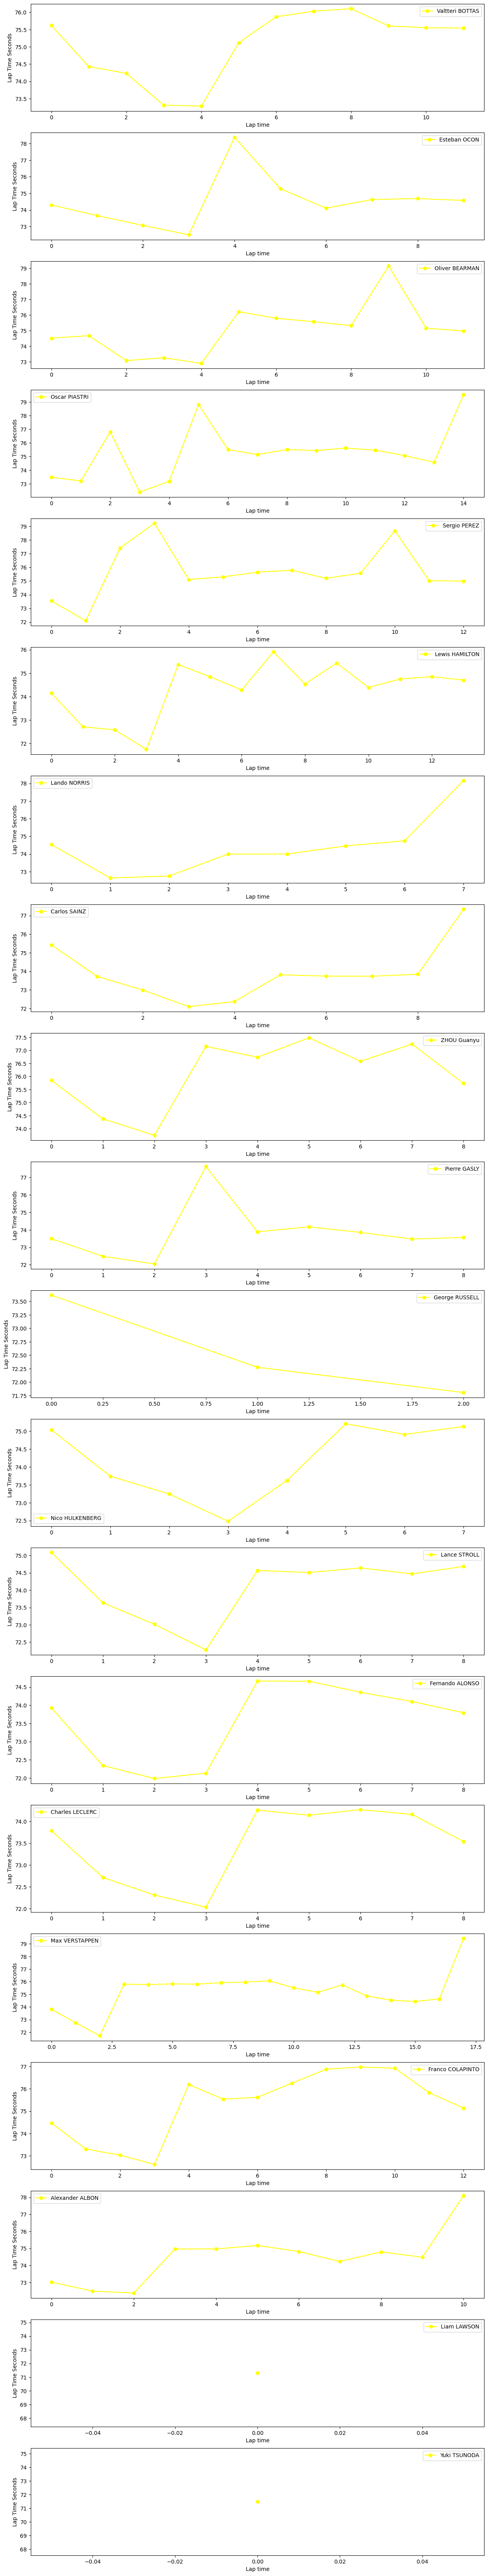

In [66]:
libraryDataF1.obtain_data_tyres(jointables2,"MEDIUM",80)

### Soft tyres

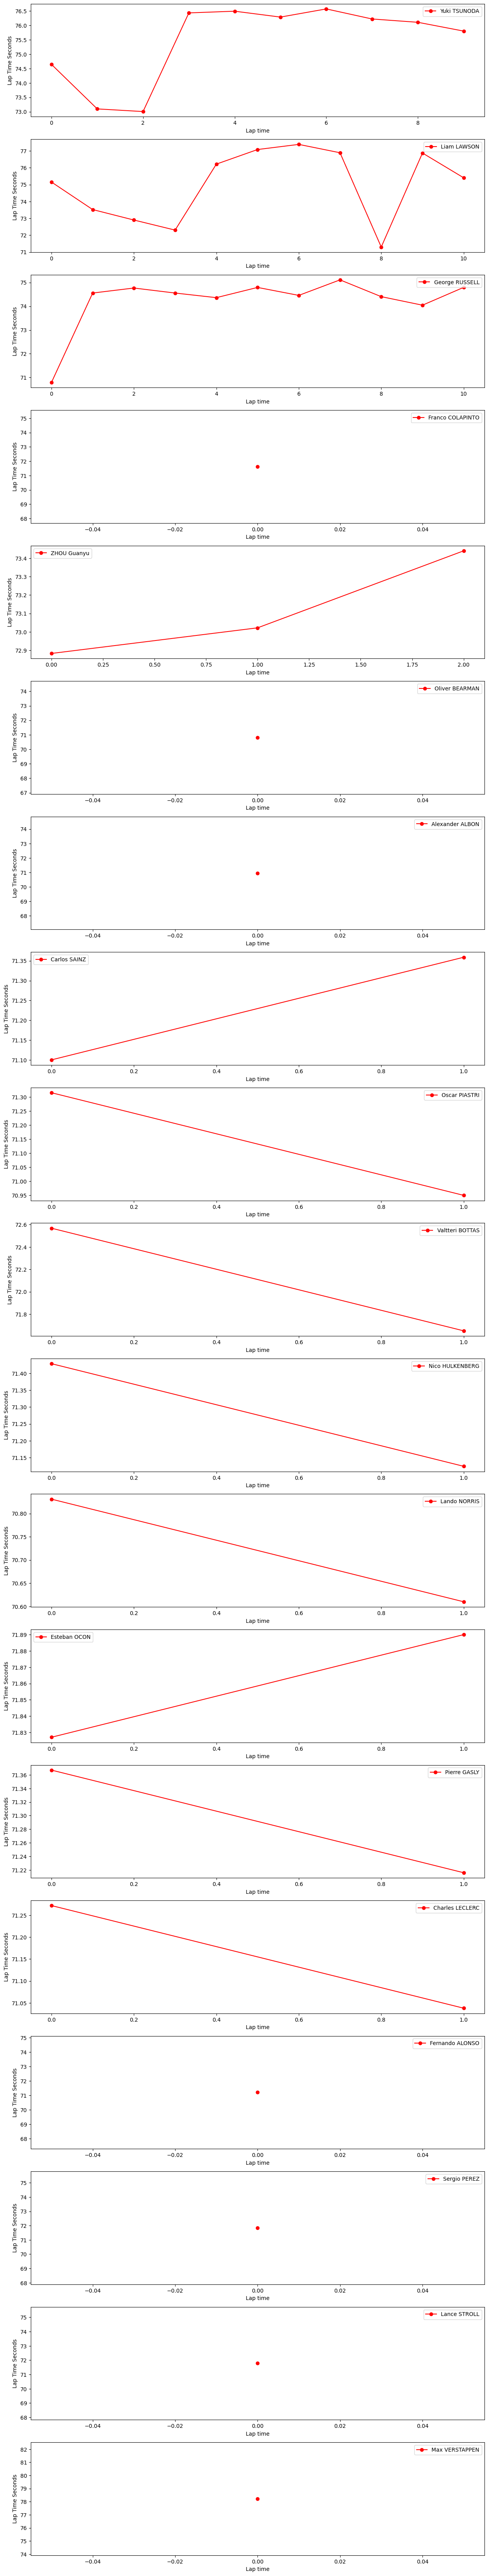

In [67]:
libraryDataF1.obtain_data_tyres(jointables2,"SOFT",80)

### Hard tyres

In [68]:
#libraryDataF1.obtain_data_tyres(jointables2,"HARD",99)

### Speed trap

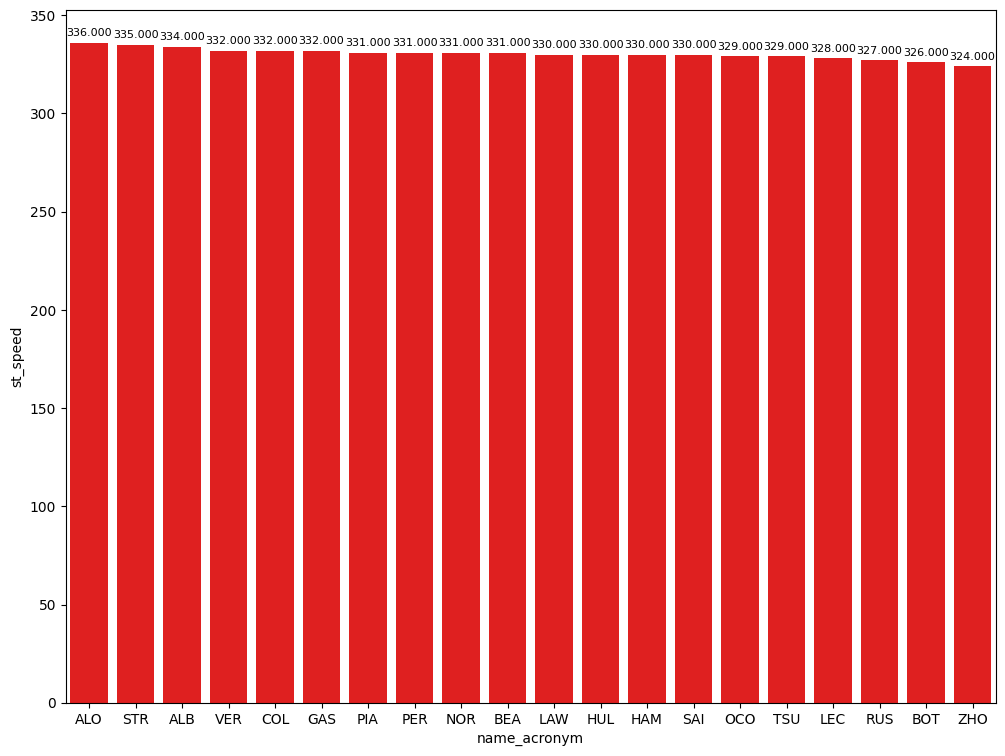

In [69]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

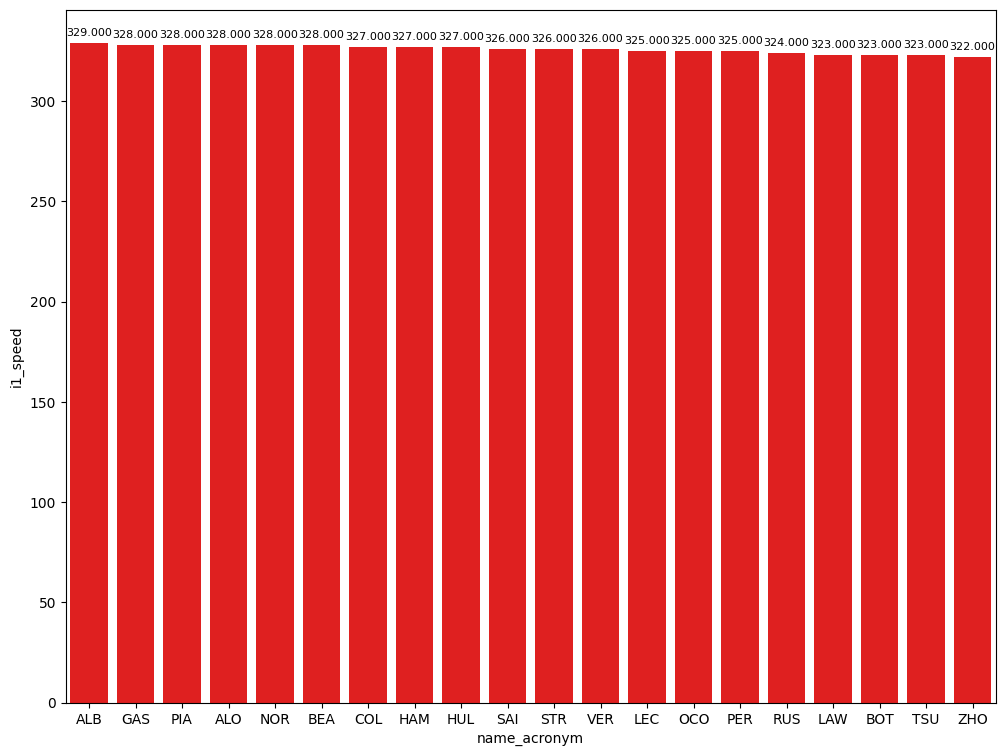

In [70]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

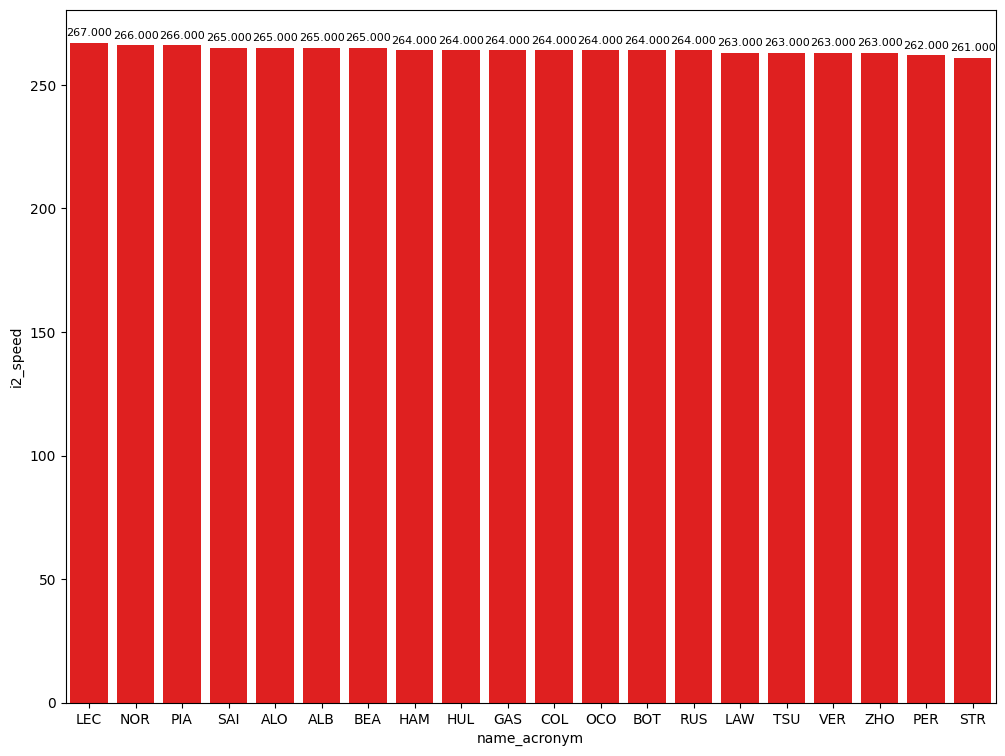

In [71]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [72]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
24   Fernando ALONSO     HARD             46.773             52.645   
434      Liam LAWSON   MEDIUM             18.412             36.493   
508     Lando NORRIS     SOFT             18.046             36.194   

     duration_sector_3  lap_duration  
24              18.372       117.790  
434             16.396        71.301  
508             16.370        70.610

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.

In [73]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


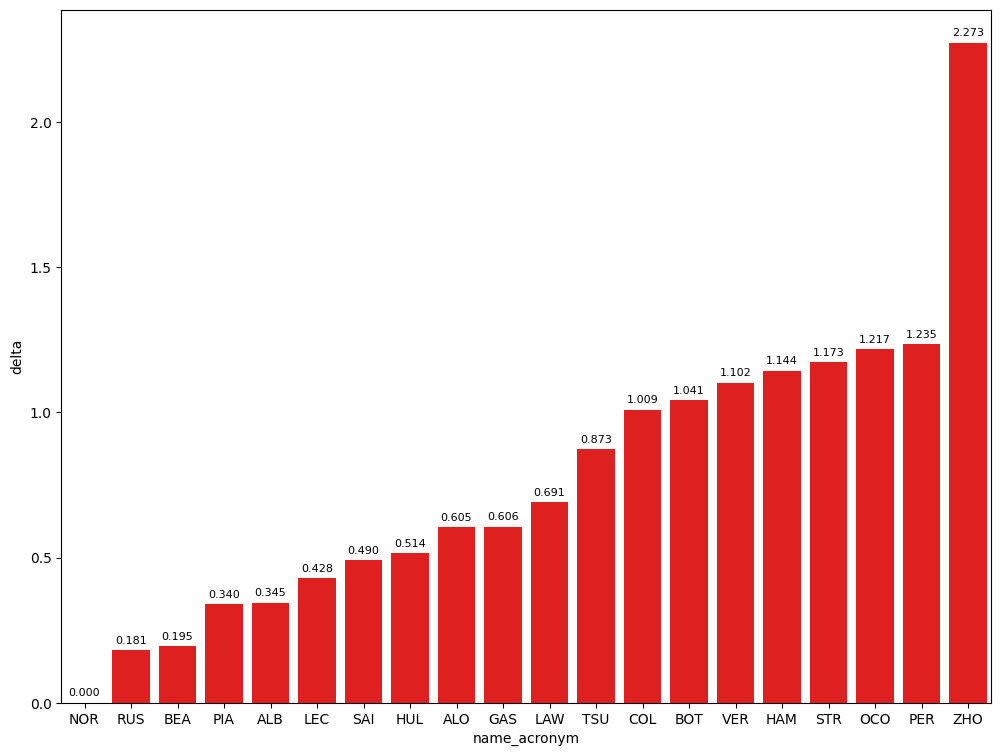

In [74]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector. Also, each sector will be commented. As we can see in the free practice, these data  are not very representative due to the changing conditions.


In [75]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
sectorPace[['duration_sector_1','full_name','compound','lap_duration','lap_number']]

duration_sector_1         full_name compound  lap_duration  lap_number
508             18.046      Lando NORRIS     SOFT        70.610          27
424             18.145   Alexander ALBON     SOFT        70.955          22
487             18.154    Max VERSTAPPEN     SOFT        78.221          27
519             18.164   Nico HULKENBERG     SOFT        71.124          24
504             18.210   Charles LECLERC     SOFT        71.038          28
453             18.255   Fernando ALONSO     SOFT        71.215          22
526             18.276      Carlos SAINZ     SOFT       112.766          29
490             18.289     Oscar PIASTRI     SOFT        70.950          27
476             18.315      Yuki TSUNODA   MEDIUM        71.483          21
484             18.321      Lance STROLL     SOFT        71.783          25
330             18.328    George RUSSELL     SOFT        70.791          10
450             18.330      Pierre GASLY     SOFT        71.367          22
206             18.356    Lewis HAMILTON   MEDIUM        71.754          11
467             18.358  Franco COLAPINTO     SOFT       104.203          27
473             18.397      Sergio PEREZ     SOFT        71.845          24
433             18.412       Liam LAWSON     SOFT        71.301          20
420             18.486    Oliver BEARMAN     SOFT        70.805          24
499             18.585   Valtteri BOTTAS     SOFT        71.651          26
449             18.648      Esteban OCON     SOFT        71.827          21
418             18.857       ZHOU Guanyu     SOFT        72.883          20

In [76]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
sectorPace[['duration_sector_2','full_name','compound','lap_duration','lap_number']]

duration_sector_2         full_name compound  lap_duration  lap_number
330             36.023    George RUSSELL     SOFT        70.791          10
420             36.143    Oliver BEARMAN     SOFT        70.805          24
508             36.194      Lando NORRIS     SOFT        70.610          27
487             36.235    Max VERSTAPPEN     SOFT        78.221          27
490             36.242     Oscar PIASTRI     SOFT        70.950          27
425             36.314      Carlos SAINZ     SOFT        71.100          24
514             36.425      Pierre GASLY     SOFT        71.216          25
519             36.447   Nico HULKENBERG     SOFT        71.124          24
452             36.459   Charles LECLERC     SOFT        71.272          25
433             36.493       Liam LAWSON     SOFT        71.301          20
424             36.572   Alexander ALBON     SOFT        70.955          22
476             36.618      Yuki TSUNODA   MEDIUM        71.483          21
411             36.621  Franco COLAPINTO     SOFT        71.619          24
449             36.622      Esteban OCON     SOFT        71.827          21
499             36.624   Valtteri BOTTAS     SOFT        71.651          26
176             36.694      Sergio PEREZ   MEDIUM        79.223          11
453             36.714   Fernando ALONSO     SOFT        71.215          22
206             36.780    Lewis HAMILTON   MEDIUM        71.754          11
484             36.883      Lance STROLL     SOFT        71.783          25
479             37.230       ZHOU Guanyu     SOFT        73.022          23

In [77]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
sectorPace[['duration_sector_3','full_name','compound','lap_duration','lap_number']]

duration_sector_3         full_name compound  lap_duration  lap_number
420             16.176    Oliver BEARMAN     SOFT        70.805          24
504             16.238   Charles LECLERC     SOFT        71.038          28
424             16.238   Alexander ALBON     SOFT        70.955          22
453             16.246   Fernando ALONSO     SOFT        71.215          22
447             16.305      Lando NORRIS     SOFT        70.831          24
437             16.339     Oscar PIASTRI     SOFT        71.315          24
514             16.367      Pierre GASLY     SOFT        71.216          25
433             16.396       Liam LAWSON     SOFT        71.301          20
425             16.402      Carlos SAINZ     SOFT        71.100          24
330             16.440    George RUSSELL     SOFT        70.791          10
499             16.442   Valtteri BOTTAS     SOFT        71.651          26
444             16.461   Nico HULKENBERG     SOFT        71.429          21
418             16.498       ZHOU Guanyu     SOFT        72.883          20
509             16.540      Esteban OCON     SOFT        71.890          24
476             16.550      Yuki TSUNODA   MEDIUM        71.483          21
473             16.559      Sergio PEREZ     SOFT        71.845          24
157             16.565    Max VERSTAPPEN   MEDIUM        71.712           8
411             16.569  Franco COLAPINTO     SOFT        71.619          24
484             16.579      Lance STROLL     SOFT        71.783          25
206             16.618    Lewis HAMILTON   MEDIUM        71.754          11

### Mean pace with the different compound used on the session

In [78]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration > 74 and lap_duration <=77.5").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
MEDIUM       75.260302
SOFT         75.574040

### Long runs

In [117]:
MINIMUN_SECONDS = 74.7
MAXIMUM_SECONDS = 77.5

#### Red Bull Racing

In [118]:
stintInformation.query('driver_number == 1 or driver_number == 11')

meeting_key  session_key  stint_number  driver_number  lap_start  \
3           1249         9626             1             11          1   
4           1249         9626             1              1          1   
23          1249         9626             2             11          5   
28          1249         9626             2              1          7   
31          1249         9626             3             11          8   
46          1249         9626             3              1         11   
54          1249         9626             4             11         13   
79          1249         9626             5             11         24   
91          1249         9626             4              1         27   
93          1249         9626             6             11         27   
100         1249         9626             5              1         29   

     lap_end compound  tyre_age_at_start  
3          4   MEDIUM                  0  
4          6   MEDIUM                  0  
23         7   MEDIUM                  3  
28        10   MEDIUM                  5  
31        12   MEDIUM                  6  
46        26   MEDIUM                  9  
54        23   MEDIUM                 11  
79        26     SOFT                  0  
91        28     SOFT                  0  
93        29   MEDIUM                 22  
100       31   MEDIUM                 25

In [119]:
libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
201  Max VERSTAPPEN   MEDIUM  2024-11-01T14:56:27.197000+00:00          11   
211  Max VERSTAPPEN   MEDIUM  2024-11-01T14:57:43.082000+00:00          12   
222  Max VERSTAPPEN   MEDIUM  2024-11-01T14:58:58.755000+00:00          13   
233  Max VERSTAPPEN   MEDIUM  2024-11-01T15:00:14.675000+00:00          14   
246  Max VERSTAPPEN   MEDIUM  2024-11-01T15:01:30.463000+00:00          15   
261  Max VERSTAPPEN   MEDIUM  2024-11-01T15:02:46.302000+00:00          16   
278  Max VERSTAPPEN   MEDIUM  2024-11-01T15:04:02.356000+00:00          17   
294  Max VERSTAPPEN   MEDIUM  2024-11-01T15:05:18.346000+00:00          18   
311  Max VERSTAPPEN   MEDIUM  2024-11-01T15:06:33.964000+00:00          19   
329  Max VERSTAPPEN   MEDIUM  2024-11-01T15:07:49.064000+00:00          20   
344  Max VERSTAPPEN   MEDIUM  2024-11-01T15:09:04.770000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
201             19.395             39.158             17.253        75.806  
211             19.333             39.033             17.408        75.774  
222             19.332             39.244             17.249        75.825  
233             19.433             39.085             17.285        75.803  
246             19.388             39.168             17.368        75.924  
261             19.299             39.284             17.382        75.965  
278             19.344             39.304             17.424        76.072  
294             19.364             38.923             17.222        75.509  
311             19.279             38.807             17.072        75.158  
329             19.053             39.246             17.450        75.749  
344             19.382             38.404             17.091        74.877

In [120]:
libraryDataF1.getinfolongruns(jointables2,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
139  Sergio PEREZ   MEDIUM  2024-11-01T14:43:02.392000+00:00           8   
249  Sergio PEREZ   MEDIUM  2024-11-01T15:01:52.156000+00:00          13   
264  Sergio PEREZ   MEDIUM  2024-11-01T15:03:07.285000+00:00          14   
282  Sergio PEREZ   MEDIUM  2024-11-01T15:04:22.557000+00:00          15   
299  Sergio PEREZ   MEDIUM  2024-11-01T15:05:38.252000+00:00          16   
315  Sergio PEREZ   MEDIUM  2024-11-01T15:06:54.028000+00:00          17   
333  Sergio PEREZ   MEDIUM  2024-11-01T15:08:09.135000+00:00          18   
362  Sergio PEREZ   MEDIUM  2024-11-01T15:10:43.470000+00:00          20   
374  Sergio PEREZ   MEDIUM  2024-11-01T15:11:58.470000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
139             18.465             36.923             22.025        77.413  
249             19.348             38.340             17.422        75.110  
264             19.258             38.519             17.523        75.300  
282             19.346             38.807             17.493        75.646  
299             19.270             39.143             17.376        75.789  
315             19.340             38.660             17.198        75.198  
333             19.226             38.995             17.347        75.568  
362             19.460             38.457             17.099        75.016  
374             19.119             38.576             17.299        74.994

#### Ferrari

In [121]:
stintInformation.query('driver_number == 16 or driver_number == 55')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
10         1249         9626             1             16          1        8   
15         1249         9626             1             55          1        9   
34         1249         9626             2             16          9       13   
41         1249         9626             2             55         10       13   
58         1249         9626             3             16         14       22   
60         1249         9626             3             55         14       23   
77         1249         9626             4             16         23       32   
83         1249         9626             4             55         24       26   
97         1249         9626             5             55         27       31   

   compound  tyre_age_at_start  
10   MEDIUM                  0  
15   MEDIUM                  0  
34   MEDIUM                  7  
41   MEDIUM                  8  
58   MEDIUM                 12  
60   MEDIUM                 12  
77     SOFT                  0  
83     SOFT                  0  
97     SOFT                  3

In [122]:
libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [123]:
libraryDataF1.getinfolongruns(jointables2,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
29   Carlos SAINZ   MEDIUM  2024-11-01T14:33:12.263000+00:00           2   
400  Carlos SAINZ   MEDIUM  2024-11-01T15:16:20.987000+00:00          22   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
29              19.400             38.870             17.156        75.426  
400             19.019             37.492             20.833        77.344

#### Mercedes

In [124]:
stintInformation.query('driver_number == 44 or driver_number == 63')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
16         1249         9626             1             63          1        9   
17         1249         9626             1             44          1       10   
40         1249         9626             2             63         10       12   
44         1249         9626             2             44         11       16   
57         1249         9626             3             63         13       25   
61         1249         9626             3             44         17       31   

   compound  tyre_age_at_start  
16   MEDIUM                  0  
17   MEDIUM                  0  
40     SOFT                  0  
44   MEDIUM                  9  
57     SOFT                  3  
61   MEDIUM                  0

In [125]:
libraryDataF1.getinfolongruns(jointables2,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
398  Lewis HAMILTON   MEDIUM  2024-11-01T15:15:24.753000+00:00          17   
401  Lewis HAMILTON   MEDIUM  2024-11-01T15:16:40.065000+00:00          18   
407  Lewis HAMILTON   MEDIUM  2024-11-01T15:19:09.272000+00:00          20   
427  Lewis HAMILTON   MEDIUM  2024-11-01T15:21:39.649000+00:00          22   
454  Lewis HAMILTON   MEDIUM  2024-11-01T15:24:09.513000+00:00          24   
470  Lewis HAMILTON   MEDIUM  2024-11-01T15:25:24.293000+00:00          25   
480  Lewis HAMILTON   MEDIUM  2024-11-01T15:26:39.042000+00:00          26   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
398             19.499             38.802             17.061        75.362  
401             19.433             38.344             17.074        74.851  
407             19.159             39.518             17.230        75.907  
427             19.144             38.630             17.659        75.433  
454             19.169             38.455             17.128        74.752  
470             19.095             38.626             17.132        74.853  
480             19.223             38.359             17.121        74.703

In [126]:
libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
413  George RUSSELL     SOFT  2024-11-01T15:19:55.418000+00:00          14   
451  George RUSSELL     SOFT  2024-11-01T15:23:39.094000+00:00          17   
477  George RUSSELL     SOFT  2024-11-01T15:26:08.369000+00:00          19   
520  George RUSSELL     SOFT  2024-11-01T15:29:51.996000+00:00          22   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
413             19.362             38.469             16.935        74.766  
451             19.275             38.628             16.888        74.791  
477             19.186             38.683             17.240        75.109  
520             19.093             38.593             17.108        74.794

#### McLaren

In [127]:
stintInformation.query('driver_number == 81 or driver_number == 4')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
11         1249         9626             1             81          1        8   
12         1249         9626             1              4          1        9   
33         1249         9626             2             81          9       11   
42         1249         9626             2              4         10       19   
51         1249         9626             3             81         12       23   
65         1249         9626             3              4         20       23   
78         1249         9626             4              4         24       26   
84         1249         9626             4             81         24       26   
95         1249         9626             5              4         27       30   
98         1249         9626             5             81         27       31   

   compound  tyre_age_at_start  
11   MEDIUM                  0  
12   MEDIUM                  0  
33   MEDIUM                  7  
42   MEDIUM                  8  
51   MEDIUM                 10  
65   MEDIUM                 18  
78     SOFT                  0  
84     SOFT                  0  
95     SOFT                  3  
98     SOFT                  0

In [128]:
libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
363  Lando NORRIS   MEDIUM  2024-11-01T15:10:44.109000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
363             19.469             38.451             16.829        74.749

In [129]:
libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
114  Oscar PIASTRI   MEDIUM  2024-11-01T14:40:26.185000+00:00           7   
266  Oscar PIASTRI   MEDIUM  2024-11-01T15:03:17.787000+00:00          14   
285  Oscar PIASTRI   MEDIUM  2024-11-01T15:04:33.182000+00:00          15   
301  Oscar PIASTRI   MEDIUM  2024-11-01T15:05:48.409000+00:00          16   
317  Oscar PIASTRI   MEDIUM  2024-11-01T15:07:03.929000+00:00          17   
335  Oscar PIASTRI   MEDIUM  2024-11-01T15:08:19.393000+00:00          18   
351  Oscar PIASTRI   MEDIUM  2024-11-01T15:09:34.871000+00:00          19   
365  Oscar PIASTRI   MEDIUM  2024-11-01T15:10:50.462000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
114             18.713             37.467             20.626        76.806  
266             19.815             38.668             17.017        75.500  
285             19.309             38.801             17.033        75.143  
301             19.393             39.035             17.080        75.508  
317             19.375             38.992             17.066        75.433  
335             19.491             39.036             17.089        75.616  
351             19.449             38.893             17.119        75.461  
365             19.124             39.052             16.888        75.064

#### Aston Martin

In [130]:
stintInformation.query('driver_number == 18 or driver_number == 14')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1249         9626             1             14          1        2   
1          1249         9626             1             18          1        2   
20         1249         9626             2             14          3        5   
21         1249         9626             2             18          3        5   
24         1249         9626             3             14          6        9   
25         1249         9626             3             18          6       10   
43         1249         9626             4             14         10       21   
45         1249         9626             4             18         11       22   
71         1249         9626             5             14         22       23   
74         1249         9626             5             18         23       27   
85         1249         9626             6             14         24       27   

   compound  tyre_age_at_start  
0      HARD                  0  
1      HARD                  0  
20   MEDIUM                  0  
21   MEDIUM                  0  
24   MEDIUM                  3  
25   MEDIUM                  3  
43   MEDIUM                  7  
45   MEDIUM                  8  
71     SOFT                  0  
74     SOFT                  0  
85   MEDIUM                  0

In [131]:
libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [132]:
libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
43  Lance STROLL   MEDIUM  2024-11-01T14:34:14.982000+00:00           3   

    duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
43             19.345             37.978             17.766        75.089

#### RB

In [133]:
stintInformation.query('driver_number == 30 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
13         1249         9626             1             22          1        9   
14         1249         9626             1             30          1        9   
36         1249         9626             2             22         10       11   
37         1249         9626             2             30         10       12   
48         1249         9626             3             22         12       20   
52         1249         9626             3             30         13       18   
62         1249         9626             4             30         19       20   
64         1249         9626             5             30         20       22   
67         1249         9626             4             22         21       23   
75         1249         9626             6             30         23       27   
80         1249         9626             5             22         24       26   

   compound  tyre_age_at_start  
13     SOFT                  0  
14     SOFT                  0  
36     SOFT                  8  
37     SOFT                  8  
48     SOFT                 10  
52     SOFT                  0  
62     SOFT                 17  
64   MEDIUM                  0  
67   MEDIUM                  0  
75     SOFT                 18  
80     SOFT                 19

In [134]:
libraryDataF1.getinfolongruns(jointables2,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
54   Liam LAWSON     SOFT  2024-11-01T14:34:59.408000+00:00           2   
218  Liam LAWSON     SOFT  2024-11-01T14:58:29.287000+00:00          13   
228  Liam LAWSON     SOFT  2024-11-01T14:59:45.493000+00:00          14   
241  Liam LAWSON     SOFT  2024-11-01T15:01:02.607000+00:00          15   
253  Liam LAWSON     SOFT  2024-11-01T15:02:19.914000+00:00          16   
494  Liam LAWSON     SOFT  2024-11-01T15:27:35.668000+00:00          23   
505  Liam LAWSON     SOFT  2024-11-01T15:28:52.616000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
54              19.309             38.726             17.117        75.152  
218             19.721             39.181             17.311        76.213  
228             19.693             39.911             17.474        77.078  
241             19.917             39.895             17.570        77.382  
253             19.775             39.812             17.300        76.887  
494             20.263             39.306             17.302        76.871  
505             19.471             38.933             16.999        75.403

In [135]:
libraryDataF1.getinfolongruns(jointables2,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
220  Yuki TSUNODA     SOFT  2024-11-01T14:58:54.374000+00:00          12   
231  Yuki TSUNODA     SOFT  2024-11-01T15:00:10.816000+00:00          13   
245  Yuki TSUNODA     SOFT  2024-11-01T15:01:27.266000+00:00          14   
260  Yuki TSUNODA     SOFT  2024-11-01T15:02:43.629000+00:00          15   
277  Yuki TSUNODA     SOFT  2024-11-01T15:04:00.062000+00:00          16   
293  Yuki TSUNODA     SOFT  2024-11-01T15:05:16.251000+00:00          17   
310  Yuki TSUNODA     SOFT  2024-11-01T15:06:32.387000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
220             19.618             39.524             17.287        76.429  
231             19.488             39.706             17.294        76.488  
245             19.549             39.400             17.335        76.284  
260             19.508             39.716             17.343        76.567  
277             19.475             39.498             17.245        76.218  
293             19.531             39.334             17.238        76.103  
310             19.332             39.251             17.215        75.798

#### Haas

In [136]:
stintInformation.query('driver_number == 50 or driver_number == 27')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
5          1249         9626             1             27          1        6   
7          1249         9626             1             50          1        6   
27         1249         9626             2             50          7        9   
29         1249         9626             2             27          7       12   
39         1249         9626             3             50         10       12   
53         1249         9626             3             27         13       20   
56         1249         9626             4             50         13       23   
68         1249         9626             4             27         21       23   
82         1249         9626             5             50         24       26   
86         1249         9626             5             27         24       27   
96         1249         9626             6             50         27       31   

   compound  tyre_age_at_start  
5    MEDIUM                  0  
7    MEDIUM                  0  
27   MEDIUM                  5  
29   MEDIUM                  5  
39   MEDIUM                  8  
53   MEDIUM                  0  
56   MEDIUM                 11  
68     SOFT                  0  
82     SOFT                  0  
86     SOFT                  3  
96     SOFT                  0

In [137]:
libraryDataF1.getinfolongruns(jointables2,50,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [138]:
libraryDataF1.getinfolongruns(jointables2,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
42   Nico HULKENBERG   MEDIUM  2024-11-01T14:34:09.331000+00:00           2   
273  Nico HULKENBERG   MEDIUM  2024-11-01T15:03:52.927000+00:00          16   
290  Nico HULKENBERG   MEDIUM  2024-11-01T15:05:08.188000+00:00          17   
308  Nico HULKENBERG   MEDIUM  2024-11-01T15:06:23.062000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
42              19.271             38.660             17.108        75.039  
273             19.457             38.637             17.114        75.208  
290             19.198             38.492             17.220        74.910  
308             19.270             38.726             17.135        75.131

#### Alpine

In [139]:
stintInformation.query('driver_number == 31 or driver_number == 10')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
9          1249         9626             1             10          1        8   
19         1249         9626             1             31          1       11   
35         1249         9626             2             10          9       21   
50         1249         9626             2             31         12       20   
69         1249         9626             3             31         21       23   
72         1249         9626             3             10         22       24   
87         1249         9626             4             31         24       27   
89         1249         9626             4             10         25       28   

   compound  tyre_age_at_start  
9    MEDIUM                  0  
19   MEDIUM                  0  
35   MEDIUM                  0  
50   MEDIUM                  0  
69     SOFT                  0  
72     SOFT                  0  
87     SOFT                  3  
89     SOFT                  3

In [140]:
libraryDataF1.getinfolongruns(jointables2,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
307  Esteban OCON   MEDIUM  2024-11-01T15:06:21.528000+00:00          14   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
307             19.127             39.173             16.983        75.283

In [141]:
libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

#### Williams

In [142]:
stintInformation.query('driver_number == 43 or driver_number == 23')

meeting_key  session_key  stint_number  driver_number  lap_start  \
2           1249         9626             1             23          1   
6           1249         9626             1             43          1   
22          1249         9626             2             23          3   
26          1249         9626             2             43          7   
32          1249         9626             3             23          9   
38          1249         9626             3             43         10   
49          1249         9626             4             23         12   
55          1249         9626             4             43         13   
66          1249         9626             5             23         21   
70          1249         9626             6             23         21   
81          1249         9626             5             43         24   
88          1249         9626             7             23         25   
92          1249         9626             6             43         27   
94          1249         9626             8             23         27   
99          1249         9626             7             43         29   
101         1249         9626             8             43         30   

     lap_end compound  tyre_age_at_start  
2          2   MEDIUM                  0  
6          6   MEDIUM                  0  
22         8   MEDIUM                  0  
26         9   MEDIUM                  5  
32        11   MEDIUM                  7  
38        12   MEDIUM                  8  
49        20   MEDIUM                 10  
55        23   MEDIUM                 11  
66        20   MEDIUM                  0  
70        24     SOFT                  0  
81        26     SOFT                  0  
88        26     SOFT                  0  
92        28     SOFT                  0  
94        29   MEDIUM                  0  
99        29   MEDIUM                 22  
101       32   MEDIUM                 23

In [143]:
libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
229  Alexander ALBON   MEDIUM  2024-11-01T14:59:51.907000+00:00          12   
242  Alexander ALBON   MEDIUM  2024-11-01T15:01:06.766000+00:00          13   
254  Alexander ALBON   MEDIUM  2024-11-01T15:02:21.769000+00:00          14   
269  Alexander ALBON   MEDIUM  2024-11-01T15:03:36.909000+00:00          15   
304  Alexander ALBON   MEDIUM  2024-11-01T15:06:06.020000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
229             19.430             38.417             17.119        74.966  
242             19.401             38.582             16.984        74.967  
254             19.386             38.875             16.911        75.172  
269             19.324             38.499             16.993        74.816  
304             19.199             38.534             17.062        74.795

In [144]:
libraryDataF1.getinfolongruns(jointables2,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
213  Franco COLAPINTO   MEDIUM  2024-11-01T14:57:58.105000+00:00          13   
223  Franco COLAPINTO   MEDIUM  2024-11-01T14:59:14.251000+00:00          14   
234  Franco COLAPINTO   MEDIUM  2024-11-01T15:00:29.850000+00:00          15   
247  Franco COLAPINTO   MEDIUM  2024-11-01T15:01:45.440000+00:00          16   
263  Franco COLAPINTO   MEDIUM  2024-11-01T15:03:01.708000+00:00          17   
281  Franco COLAPINTO   MEDIUM  2024-11-01T15:04:18.489000+00:00          18   
298  Franco COLAPINTO   MEDIUM  2024-11-01T15:05:35.615000+00:00          19   
314  Franco COLAPINTO   MEDIUM  2024-11-01T15:06:52.469000+00:00          20   
332  Franco COLAPINTO   MEDIUM  2024-11-01T15:08:08.308000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
213             19.552             39.330             17.309        76.191  
223             19.345             39.064             17.130        75.539  
234             19.287             39.163             17.168        75.618  
247             19.429             39.436             17.387        76.252  
263             19.389             40.074             17.412        76.875  
281             19.730             39.936             17.311        76.977  
298             19.513             40.012             17.396        76.921  
314             19.304             39.477             17.041        75.822  
332             19.121             38.863             17.155        75.139

#### Kick Sauber

In [145]:
stintInformation.query('driver_number == 24 or driver_number == 77')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
8          1249         9626             1             77          1        6   
18         1249         9626             1             24          1       11   
30         1249         9626             2             77          7       13   
47         1249         9626             2             24         12       19   
59         1249         9626             3             77         14       22   
63         1249         9626             3             24         20       22   
73         1249         9626             4             77         23       25   
76         1249         9626             4             24         23       28   
90         1249         9626             5             77         26       30   

   compound  tyre_age_at_start  
8    MEDIUM                  0  
18   MEDIUM                  0  
30   MEDIUM                  5  
47   MEDIUM                 10  
59   MEDIUM                 12  
63     SOFT                  0  
73     SOFT                  0  
76     SOFT                  0  
90     SOFT                  3

In [146]:
libraryDataF1.getinfolongruns(jointables2,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
32   ZHOU Guanyu   MEDIUM  2024-11-01T14:33:18.851000+00:00           3   
288  ZHOU Guanyu   MEDIUM  2024-11-01T15:05:03.003000+00:00          12   
306  ZHOU Guanyu   MEDIUM  2024-11-01T15:06:20.146000+00:00          13   
325  ZHOU Guanyu   MEDIUM  2024-11-01T15:07:36.862000+00:00          14   
343  ZHOU Guanyu   MEDIUM  2024-11-01T15:08:54.406000+00:00          15   
358  ZHOU Guanyu   MEDIUM  2024-11-01T15:10:10.956000+00:00          16   
371  ZHOU Guanyu   MEDIUM  2024-11-01T15:11:28.149000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
32              19.371             39.471             17.009        75.851  
288             20.414             39.489             17.250        77.153  
306             19.606             39.620             17.509        76.735  
325             20.134             39.952             17.392        77.478  
343             19.781             39.465             17.336        76.582  
358             19.743             40.164             17.331        77.238  
371             19.544             39.072             17.116        75.732

In [147]:
libraryDataF1.getinfolongruns(jointables2,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
13   Valtteri BOTTAS   MEDIUM  2024-11-01T14:31:32.664000+00:00           2   
243  Valtteri BOTTAS   MEDIUM  2024-11-01T15:01:11.627000+00:00          14   
255  Valtteri BOTTAS   MEDIUM  2024-11-01T15:02:26.774000+00:00          15   
270  Valtteri BOTTAS   MEDIUM  2024-11-01T15:03:42.600000+00:00          16   
287  Valtteri BOTTAS   MEDIUM  2024-11-01T15:04:58.563000+00:00          17   
305  Valtteri BOTTAS   MEDIUM  2024-11-01T15:06:14.802000+00:00          18   
323  Valtteri BOTTAS   MEDIUM  2024-11-01T15:07:30.370000+00:00          19   
341  Valtteri BOTTAS   MEDIUM  2024-11-01T15:08:45.870000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
13              19.658             38.914             17.045        75.617  
243             19.388             38.462             17.267        75.117  
255             19.420             39.045             17.406        75.871  
270             19.600             39.039             17.391        76.030  
287             19.725             39.001             17.378        76.104  
305             19.410             38.857             17.339        75.606  
323             19.463             38.817             17.271        75.551  
341             19.413             38.889             17.241        75.543

#### Long runs mean for each driver

In [148]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration

In [149]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='lap_duration',ascending=True)

driver compound  lap_duration    sector1    sector2    sector3
1       Lando NORRIS   MEDIUM     74.749000  19.469000  38.451000  16.829000
14    George RUSSELL     SOFT     74.865000  19.229000  38.593250  17.042750
5    Alexander ALBON   MEDIUM     74.943200  19.348000  38.581400  17.013800
7    Nico HULKENBERG   MEDIUM     75.072000  19.299000  38.628750  17.144250
3       Lance STROLL   MEDIUM     75.089000  19.345000  37.978000  17.766000
11    Lewis HAMILTON   MEDIUM     75.123000  19.246000  38.676286  17.200714
9       Esteban OCON   MEDIUM     75.283000  19.127000  39.173000  16.983000
12    Oliver BEARMAN   MEDIUM     75.499500  19.485833  38.819833  17.193833
2       Sergio PEREZ   MEDIUM     75.559333  19.203556  38.491111  17.864667
16     Oscar PIASTRI   MEDIUM     75.566375  19.333625  38.743000  17.489750
0     Max VERSTAPPEN   MEDIUM     75.678364  19.327455  39.059636  17.291273
15   Valtteri BOTTAS   MEDIUM     75.679875  19.509625  38.878000  17.292250
10  Franco COLAPINTO   MEDIUM     76.148222  19.407778  39.483889  17.256556
4       Yuki TSUNODA     SOFT     76.269571  19.500143  39.489857  17.279571
13      Carlos SAINZ   MEDIUM     76.385000  19.209500  38.181000  18.994500
8        Liam LAWSON     SOFT     76.426571  19.735571  39.394857  17.296143
6        ZHOU Guanyu   MEDIUM     76.681286  19.799000  39.604714  17.277571

##### Sorted by sector 1


In [150]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector1',ascending=True)

driver compound  lap_duration    sector1    sector2    sector3
9       Esteban OCON   MEDIUM     75.283000  19.127000  39.173000  16.983000
2       Sergio PEREZ   MEDIUM     75.559333  19.203556  38.491111  17.864667
13      Carlos SAINZ   MEDIUM     76.385000  19.209500  38.181000  18.994500
14    George RUSSELL     SOFT     74.865000  19.229000  38.593250  17.042750
11    Lewis HAMILTON   MEDIUM     75.123000  19.246000  38.676286  17.200714
7    Nico HULKENBERG   MEDIUM     75.072000  19.299000  38.628750  17.144250
0     Max VERSTAPPEN   MEDIUM     75.678364  19.327455  39.059636  17.291273
16     Oscar PIASTRI   MEDIUM     75.566375  19.333625  38.743000  17.489750
3       Lance STROLL   MEDIUM     75.089000  19.345000  37.978000  17.766000
5    Alexander ALBON   MEDIUM     74.943200  19.348000  38.581400  17.013800
10  Franco COLAPINTO   MEDIUM     76.148222  19.407778  39.483889  17.256556
1       Lando NORRIS   MEDIUM     74.749000  19.469000  38.451000  16.829000
12    Oliver BEARMAN   MEDIUM     75.499500  19.485833  38.819833  17.193833
4       Yuki TSUNODA     SOFT     76.269571  19.500143  39.489857  17.279571
15   Valtteri BOTTAS   MEDIUM     75.679875  19.509625  38.878000  17.292250
8        Liam LAWSON     SOFT     76.426571  19.735571  39.394857  17.296143
6        ZHOU Guanyu   MEDIUM     76.681286  19.799000  39.604714  17.277571

##### Sorted by sector 2


In [151]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector2',ascending=True)

driver compound  lap_duration    sector1    sector2    sector3
3       Lance STROLL   MEDIUM     75.089000  19.345000  37.978000  17.766000
13      Carlos SAINZ   MEDIUM     76.385000  19.209500  38.181000  18.994500
1       Lando NORRIS   MEDIUM     74.749000  19.469000  38.451000  16.829000
2       Sergio PEREZ   MEDIUM     75.559333  19.203556  38.491111  17.864667
5    Alexander ALBON   MEDIUM     74.943200  19.348000  38.581400  17.013800
14    George RUSSELL     SOFT     74.865000  19.229000  38.593250  17.042750
7    Nico HULKENBERG   MEDIUM     75.072000  19.299000  38.628750  17.144250
11    Lewis HAMILTON   MEDIUM     75.123000  19.246000  38.676286  17.200714
16     Oscar PIASTRI   MEDIUM     75.566375  19.333625  38.743000  17.489750
12    Oliver BEARMAN   MEDIUM     75.499500  19.485833  38.819833  17.193833
15   Valtteri BOTTAS   MEDIUM     75.679875  19.509625  38.878000  17.292250
0     Max VERSTAPPEN   MEDIUM     75.678364  19.327455  39.059636  17.291273
9       Esteban OCON   MEDIUM     75.283000  19.127000  39.173000  16.983000
8        Liam LAWSON     SOFT     76.426571  19.735571  39.394857  17.296143
10  Franco COLAPINTO   MEDIUM     76.148222  19.407778  39.483889  17.256556
4       Yuki TSUNODA     SOFT     76.269571  19.500143  39.489857  17.279571
6        ZHOU Guanyu   MEDIUM     76.681286  19.799000  39.604714  17.277571

##### Sorted by sector 3

In [152]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector3',ascending=True)

driver compound  lap_duration    sector1    sector2    sector3
1       Lando NORRIS   MEDIUM     74.749000  19.469000  38.451000  16.829000
9       Esteban OCON   MEDIUM     75.283000  19.127000  39.173000  16.983000
5    Alexander ALBON   MEDIUM     74.943200  19.348000  38.581400  17.013800
14    George RUSSELL     SOFT     74.865000  19.229000  38.593250  17.042750
7    Nico HULKENBERG   MEDIUM     75.072000  19.299000  38.628750  17.144250
12    Oliver BEARMAN   MEDIUM     75.499500  19.485833  38.819833  17.193833
11    Lewis HAMILTON   MEDIUM     75.123000  19.246000  38.676286  17.200714
10  Franco COLAPINTO   MEDIUM     76.148222  19.407778  39.483889  17.256556
6        ZHOU Guanyu   MEDIUM     76.681286  19.799000  39.604714  17.277571
4       Yuki TSUNODA     SOFT     76.269571  19.500143  39.489857  17.279571
0     Max VERSTAPPEN   MEDIUM     75.678364  19.327455  39.059636  17.291273
15   Valtteri BOTTAS   MEDIUM     75.679875  19.509625  38.878000  17.292250
8        Liam LAWSON     SOFT     76.426571  19.735571  39.394857  17.296143
16     Oscar PIASTRI   MEDIUM     75.566375  19.333625  38.743000  17.489750
3       Lance STROLL   MEDIUM     75.089000  19.345000  37.978000  17.766000
2       Sergio PEREZ   MEDIUM     75.559333  19.203556  38.491111  17.864667
13      Carlos SAINZ   MEDIUM     76.385000  19.209500  38.181000  18.994500

## Sprint Qualyfing
### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session as well.

In [164]:
libraryDataF1.obtain_information('race_control',session_key=9631)

session_key  meeting_key                       date category       flag  \
0          9631         1249  2024-11-01T18:15:32+00:00    Other       None   
1          9631         1249  2024-11-01T18:15:49+00:00    Other       None   
2          9631         1249  2024-11-01T18:30:00+00:00     Flag      GREEN   
3          9631         1249  2024-11-01T18:36:18+00:00    Other       None   
4          9631         1249  2024-11-01T18:42:00+00:00     Flag  CHEQUERED   
5          9631         1249  2024-11-01T18:42:08+00:00    Other       None   
6          9631         1249  2024-11-01T18:45:28+00:00    Other       None   
7          9631         1249  2024-11-01T18:45:42+00:00    Other       None   
8          9631         1249  2024-11-01T18:49:00+00:00     Flag      GREEN   
9          9631         1249  2024-11-01T18:59:00+00:00     Flag  CHEQUERED   
10         9631         1249  2024-11-01T18:59:05+00:00    Other       None   
11         9631         1249  2024-11-01T19:06:00+00:00     Flag      GREEN   
12         9631         1249  2024-11-01T19:12:45+00:00    Other       None   
13         9631         1249  2024-11-01T19:14:00+00:00     Flag  CHEQUERED   
14         9631         1249  2024-11-01T19:14:26+00:00    Other       None   
15         9631         1249  2024-11-01T19:16:15+00:00    Other       None   
16         9631         1249  2024-11-01T19:16:46+00:00    Other       None   

   lap_number                                            message  \
0        None       RISK OF RAIN FOR F1 SPRINT QUALIFYING IS 20%   
1        None            PINK HEAD PADDING MATERIAL MUST BE USED   
2        None                        GREEN LIGHT - PIT EXIT OPEN   
3        None  CAR 43 (COL) TIME 1:14.226 DELETED - TRACK LIM...   
4        None                                     CHEQUERED FLAG   
5        None          FIRST CAR TO TAKE THE FLAG - CAR 14 (ALO)   
6        None  FIA STEWARDS: SQ1 INCIDENT INVOLVING CARS 18 (...   
7        None  FIA STEWARDS: SQ1 INCIDENT INVOLVING CARS 18 (...   
8        None                        GREEN LIGHT - PIT EXIT OPEN   
9        None                                     CHEQUERED FLAG   
10       None          FIRST CAR TO TAKE THE FLAG - CAR 30 (LAW)   
11       None                        GREEN LIGHT - PIT EXIT OPEN   
12       None  CAR 50 (BEA) TIME 1:09.879 DELETED - TRACK LIM...   
13       None                                     CHEQUERED FLAG   
14       None           FIRST CAR TO TAKE THE FLAG - CAR 1 (VER)   
15       None  FIA STEWARDS: SQ3 INCIDENT INVOLVING CARS 30 (...   
16       None  FIA STEWARDS: SQ3 INCIDENT INVOLVING CARS 30 (...   

   driver_number  scope sector  
0           None   None   None  
1           None   None   None  
2           None  Track   None  
3           None   None   None  
4           None  Track   None  
5           None   None   None  
6           None   None   None  
7           None   None   None  
8           None  Track   None  
9           None  Track   None  
10          None   None   None  
11          None  Track   None  
12          None   None   None  
13          None  Track   None  
14          None   None   None  
15          None   None   None  
16          None   None   None

### Obtain setup

In [165]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9631)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9631)
drivers = libraryDataF1.obtain_information('drivers',session_key=9631)

In race control dataset, I can see a lot of laptimes deleted, principally for track limits. Those laps deleted ,within the 107%, were deleted from dataset in order to obtain only the valid laps for the analysis.

In [166]:
laptimes_deleted = [74.226,69.879]
driver_number_lap_deleted = [43,50]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [167]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
209         1249         9631             81       327       267     323.0   

                           date_start  lap_duration  is_pit_out_lap  \
209  2024-11-01T19:12:25.014000+00:00        68.899           False   

     duration_sector_1  duration_sector_2  duration_sector_3  \
209             17.825             34.909             16.165   

                              segments_sector_1  \
209  [2048, 2049, 2051, 2049, 2051, 2051, 2048]   

                                    segments_sector_2  \
209  [2048, 2048, 2049, 2048, 2049, 2049, 2049, 2048]   

                  segments_sector_3  lap_number  
209  [2048, 2048, 2048, 2064, 2064]          15

The fastest lap is 68.899 seconds (1.08.899= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (73.72 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [168]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 73.72")
competitiveLaps

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
13          1249         9631             16       323       265     322.0   
15          1249         9631             55       324       264     324.0   
17          1249         9631             18       325       265     327.0   
20          1249         9631             24       322       261     319.0   
21          1249         9631             77       324       258     325.0   
..           ...          ...            ...       ...       ...       ...   
207         1249         9631             55       326       267     322.0   
208         1249         9631             16       325       269     323.0   
209         1249         9631             81       327       267     323.0   
215         1249         9631              1       328       265     325.0   
217         1249         9631             63       327       269     325.0   

                           date_start  lap_duration  is_pit_out_lap  \
13   2024-11-01T18:31:28.428000+00:00        71.654           False   
15   2024-11-01T18:31:35.002000+00:00        72.257           False   
17   2024-11-01T18:31:45.228000+00:00        72.163           False   
20   2024-11-01T18:31:52.210000+00:00        72.978           False   
21   2024-11-01T18:31:57.609000+00:00        71.979           False   
..                                ...           ...             ...   
207  2024-11-01T19:11:55.495000+00:00        69.257           False   
208  2024-11-01T19:12:04.284000+00:00        69.153           False   
209  2024-11-01T19:12:25.014000+00:00        68.899           False   
215  2024-11-01T19:13:11.217000+00:00        69.219           False   
217  2024-11-01T19:13:19.108000+00:00        69.443           False   

     duration_sector_1  duration_sector_2  duration_sector_3  \
13              18.585             36.593             16.476   
15              18.473             37.097             16.687   
17              18.573             36.941             16.649   
20              18.978             37.398             16.602   
21              18.796             36.630             16.553   
..                 ...                ...                ...   
207             17.983             35.079             16.195   
208             18.033             35.059             16.061   
209             17.825             34.909             16.165   
215             17.857             35.160             16.202   
217             17.970             35.236             16.237   

                              segments_sector_1  \
13   [2049, 2049, 2049, 2049, 2051, 2049, 2049]   
15   [2049, 2049, 2049, 2049, 2049, 2049, 2049]   
17   [2049, 2049, 2049, 2049, 2049, 2049, 2049]   
20   [2049, 2049, 2049, 2049, 2049, 2049, 2049]   
21   [2049, 2049, 2049, 2049, 2049, 2049, 2049]   
..                                          ...   
207  [2049, 2049, 2049, 2051, 2049, 2049, 2049]   
208  [2049, 2049, 2049, 2049, 2049, 2049, 2049]   
209  [2048, 2049, 2051, 2049, 2051, 2051, 2048]   
215  [2049, 2049, 2049, 2049, 2049, 2049, 2049]   
217  [2049, 2049, 2049, 2049, 2049, 2049, 2049]   

                                    segments_sector_2  \
13   [2051, 2049, 2049, 2049, 2049, 2049, 2051, 2051]   
15   [2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]   
17   [2049, 2049, 2049, 2051, 2051, 2049, 2049, 2051]   
20   [2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]   
21   [2049, 2049, 2049, 2049, 2049, 2051, 2049, 2049]   
..                                                ...   
207  [2049, 2049, 2051, 2049, 2049, 2051, 2051, 2049]   
208  [2049, 2049, 2049, 2049, 2049, 2049, 2049, 2051]   
209  [2048, 2048, 2049, 2048, 2049, 2049, 2049, 2048]   
215  [2049, 2049, 2049, 2051, 2049, 2049, 2049, 2049]   
217  [2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]   

                  segments_sector_3  lap_number  
13   [2048, 2048, 2048, 2048, 2048]           2  
15   [2048, 2048, 2048, 2048, 2048]           2 

In [169]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)

driver_number  fastest_lap  delta  st_speed  i1_speed  i2_speed  \
15             81       68.899  0.000     323.0       327       265   
12              4       68.928  0.029     325.0       327       266   
0              16       69.153  0.254     322.0       323       265   
18              1       69.219  0.320     324.0       326       264   
1              55       69.257  0.358     322.0       324       264   
10             63       69.443  0.544     322.0       326       266   
5              10       69.610  0.711     324.0       325       264   
17             50       69.629  0.730     324.0       328       253   
13             30       69.827  0.928     322.0       324       264   
9              23       69.844  0.945     325.0       327       265   
11             44       69.941  1.042     324.0       326       266   
16             27       69.964  1.065     318.0       326       264   
8              11       70.024  1.125     326.0       326       262   
19             43       70.275  1.376     325.0       327       265   
4              77       70.595  1.696     321.0       323       258   
6              14       70.978  2.079     326.0       326       264   
7              31       71.052  2.153     326.0       324       265   
14             22       71.121  2.222     323.0       325       264   
2              18       71.280  2.381     327.0       325       265   
3              24       72.978  4.079     319.0       322       261   

    session_key  meeting_key broadcast_name country_code first_name  \
15         9631         1249      O PIASTRI          AUS      Oscar   
12         9631         1249       L NORRIS          GBR      Lando   
0          9631         1249      C LECLERC          MON    Charles   
18         9631         1249   M VERSTAPPEN          NED        Max   
1          9631         1249        C SAINZ          ESP     Carlos   
10         9631         1249      G RUSSELL          GBR     George   
5          9631         1249        P GASLY          FRA     Pierre   
17         9631         1249      O BEARMAN         None       None   
13         9631         1249       L LAWSON         None       None   
9          9631         1249        A ALBON          THA  Alexander   
11         9631         1249     L HAMILTON          GBR      Lewis   
16         9631         1249   N HULKENBERG          GER       Nico   
8          9631         1249        S PEREZ          MEX     Sergio   
19         9631         1249    F COLAPINTO         None       None   
4          9631         1249       V BOTTAS          FIN   Valtteri   
6          9631         1249       F ALONSO          ESP   Fernando   
7          9631         1249         E OCON          FRA    Esteban   
14         9631         1249      Y TSUNODA          JPN       Yuki   
2          9631         1249       L STROLL          CAN      Lance   
3          9631         1249         G ZHOU          CHN     Guanyu   

           full_name                                       headshot_url  \
15     Oscar PIASTRI  https://media.formula1.com/d_driver_fallback_i...   
12      Lando NORRIS  https://media.formula1.com/d_driver_fallback_i...   
0    Charles LECLERC  https://media.formula1.com/d_driver_fallback_i...   
18    Max VERSTAPPEN  https://media.formula1.com/d_driver_fallback_i...   
1       Carlos SAINZ  https://media.formula1.com/d_driver_fallback_i...   
10    George RUSSELL  https://media.formula1.com/d_driver_fallback_i...   
5       Pierre GASLY  https://media.formula1.com/d_driver_fallback_i...   
17    Oliver BEARMAN                                               None   
13       Liam LAWSON                                               None   
9    Alexander ALBON  https://media.formula1.com/d_driver_fallback_i...   
11    Lewis HAMILTON  https://media.formula1.com/d_driver_fallback_i...   
16   Nico HULKENBERG  https://media.formula1.com/d_driver_fallback_i...   
8       Sergio PEREZ  https://media.formula1.

#### Best lap per driver compared with the best lap of the session

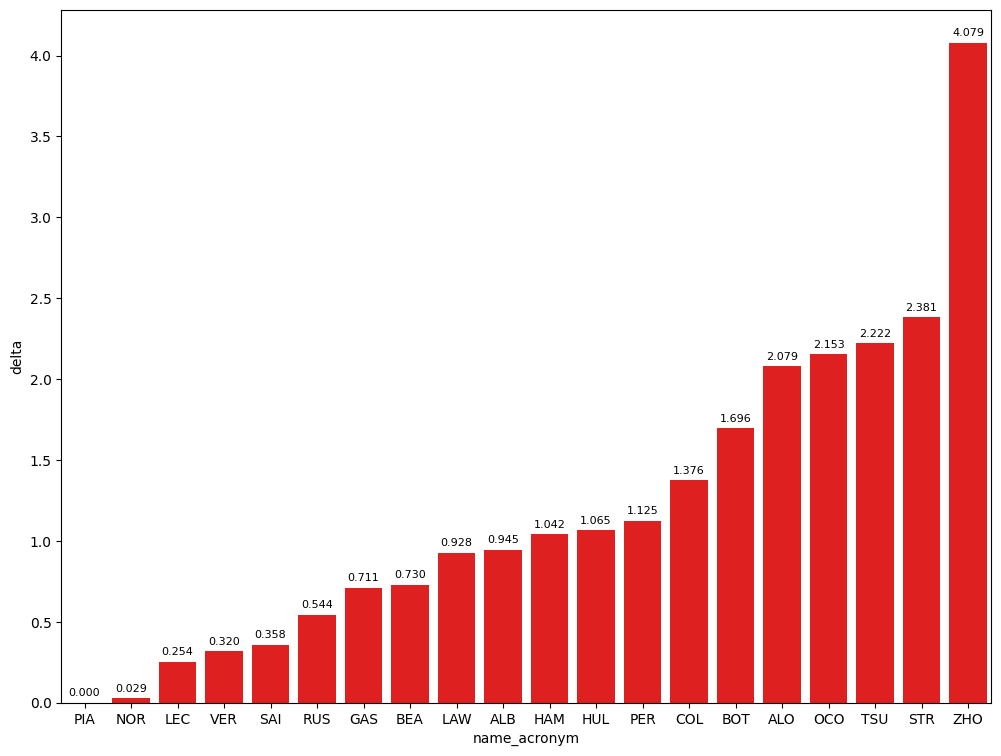

In [170]:
libraryDataF1.obtainchart("name_acronym","delta",jointables.sort_values(by=['fastest_lap'],ascending=True))

In [171]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In [172]:
# In order to know when each session finished, race control dataset will be consulted.
maximumDateQ1 = "date_start <'2024-11-01T18:42:00+00:00'"
maximumDateQ2 = "date_start <'2024-11-01T19:06:00+00:00' and date_start >='2024-11-01T18:42:00+00:00'"
maximumDateQ3 = "date_start >'2024-11-01T19:06:00+00:00'"

### Sprint Qualyfing 1

In [173]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q1Data

meeting_key_x  session_key_x  driver_number  i1_speed  i2_speed  st_speed  \
44           1249           9631              4       328       267     329.0   
52           1249           9631             81       329       265     327.0   
31           1249           9631             23       328       268     328.0   
2            1249           9631             16       325       269     325.0   
28           1249           9631             11       326       265     326.0   
63           1249           9631              1       326       266     324.0   
60           1249           9631             50       328       265     328.0   
57           1249           9631             27       328       264     318.0   
66           1249           9631             43       328       267     328.0   
35           1249           9631             63       328       268     323.0   
7            1249           9631             55       325       266     323.0   
47           1249           9631             30       325       264     325.0   
40           1249           9631             44       326       268     324.0   
19           1249           9631             10       327       265     327.0   
15           1249           9631             77       325       264     323.0   
24           1249           9631             14       326       267     326.0   
26           1249           9631             31       327       266     326.0   
51           1249           9631             22       325       265     323.0   
12           1249           9631             18       327       267     327.0   
13           1249           9631             24       322       261     319.0   

                          date_start  lap_duration  is_pit_out_lap  \
44  2024-11-01T18:41:43.441000+00:00        69.477           False   
52  2024-11-01T18:34:08.264000+00:00        70.265           False   
31  2024-11-01T18:41:52.055000+00:00        70.366           False   
2   2024-11-01T18:40:45.015000+00:00        70.388           False   
28  2024-11-01T18:40:06.540000+00:00        70.392           False   
63  2024-11-01T18:39:22.579000+00:00        70.409           False   
60  2024-11-01T18:41:11.218000+00:00        70.442           False   
57  2024-11-01T18:34:16.944000+00:00        70.466           False   
66  2024-11-01T18:41:57.796000+00:00        70.470           False   
35  2024-11-01T18:39:32.911000+00:00        70.479           False   
7   2024-11-01T18:36:18.531000+00:00        70.503           False   
47  2024-11-01T18:33:46.993000+00:00        70.576           False   
40  2024-11-01T18:39:57.933000+00:00        70.625           False   
19  2024-11-01T18:41:16.577000+00:00        70.630           False   
15  2024-11-01T18:41:34.318000+00:00        70.861           False   
24  2024-11-01T18:40:53.304000+00:00        70.978           False   
26  2024-11-01T18:41:28.191000+00:00        71.052           False   
51  2024-11-01T18:40:30.818000+00:00        71.121           False   
12  2024-11-01T18:41:04.284000+00:00        71.280           False   
13  2024-11-01T18:31:52.210000+00:00        72.978           False   

    duration_sector_1  ...  broadcast_name  country_code first_name  \
44             18.031  ...        L NORRIS           GBR      Lando   
52             18.209  ...       O PIASTRI           AUS      Oscar   
31             18.121  ...         A ALBON           THA  Alexander   
2              18.133  ...       C LECLERC           MON    Charles   
28             18.302  ...         S PEREZ           MEX     Sergio   
63             18.069  ...    M VERSTAPPEN           NED        Max   
60             18.238  ...       O BEARMAN          None       None   
57             18.372  ...    N HULKENBERG           GER       Nico   
66             18.273  ...     F COLAPINTO          None       None   
35             18.233  ...       G RUSSELL           GBR     George   
7              18.232  ...         C SAINZ        

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [174]:
#Reference
P15 = q1Data[14:15]
P15

meeting_key_x  session_key_x  driver_number  i1_speed  i2_speed  st_speed  \
15           1249           9631             77       325       264     323.0   

                          date_start  lap_duration  is_pit_out_lap  \
15  2024-11-01T18:41:34.318000+00:00        70.861           False   

    duration_sector_1  ...  broadcast_name  country_code first_name  \
15             18.406  ...        V BOTTAS           FIN   Valtteri   

          full_name                                       headshot_url  \
15  Valtteri BOTTAS  https://media.formula1.com/d_driver_fallback_i...   

    last_name  team_colour    team_name name_acronym isFastestLap  
15     Bottas       52E252  Kick Sauber          BOT         True  

[1 rows x 28 columns]

In [175]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

Driver: Valtteri BOTTAS Sector 1:  18.406 Sector 2:  35.926 Sector 3:  16.529


In [176]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 =  libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             14         0.117               -0.249                0.416   
1             31         0.191                0.005                0.241   
2             22         0.260               -0.096                0.378   
3             18         0.419               -0.188                0.724   
4             24         2.117                0.572                1.472   

   difference_sector_3 name_acronym  
0               -0.050          ALO  
1               -0.055          OCO  
2               -0.022          TSU  
3               -0.117          STR  
4                0.073          ZHO

### Best sector per driver

In [177]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

duration_sector_1
name_acronym                   
NOR                      18.031
VER                      18.069
ALB                      18.121
LEC                      18.133
ALO                      18.157
HAM                      18.165
GAS                      18.191
PIA                      18.209
STR                      18.218
SAI                      18.232
RUS                      18.233
BEA                      18.238
COL                      18.273
PER                      18.302
TSU                      18.310
LAW                      18.335
HUL                      18.372
BOT                      18.406
OCO                      18.411
ZHO                      18.978

In [178]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

duration_sector_2
name_acronym                   
NOR                      35.283
PER                      35.671
PIA                      35.761
LEC                      35.762
HUL                      35.784
COL                      35.788
RUS                      35.824
SAI                      35.866
LAW                      35.882
BEA                      35.901
ALB                      35.926
BOT                      35.926
HAM                      35.953
VER                      36.023
GAS                      36.090
OCO                      36.167
TSU                      36.304
ALO                      36.342
STR                      36.650
ZHO                      37.398

In [179]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

duration_sector_3
name_acronym                   
NOR                      16.163
PIA                      16.295
BEA                      16.303
HUL                      16.310
VER                      16.317
ALB                      16.319
GAS                      16.349
LAW                      16.359
SAI                      16.405
COL                      16.409
STR                      16.412
PER                      16.419
RUS                      16.422
OCO                      16.474
ALO                      16.479
LEC                      16.493
TSU                      16.507
HAM                      16.507
BOT                      16.529
ZHO                      16.602

### Sprint Qualyfing 2

In [180]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q2Data

meeting_key_x  session_key_x  driver_number  i1_speed  i2_speed  st_speed  \
45           1249           9631              4       328       268     326.0   
54           1249           9631             81       327       266     325.0   
4            1249           9631             16       325       269     323.0   
64           1249           9631              1       326       266     324.0   
9            1249           9631             55       326       268     325.0   
21           1249           9631             10       325       267     325.0   
61           1249           9631             50       329       267     326.0   
36           1249           9631             63       326       268     322.0   
48           1249           9631             30       324       265     324.0   
32           1249           9631             23       328       269     327.0   
42           1249           9631             44       327       268     329.0   
58           1249           9631             27       326       267     323.0   
29           1249           9631             11       326       264     326.0   
67           1249           9631             43       327       265     325.0   
17           1249           9631             77       323       265     323.0   

                          date_start  lap_duration  is_pit_out_lap  \
45  2024-11-01T18:51:07.007000+00:00        69.063           False   
54  2024-11-01T18:58:19.249000+00:00        69.239           False   
4   2024-11-01T18:58:28.238000+00:00        69.248           False   
64  2024-11-01T18:53:11.724000+00:00        69.489           False   
9   2024-11-01T18:51:21.144000+00:00        69.500           False   
21  2024-11-01T18:58:09.091000+00:00        69.610           False   
61  2024-11-01T18:57:32.961000+00:00        69.629           False   
36  2024-11-01T18:50:18.220000+00:00        69.683           False   
48  2024-11-01T18:57:52.480000+00:00        69.827           False   
32  2024-11-01T18:53:58.616000+00:00        69.844           False   
42  2024-11-01T18:58:40.761000+00:00        69.941           False   
58  2024-11-01T18:57:27.022000+00:00        69.964           False   
29  2024-11-01T18:53:18.139000+00:00        70.024           False   
67  2024-11-01T18:54:09.730000+00:00        70.275           False   
17  2024-11-01T18:58:34.152000+00:00        70.595           False   

    duration_sector_1  ...  broadcast_name  country_code first_name  \
45             17.994  ...        L NORRIS           GBR      Lando   
54             18.072  ...       O PIASTRI           AUS      Oscar   
4              18.100  ...       C LECLERC           MON    Charles   
64             17.969  ...    M VERSTAPPEN           NED        Max   
9              18.051  ...         C SAINZ           ESP     Carlos   
21             18.100  ...         P GASLY           FRA     Pierre   
61             18.236  ...       O BEARMAN          None       None   
36             18.126  ...       G RUSSELL           GBR     George   
48             18.233  ...        L LAWSON          None       None   
32             18.063  ...         A ALBON           THA  Alexander   
42             18.094  ...      L HAMILTON           GBR      Lewis   
58             18.169  ...    N HULKENBERG           GER       Nico   
29             18.062  ...         S PEREZ           MEX     Sergio   
67             18.257  ...     F COLAPINTO          None       None   
17             18.456  ...        V BOTTAS           FIN   Valtteri   

           full_name                                       headshot_url  \
45      Lando NORRIS  https://media.formula1.com/d_driver_fallback_i...   
54     Oscar PIASTRI  https://media.formula1.com/d_driver_fallback_i...   
4    Charles LECLERC  https://media.formula1.com/d_driver_fallback_i...   
64    Max VERSTAPPEN  https://media.formula1.com/d_driver_fallback_i...   
9       Carlos SAINZ  https://media.formula1.com/d_driver_fallback_i...   

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [181]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

Driver: Alexander ALBON Sector 1:  18.063 Sector 2:  35.536 Sector 3:  16.245


In [182]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             44         0.097                0.031                0.091   
1             27         0.120                0.106               -0.024   
2             11         0.180               -0.001                0.074   
3             43         0.431                0.194                0.082   
4             77         0.751                0.393                0.265   

   difference_sector_3 name_acronym  
0               -0.025          HAM  
1                0.038          HUL  
2                0.107          PER  
3                0.155          COL  
4                0.093          BOT

### Best sector per driver

In [183]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

duration_sector_1
name_acronym                   
VER                      17.969
NOR                      17.994
SAI                      18.051
PER                      18.062
ALB                      18.063
PIA                      18.072
HAM                      18.094
GAS                      18.100
LEC                      18.100
RUS                      18.126
HUL                      18.169
LAW                      18.233
BEA                      18.236
COL                      18.257
BOT                      18.456

In [184]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

duration_sector_2
name_acronym                   
PIA                      34.941
NOR                      34.991
LEC                      35.040
SAI                      35.128
BEA                      35.294
VER                      35.299
GAS                      35.323
LAW                      35.353
RUS                      35.364
HUL                      35.512
ALB                      35.536
PER                      35.610
COL                      35.618
HAM                      35.627
BOT                      35.801

In [185]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

duration_sector_3
name_acronym                   
NOR                      16.078
BEA                      16.099
LEC                      16.108
GAS                      16.187
RUS                      16.193
HAM                      16.220
VER                      16.221
PIA                      16.226
LAW                      16.241
ALB                      16.245
HUL                      16.283
SAI                      16.321
BOT                      16.338
PER                      16.352
COL                      16.400

### Sprint Qualyfing 3

In [186]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q3Data

meeting_key_x  session_key_x  driver_number  i1_speed  i2_speed  st_speed  \
56           1249           9631             81       327       267     323.0   
46           1249           9631              4       327       269     325.0   
5            1249           9631             16       325       269     323.0   
65           1249           9631              1       328       265     325.0   
10           1249           9631             55       326       267     322.0   
38           1249           9631             63       327       269     325.0   
22           1249           9631             10       325       266     324.0   
49           1249           9631             30       324       265     322.0   
33           1249           9631             23       327       267     325.0   

                          date_start  lap_duration  is_pit_out_lap  \
56  2024-11-01T19:12:25.014000+00:00        68.899           False   
46  2024-11-01T19:07:39.565000+00:00        68.928           False   
5   2024-11-01T19:12:04.284000+00:00        69.153           False   
65  2024-11-01T19:13:11.217000+00:00        69.219           False   
10  2024-11-01T19:11:55.495000+00:00        69.257           False   
38  2024-11-01T19:13:19.108000+00:00        69.443           False   
22  2024-11-01T19:11:26.838000+00:00        69.622           False   
49  2024-11-01T19:11:47.311000+00:00        69.941           False   
33  2024-11-01T19:08:24.783000+00:00        70.078           False   

    duration_sector_1  ...  broadcast_name  country_code first_name  \
56             17.825  ...       O PIASTRI           AUS      Oscar   
46             17.793  ...        L NORRIS           GBR      Lando   
5              18.033  ...       C LECLERC           MON    Charles   
65             17.857  ...    M VERSTAPPEN           NED        Max   
10             17.983  ...         C SAINZ           ESP     Carlos   
38             17.970  ...       G RUSSELL           GBR     George   
22             18.002  ...         P GASLY           FRA     Pierre   
49             18.281  ...        L LAWSON          None       None   
33             18.161  ...         A ALBON           THA  Alexander   

          full_name                                       headshot_url  \
56    Oscar PIASTRI  https://media.formula1.com/d_driver_fallback_i...   
46     Lando NORRIS  https://media.formula1.com/d_driver_fallback_i...   
5   Charles LECLERC  https://media.formula1.com/d_driver_fallback_i...   
65   Max VERSTAPPEN  https://media.formula1.com/d_driver_fallback_i...   
10     Carlos SAINZ  https://media.formula1.com/d_driver_fallback_i...   
38   George RUSSELL  https://media.formula1.com/d_driver_fallback_i...   
22     Pierre GASLY  https://media.formula1.com/d_driver_fallback_i...   
49      Liam LAWSON                                               None   
33  Alexander ALBON  https://media.formula1.com/d_driver_fallback_i...   

     last_name  team_colour        team_name name_acronym isFastestLap  
56     Piastri       FF8000          McLaren          PIA         True  
46      Norris       FF8000          McLaren          NOR         True  
5      Leclerc       E80020          Ferrari          LEC         True  
65  Verstappen       3671C6  Red Bull Racing          VER         True  
10       Sainz       E80020          Ferrari          SAI         True  
38     Russell       27F4D2         Mercedes          RUS         True  
22       Gasly       0093cc           Alpine          GAS         True  
49        None         None             None          LAW         True  
33       Albon       64C4FF         Williams          ALB         True  

[9 rows x 28 columns]

In [187]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

Driver: Oscar PIASTRI Sector 1:  17.825 Sector 2:  34.909 Sector 3:  16.165


##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [188]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0              4         0.029               -0.032                0.097   
1             16         0.254                0.208                0.150   
2              1         0.320                0.032                0.251   
3             55         0.358                0.158                0.170   
4             63         0.544                0.145                0.327   
5             10         0.723                0.177                0.513   
6             30         1.042                0.456                0.574   
7             23         1.179                0.336                0.734   

   difference_sector_3 name_acronym  
0               -0.036          NOR  
1               -0.104          LEC  
2                0.037          VER  
3                0.030          SAI  
4                0.072          RUS  
5                0.033          GAS  
6                0.012          LAW  
7                0.109          ALB

### Best sector per driver

In [189]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

duration_sector_1
name_acronym                   
NOR                      17.793
PIA                      17.825
VER                      17.857
RUS                      17.970
SAI                      17.983
GAS                      18.002
LEC                      18.033
ALB                      18.161
LAW                      18.281

In [190]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

duration_sector_2
name_acronym                   
PIA                      34.909
NOR                      35.006
LEC                      35.059
SAI                      35.079
VER                      35.160
RUS                      35.236
GAS                      35.422
LAW                      35.483
ALB                      35.643

In [191]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

duration_sector_3
name_acronym                   
LEC                      16.061
NOR                      16.129
PIA                      16.165
LAW                      16.177
SAI                      16.195
GAS                      16.198
VER                      16.202
RUS                      16.237
ALB                      16.274

### Best sector in the session

In [192]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

duration_sector_1
name_acronym                   
NOR                      17.793
PIA                      17.825
VER                      17.857
RUS                      17.970
SAI                      17.983
GAS                      18.002
LEC                      18.033
PER                      18.062
ALB                      18.063
HAM                      18.094
ALO                      18.157
HUL                      18.169
STR                      18.218
LAW                      18.233
BEA                      18.236
COL                      18.257
TSU                      18.310
BOT                      18.387
OCO                      18.411
ZHO                      18.978

In [193]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

duration_sector_2
name_acronym                   
PIA                      34.909
NOR                      34.991
LEC                      35.040
SAI                      35.079
VER                      35.160
RUS                      35.236
BEA                      35.294
GAS                      35.323
LAW                      35.353
HUL                      35.512
ALB                      35.536
PER                      35.610
COL                      35.618
HAM                      35.627
BOT                      35.801
OCO                      36.167
TSU                      36.304
ALO                      36.342
STR                      36.650
ZHO                      37.398

In [194]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

duration_sector_3
name_acronym                   
LEC                      16.061
NOR                      16.078
BEA                      16.099
PIA                      16.165
LAW                      16.177
GAS                      16.187
RUS                      16.193
SAI                      16.195
VER                      16.202
HAM                      16.220
ALB                      16.245
HUL                      16.283
BOT                      16.338
ALO                      16.346
PER                      16.352
COL                      16.400
STR                      16.412
OCO                      16.471
TSU                      16.507
ZHO                      16.602

## Predictions

In [153]:
# Free Practice 1
practice = libraryDataF1.obtain_information('laps',session_key=9626)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9626)
drivers = libraryDataF1.obtain_information('drivers',session_key=9626)

stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

# Free Practice 2
# practice = libraryDataF1.obtain_information('laps',session_key=9600)
# stintInformation = libraryDataF1.obtain_information('stints',session_key=9600)
# drivers = libraryDataF1.obtain_information('drivers',session_key=9600)


# stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
# jointablesfreepractice2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

# Free Practice 3
# practice = libraryDataF1.obtain_information('laps',session_key=9591)
# stintInformation = libraryDataF1.obtain_information('stints',session_key=9591)
# drivers = libraryDataF1.obtain_information('drivers',session_key=9591)

# stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
# jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])


### Qualyfing prediction

In [154]:
qualy_simulation = libraryDataF1.qualyfing_prediction([jointablesfreepractice1,jointablesfreepractice1],drivers,0.05,0.07,0.08)
qualy_simulation.sort_values(by='qualy_lap_time')

/home/frank/Escritorio/F1_notebooks/F1_24/F1_library/libraryF1dataNotebook.py:320: RuntimeWarning: Mean of empty slice.
  sector1= dataset.query("team_name == @team and duration_sector_1 <=  @threshold_sector1").duration_sector_1.values.mean()
/home/frank/.local/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/frank/Escritorio/F1_notebooks/F1_24/F1_library/libraryF1dataNotebook.py:321: RuntimeWarning: Mean of empty slice.
  sector2 = dataset.query("team_name == @team and duration_sector_2 <=  @threshold_sector2").duration_sector_2.values.mean()
/home/frank/Escritorio/F1_notebooks/F1_24/F1_library/libraryF1dataNotebook.py:322: RuntimeWarning: Mean of empty slice.
  sector3 = dataset.query("team_name == @team and duration_sector_3 <=  @threshold_sector3").duration_sector_3.values.mean()
/home/frank/Escritorio/F1_notebooks/F1_24/F1_library/libraryF1dataNotebook.py:320: RuntimeWarni

team  qualy_lap_time  mean_sector_1  mean_sector_2  \
1           McLaren       71.346452      18.207333      36.677286   
4           Ferrari       71.518125      18.257000      36.775125   
8      Haas F1 Team       71.720167      18.242500      36.918000   
2            Alpine       71.735857      18.433667      36.767857   
0   Red Bull Racing       71.871738      18.302667      36.824571   
6          Williams       71.876417      18.229500      37.114250   
3      Aston Martin       71.957238      18.308667      37.127571   
10         Mercedes       72.028024      18.365333      37.051857   
5                RB       72.409500      18.457500      37.271667   
7       Kick Sauber       72.737310      18.707000      37.317143   
9              None             NaN            NaN            NaN   

    mean_sector_3  
1       16.461833  
4       16.486000  
8       16.559667  
2       16.534333  
0       16.744500  
6       16.532667  
3       16.521000  
10      16.610833  
5       16.680333  
7       16.713167  
9             NaN

### Race prediction

In [158]:
race_simulation = libraryDataF1.race_prediction(jointablesfreepractice1,drivers,74,78)
race_simulation.groupby('team').mean().sort_values(by='mean_lap_duration')

mean_lap_duration  mean_sector_1  mean_sector_2  \
team                                                               
Aston Martin             74.553500      19.210875      38.300500   
Mercedes                 74.710836      19.192973      38.496068   
Williams                 74.775143      19.320429      38.472714   
McLaren                  75.018444      19.275778      38.590389   
Haas F1 Team             75.072000      19.299000      38.628750   
Alpine                   75.249500      19.697250      38.620250   
Ferrari                  75.294875      19.190500      38.052750   
Red Bull Racing          75.496095      19.247563      38.697127   
Kick Sauber              75.901488      19.559750      39.112012   
RB                       76.066375      19.438375      39.386875   

                 mean_sector_3  
team                            
Aston Martin         17.042125  
Mercedes             17.021795  
Williams             16.982000  
McLaren              17.152278  
Haas F1 Team         17.144250  
Alpine               16.932000  
Ferrari              18.051625  
Red Bull Racing      17.551405  
Kick Sauber          17.229725  
RB                   17.241125

## Sprint

In [3]:
race = libraryDataF1.obtain_information('laps',session_key=9635)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9635)
drivers = libraryDataF1.obtain_information('drivers',session_key=9635)

In [4]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables = pd.merge(race,stintsDataFrame,on=['lap_number','driver_number'])
jointables

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
0           1249         9635              1     313.0     252.0     220.0   
1           1249         9635              4     306.0     247.0     213.0   
2           1249         9635             10     313.0     251.0     228.0   
3           1249         9635             11     307.0     244.0     222.0   
4           1249         9635             14     299.0     249.0       NaN   
..           ...          ...            ...       ...       ...       ...   
471         1249         9635             50     317.0     209.0     257.0   
472         1249         9635             55     294.0     258.0     252.0   
473         1249         9635             63     306.0     260.0     191.0   
474         1249         9635             77     307.0     256.0     308.0   
475         1249         9635             81     300.0     258.0     250.0   

                           date_start  lap_duration  is_pit_out_lap  \
0                                None           NaN           False   
1                                None           NaN           False   
2                                None           NaN           False   
3                                None           NaN           False   
4                                None           NaN           False   
..                                ...           ...             ...   
471  2024-11-02T14:32:15.427000+00:00        76.164           False   
472  2024-11-02T14:31:47.754000+00:00        75.594           False   
473  2024-11-02T14:31:50.978000+00:00        77.601           False   
474  2024-11-02T14:32:26.589000+00:00        72.698           False   
475  2024-11-02T14:31:39.825000+00:00        76.764           False   

     duration_sector_1  duration_sector_2  duration_sector_3  \
0                  NaN             38.254             16.432   
1                  NaN             37.306             16.292   
2                  NaN             39.545             16.607   
3                  NaN             39.939             17.181   
4                  NaN             38.864             16.853   
..                 ...                ...                ...   
471             20.049             39.171             16.944   
472             21.761             37.167             16.666   
473             23.310             37.799             16.492   
474             19.040             36.962             16.696   
475             22.297             37.879             16.588   

                              segments_sector_1  \
0    [2064, 2051, 2049, 2049, 2049, 2049, 2049]   
1    [2064, 2049, 2049, 2049, 2049, 2049, 2049]   
2    [2064, 2049, 2049, 2049, 2049, 2049, 2049]   
3    [2048, 2049, 2049, 2049, 2049, 2049, 2049]   
4    [2064, 2064, 2064, 2064, 2064, 2064, 2049]   
..                                          ...   
471  [None, 2048, 2048, 2048, 2048, 2048, 2048]   
472  [None, 2048, 2048, 2048, 2048, 2048, 2048]   
473  [None, 2048, 2048, 2048, 2048, 2048, 2048]   
474  [None, 2048, 2048, 2048, 2049, 2048, 2048]   
475  [None, 2048, 2048, 2048, 2048, 2048, 2048]   

                                    segments_sector_2  \
0    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]   
1    [2049, 2051, 2049, 2051, 2049, 2049, 2051, 2049]   
2    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]   
3    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]   
4    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]   
..                                                ...   
471  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]   
472  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]   
473  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]   
474  [2049, 2048, 2049, 2048, 2049, 2049, 2049, 2049]   
475  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]   

                  segments_sector_3  lap_number compound name_acronym  \
0    [2049, 2049, 2049, 2051, 2051]           1   MEDIUM          VER   
1 

### Pace per compound

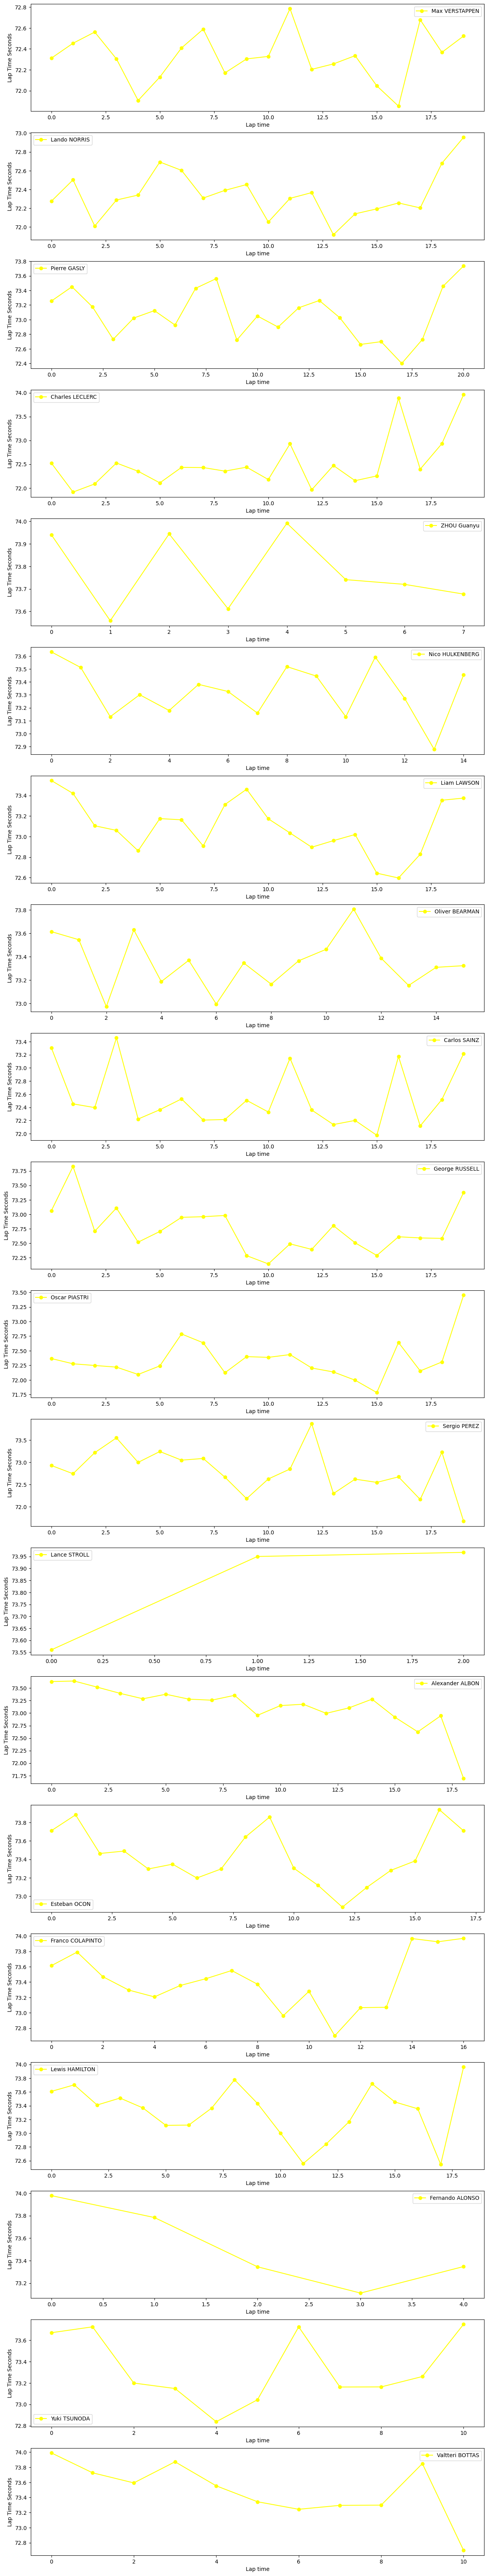

In [5]:
libraryDataF1.obtain_data_tyres(jointables,"MEDIUM",74)

### Top speed captured in the speed trap

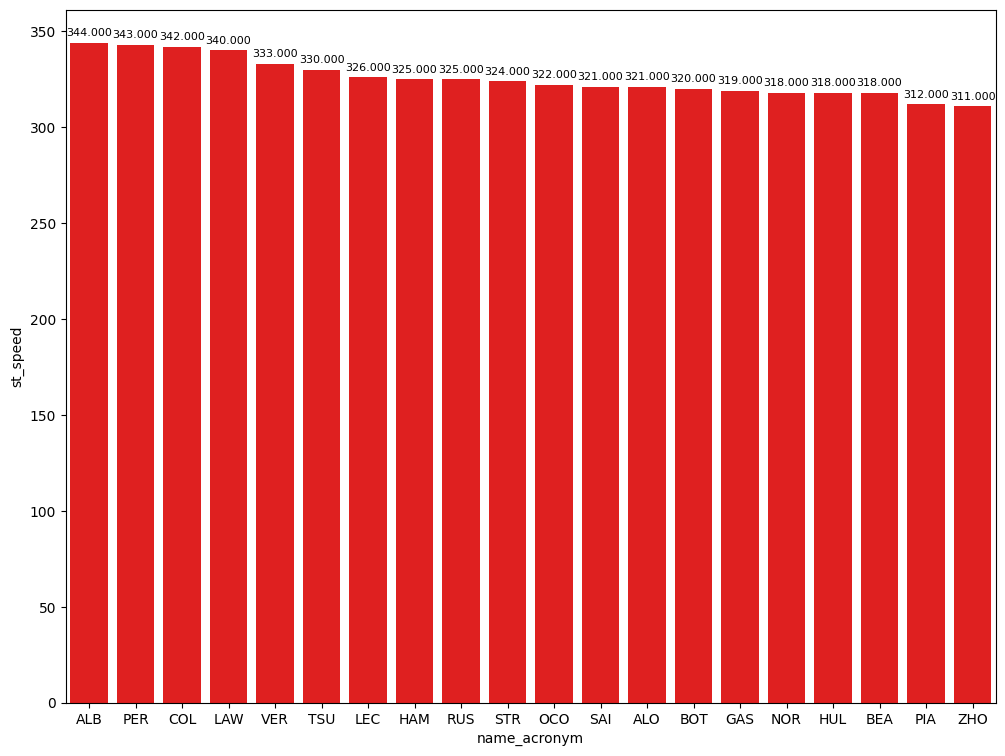

In [6]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

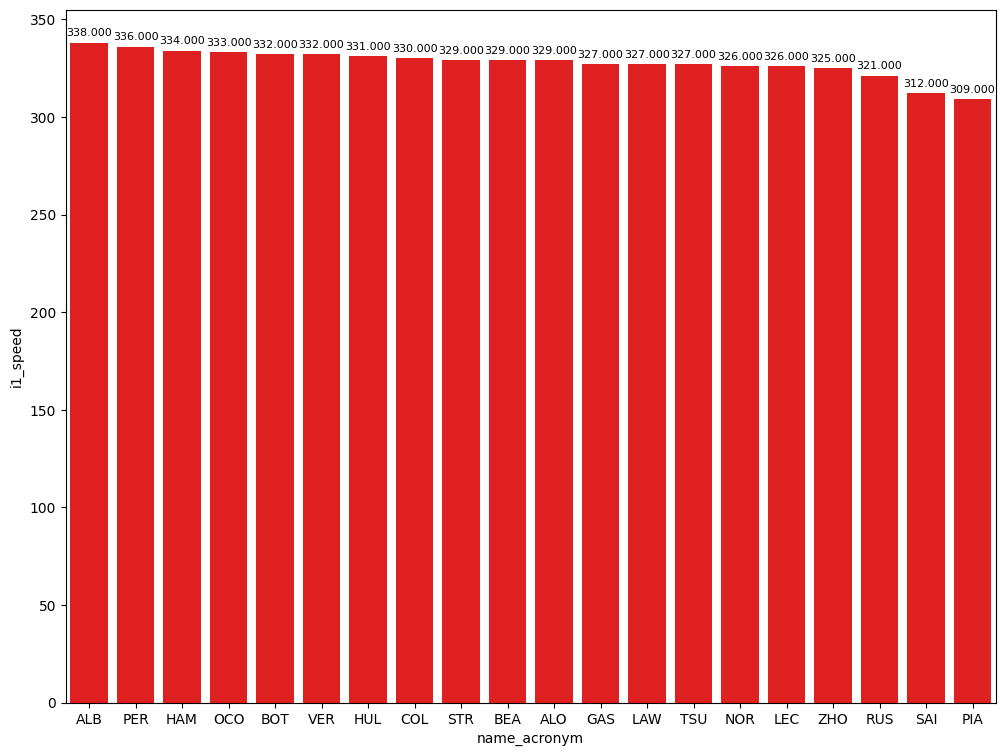

In [7]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

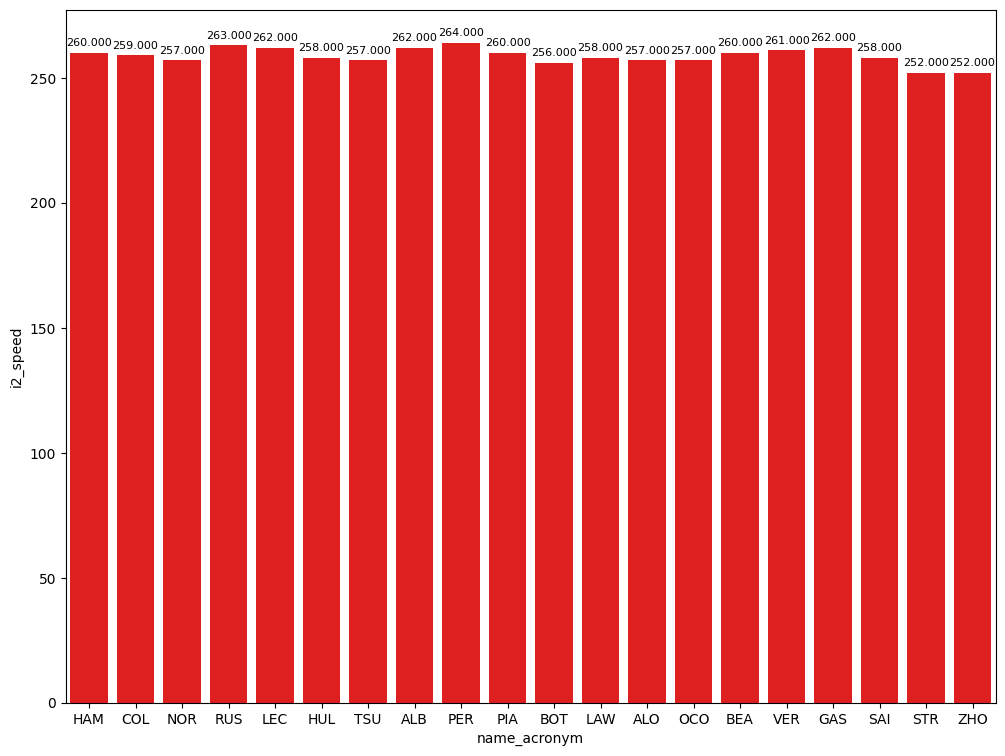

In [8]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [9]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=74").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
team_name                    
McLaren             72.357448
Red Bull Racing     72.536676
Ferrari             72.584034
Mercedes            73.094379
RB                  73.224773
Alpine              73.226633
Williams            73.238667
Haas F1 Team        73.367880
Kick Sauber         73.599312
Aston Martin        73.763833

### Race pace per teams

In [10]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=74").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

duration_sector_1
team_name                         
Red Bull Racing          18.815811
McLaren                  18.838379
Williams                 18.909727
Mercedes                 18.914448
Ferrari                  18.962310
Alpine                   18.966967
Haas F1 Team             19.048320
RB                       19.063318
Aston Martin             19.091000
Kick Sauber              19.162500

In [11]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=74").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

duration_sector_2
team_name                         
McLaren                  37.113897
Ferrari                  37.132586
Red Bull Racing          37.307703
RB                       37.597682
Alpine                   37.664333
Kick Sauber              37.706500
Mercedes                 37.736759
Williams                 37.826485
Haas F1 Team             37.830880
Aston Martin             38.003000

In [12]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=74").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

duration_sector_3
team_name                         
McLaren                  16.405172
Red Bull Racing          16.413162
Mercedes                 16.443172
Haas F1 Team             16.488680
Ferrari                  16.489138
Williams                 16.502455
RB                       16.563773
Alpine                   16.595333
Aston Martin             16.669833
Kick Sauber              16.730313

### Race pace

In [13]:
MINIMUN_SECONDS = 70
MAXIMUM_SECONDS = 74

#### Red Bull Racing

In [14]:
stintInformation.query('driver_number == 1 or driver_number == 11')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
1         1249         9635             1              1          1       25   
4         1249         9635             1             11          1       25   

  compound  tyre_age_at_start  
1   MEDIUM                  3  
4   MEDIUM                  4

In [15]:
libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
20   Max VERSTAPPEN   MEDIUM  2024-11-02T14:04:28.786000+00:00           2   
40   Max VERSTAPPEN   MEDIUM  2024-11-02T14:05:41.189000+00:00           3   
60   Max VERSTAPPEN   MEDIUM  2024-11-02T14:06:53.613000+00:00           4   
80   Max VERSTAPPEN   MEDIUM  2024-11-02T14:08:06.063000+00:00           5   
100  Max VERSTAPPEN   MEDIUM  2024-11-02T14:09:18.336000+00:00           6   
120  Max VERSTAPPEN   MEDIUM  2024-11-02T14:10:30.236000+00:00           7   
140  Max VERSTAPPEN   MEDIUM  2024-11-02T14:11:42.427000+00:00           8   
160  Max VERSTAPPEN   MEDIUM  2024-11-02T14:12:54.815000+00:00           9   
180  Max VERSTAPPEN   MEDIUM  2024-11-02T14:14:07.497000+00:00          10   
200  Max VERSTAPPEN   MEDIUM  2024-11-02T14:15:19.632000+00:00          11   
220  Max VERSTAPPEN   MEDIUM  2024-11-02T14:16:31.956000+00:00          12   
240  Max VERSTAPPEN   MEDIUM  2024-11-02T14:17:44.300000+00:00          13   
260  Max VERSTAPPEN   MEDIUM  2024-11-02T14:18:57.059000+00:00          14   
280  Max VERSTAPPEN   MEDIUM  2024-11-02T14:20:09.308000+00:00          15   
300  Max VERSTAPPEN   MEDIUM  2024-11-02T14:21:21.577000+00:00          16   
320  Max VERSTAPPEN   MEDIUM  2024-11-02T14:22:33.769000+00:00          17   
340  Max VERSTAPPEN   MEDIUM  2024-11-02T14:23:45.935000+00:00          18   
360  Max VERSTAPPEN   MEDIUM  2024-11-02T14:24:57.685000+00:00          19   
380  Max VERSTAPPEN   MEDIUM  2024-11-02T14:26:10.652000+00:00          20   
400  Max VERSTAPPEN   MEDIUM  2024-11-02T14:27:22.786000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
20              18.902             37.261             16.148        72.311  
40              18.813             37.327             16.314        72.454  
60              18.555             37.462             16.544        72.561  
80              18.726             37.101             16.477        72.304  
100             18.579             36.969             16.358        71.906  
120             18.486             37.161             16.483        72.130  
140             18.526             37.511             16.372        72.409  
160             18.649             37.498             16.442        72.589  
180             18.482             37.368             16.320        72.170  
200             18.519             37.477             16.308        72.304  
220             18.511             37.469             16.348        72.328  
240             18.984             37.451             16.350        72.785  
260             18.700             37.180             16.324        72.204  
280             18.558             37.406             16.292        72.256  
300             19.092             36.942             16.301        72.335  
320             18.623             37.121             16.302        72.046  
340             18.711             36.739             16.402        71.852  
360             18.887             36.913             16.879        72.679  
380             18.866             36.990             16.511        72.367  
400             18.861             37.185             16.477        72.523

In [16]:
libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
43   Sergio PEREZ   MEDIUM  2024-11-02T14:05:48.041000+00:00           3   
63   Sergio PEREZ   MEDIUM  2024-11-02T14:07:00.900000+00:00           4   
83   Sergio PEREZ   MEDIUM  2024-11-02T14:08:13.721000+00:00           5   
103  Sergio PEREZ   MEDIUM  2024-11-02T14:09:26.961000+00:00           6   
123  Sergio PEREZ   MEDIUM  2024-11-02T14:10:40.496000+00:00           7   
143  Sergio PEREZ   MEDIUM  2024-11-02T14:11:53.520000+00:00           8   
163  Sergio PEREZ   MEDIUM  2024-11-02T14:13:06.699000+00:00           9   
183  Sergio PEREZ   MEDIUM  2024-11-02T14:14:19.710000+00:00          10   
203  Sergio PEREZ   MEDIUM  2024-11-02T14:15:32.923000+00:00          11   
223  Sergio PEREZ   MEDIUM  2024-11-02T14:16:45.507000+00:00          12   
243  Sergio PEREZ   MEDIUM  2024-11-02T14:17:57.713000+00:00          13   
263  Sergio PEREZ   MEDIUM  2024-11-02T14:19:10.304000+00:00          14   
283  Sergio PEREZ   MEDIUM  2024-11-02T14:20:23.170000+00:00          15   
303  Sergio PEREZ   MEDIUM  2024-11-02T14:21:37.049000+00:00          16   
323  Sergio PEREZ   MEDIUM  2024-11-02T14:22:49.383000+00:00          17   
343  Sergio PEREZ   MEDIUM  2024-11-02T14:24:02.050000+00:00          18   
363  Sergio PEREZ   MEDIUM  2024-11-02T14:25:14.529000+00:00          19   
383  Sergio PEREZ   MEDIUM  2024-11-02T14:26:27.236000+00:00          20   
403  Sergio PEREZ   MEDIUM  2024-11-02T14:27:39.441000+00:00          21   
460  Sergio PEREZ   MEDIUM  2024-11-02T14:32:03.112000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
43              18.824             37.585             16.520        72.929  
63              18.704             37.554             16.485        72.743  
83              18.759             37.913             16.544        73.216  
103             18.835             38.049             16.664        73.548  
123             18.671             37.823             16.504        72.998  
143             18.816             37.835             16.591        73.242  
163             18.936             37.716             16.396        73.048  
183             18.835             37.785             16.466        73.086  
203             18.868             37.253             16.545        72.666  
223             18.850             36.967             16.367        72.184  
243             18.799             37.476             16.351        72.626  
263             18.957             37.520             16.372        72.849  
283             19.885             37.376             16.604        73.865  
303             18.996             36.970             16.332        72.298  
323             18.734             37.503             16.385        72.622  
343             18.825             37.367             16.357        72.549  
363             18.691             37.599             16.383        72.673  
383             18.990             36.787             16.389        72.166  
403             19.554             37.403             16.268        73.225  
460             18.727             36.632             16.319        71.678

#### Ferrari

In [17]:
stintInformation.query('driver_number == 16 or driver_number == 55')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
6          1249         9635             1             16          1       25   
16         1249         9635             1             55          1       25   

   compound  tyre_age_at_start  
6    MEDIUM                  6  
16   MEDIUM                  3

In [18]:
libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
25   Charles LECLERC   MEDIUM  2024-11-02T14:04:28.358000+00:00           2   
45   Charles LECLERC   MEDIUM  2024-11-02T14:05:40.801000+00:00           3   
65   Charles LECLERC   MEDIUM  2024-11-02T14:06:52.647000+00:00           4   
85   Charles LECLERC   MEDIUM  2024-11-02T14:08:04.811000+00:00           5   
105  Charles LECLERC   MEDIUM  2024-11-02T14:09:17.469000+00:00           6   
125  Charles LECLERC   MEDIUM  2024-11-02T14:10:29.768000+00:00           7   
145  Charles LECLERC   MEDIUM  2024-11-02T14:11:41.746000+00:00           8   
165  Charles LECLERC   MEDIUM  2024-11-02T14:12:54.380000+00:00           9   
185  Charles LECLERC   MEDIUM  2024-11-02T14:14:06.727000+00:00          10   
205  Charles LECLERC   MEDIUM  2024-11-02T14:15:19.035000+00:00          11   
225  Charles LECLERC   MEDIUM  2024-11-02T14:16:31.464000+00:00          12   
245  Charles LECLERC   MEDIUM  2024-11-02T14:17:43.639000+00:00          13   
265  Charles LECLERC   MEDIUM  2024-11-02T14:18:56.654000+00:00          14   
285  Charles LECLERC   MEDIUM  2024-11-02T14:20:08.529000+00:00          15   
305  Charles LECLERC   MEDIUM  2024-11-02T14:21:20.977000+00:00          16   
325  Charles LECLERC   MEDIUM  2024-11-02T14:22:33.175000+00:00          17   
345  Charles LECLERC   MEDIUM  2024-11-02T14:23:45.439000+00:00          18   
365  Charles LECLERC   MEDIUM  2024-11-02T14:24:59.375000+00:00          19   
385  Charles LECLERC   MEDIUM  2024-11-02T14:26:11.633000+00:00          20   
405  Charles LECLERC   MEDIUM  2024-11-02T14:27:24.585000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
25              18.938             37.274             16.311        72.523  
45              18.879             36.844             16.191        71.914  
65              18.554             37.277             16.254        72.085  
85              18.628             37.450             16.447        72.525  
105             18.801             37.126             16.424        72.351  
125             18.712             36.962             16.433        72.107  
145             18.848             37.197             16.388        72.433  
165             18.755             37.364             16.310        72.429  
185             18.590             37.442             16.322        72.354  
205             18.618             37.397             16.422        72.437  
225             18.567             37.346             16.264        72.177  
245             19.394             37.135             16.399        72.928  
265             18.694             36.976             16.292        71.962  
285             18.693             37.302             16.477        72.472  
305             18.712             36.972             16.469        72.153  
325             18.973             36.794             16.486        72.253  
345             19.181             38.045             16.660        73.886  
365             18.901             36.981             16.513        72.395  
385             18.982             37.264             16.685        72.931  
405             19.638             37.624             16.700        73.962

In [19]:
libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
36   Carlos SAINZ   MEDIUM  2024-11-02T14:04:29.799000+00:00           2   
56   Carlos SAINZ   MEDIUM  2024-11-02T14:05:43.011000+00:00           3   
76   Carlos SAINZ   MEDIUM  2024-11-02T14:06:55.506000+00:00           4   
96   Carlos SAINZ   MEDIUM  2024-11-02T14:08:07.961000+00:00           5   
116  Carlos SAINZ   MEDIUM  2024-11-02T14:09:21.458000+00:00           6   
136  Carlos SAINZ   MEDIUM  2024-11-02T14:10:33.579000+00:00           7   
156  Carlos SAINZ   MEDIUM  2024-11-02T14:11:45.896000+00:00           8   
176  Carlos SAINZ   MEDIUM  2024-11-02T14:12:58.451000+00:00           9   
196  Carlos SAINZ   MEDIUM  2024-11-02T14:14:10.652000+00:00          10   
216  Carlos SAINZ   MEDIUM  2024-11-02T14:15:22.844000+00:00          11   
236  Carlos SAINZ   MEDIUM  2024-11-02T14:16:35.368000+00:00          12   
256  Carlos SAINZ   MEDIUM  2024-11-02T14:17:47.665000+00:00          13   
276  Carlos SAINZ   MEDIUM  2024-11-02T14:19:00.865000+00:00          14   
296  Carlos SAINZ   MEDIUM  2024-11-02T14:20:13.250000+00:00          15   
316  Carlos SAINZ   MEDIUM  2024-11-02T14:21:25.362000+00:00          16   
336  Carlos SAINZ   MEDIUM  2024-11-02T14:22:37.557000+00:00          17   
356  Carlos SAINZ   MEDIUM  2024-11-02T14:23:49.562000+00:00          18   
376  Carlos SAINZ   MEDIUM  2024-11-02T14:25:02.709000+00:00          19   
396  Carlos SAINZ   MEDIUM  2024-11-02T14:26:14.862000+00:00          20   
415  Carlos SAINZ   MEDIUM  2024-11-02T14:27:27.413000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
36              19.690             37.155             16.462        73.307  
56              19.118             36.808             16.527        72.453  
76              18.657             37.076             16.663        72.396  
96              19.792             37.051             16.615        73.458  
116             18.820             36.843             16.559        72.222  
136             18.716             37.028             16.620        72.364  
156             18.888             36.956             16.684        72.528  
176             18.830             36.852             16.524        72.206  
196             18.726             37.005             16.484        72.215  
216             18.856             37.135             16.516        72.507  
236             18.902             36.873             16.554        72.329  
256             19.556             37.105             16.486        73.147  
276             18.883             36.928             16.548        72.359  
296             18.813             36.917             16.408        72.138  
316             18.803             36.828             16.570        72.201  
336             18.771             36.731             16.473        71.975  
356             19.409             37.113             16.653        73.175  
376             18.813             36.673             16.631        72.117  
396             18.815             37.125             16.579        72.519  
415             19.172             37.409             16.636        73.217

#### McLaren

In [20]:
stintInformation.query('driver_number == 4 or driver_number == 81')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
2          1249         9635             1              4          1       25   
19         1249         9635             1             81          1       25   

   compound  tyre_age_at_start  
2    MEDIUM                  3  
19   MEDIUM                  4

In [21]:
libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
21   Lando NORRIS   MEDIUM  2024-11-02T14:04:27.028000+00:00           2   
41   Lando NORRIS   MEDIUM  2024-11-02T14:05:39.167000+00:00           3   
61   Lando NORRIS   MEDIUM  2024-11-02T14:06:51.835000+00:00           4   
81   Lando NORRIS   MEDIUM  2024-11-02T14:08:03.914000+00:00           5   
101  Lando NORRIS   MEDIUM  2024-11-02T14:09:16.199000+00:00           6   
121  Lando NORRIS   MEDIUM  2024-11-02T14:10:28.479000+00:00           7   
141  Lando NORRIS   MEDIUM  2024-11-02T14:11:41.277000+00:00           8   
161  Lando NORRIS   MEDIUM  2024-11-02T14:12:53.827000+00:00           9   
181  Lando NORRIS   MEDIUM  2024-11-02T14:14:06.123000+00:00          10   
201  Lando NORRIS   MEDIUM  2024-11-02T14:15:18.557000+00:00          11   
221  Lando NORRIS   MEDIUM  2024-11-02T14:16:30.961000+00:00          12   
241  Lando NORRIS   MEDIUM  2024-11-02T14:17:42.992000+00:00          13   
261  Lando NORRIS   MEDIUM  2024-11-02T14:18:55.291000+00:00          14   
281  Lando NORRIS   MEDIUM  2024-11-02T14:20:07.629000+00:00          15   
301  Lando NORRIS   MEDIUM  2024-11-02T14:21:19.605000+00:00          16   
321  Lando NORRIS   MEDIUM  2024-11-02T14:22:31.673000+00:00          17   
341  Lando NORRIS   MEDIUM  2024-11-02T14:23:43.892000+00:00          18   
361  Lando NORRIS   MEDIUM  2024-11-02T14:24:56.092000+00:00          19   
381  Lando NORRIS   MEDIUM  2024-11-02T14:26:08.335000+00:00          20   
401  Lando NORRIS   MEDIUM  2024-11-02T14:27:21.050000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
21              18.907             37.136             16.231        72.274  
41              18.815             37.345             16.342        72.502  
61              18.653             37.162             16.195        72.010  
81              18.678             37.333             16.276        72.287  
101             18.787             37.195             16.358        72.340  
121             18.707             37.446             16.539        72.692  
141             18.888             37.159             16.556        72.603  
161             18.869             36.989             16.450        72.308  
181             18.731             37.194             16.465        72.390  
201             18.804             37.200             16.448        72.452  
221             18.689             37.087             16.277        72.053  
241             18.675             37.276             16.354        72.305  
261             18.793             37.180             16.393        72.366  
281             18.659             37.003             16.255        71.917  
301             18.763             37.107             16.270        72.140  
321             18.646             37.040             16.507        72.193  
341             18.898             37.116             16.242        72.256  
361             18.808             37.058             16.337        72.203  
381             18.853             37.361             16.465        72.679  
401             18.903             37.724             16.328        72.955

In [22]:
libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
39   Oscar PIASTRI   MEDIUM  2024-11-02T14:04:26.490000+00:00           2   
59   Oscar PIASTRI   MEDIUM  2024-11-02T14:05:39.081000+00:00           3   
79   Oscar PIASTRI   MEDIUM  2024-11-02T14:06:51.124000+00:00           4   
99   Oscar PIASTRI   MEDIUM  2024-11-02T14:08:03.471000+00:00           5   
119  Oscar PIASTRI   MEDIUM  2024-11-02T14:09:15.553000+00:00           6   
139  Oscar PIASTRI   MEDIUM  2024-11-02T14:10:27.650000+00:00           7   
159  Oscar PIASTRI   MEDIUM  2024-11-02T14:11:39.931000+00:00           8   
179  Oscar PIASTRI   MEDIUM  2024-11-02T14:12:52.728000+00:00           9   
199  Oscar PIASTRI   MEDIUM  2024-11-02T14:14:05.291000+00:00          10   
219  Oscar PIASTRI   MEDIUM  2024-11-02T14:15:17.484000+00:00          11   
239  Oscar PIASTRI   MEDIUM  2024-11-02T14:16:29.885000+00:00          12   
259  Oscar PIASTRI   MEDIUM  2024-11-02T14:17:42.226000+00:00          13   
279  Oscar PIASTRI   MEDIUM  2024-11-02T14:18:54.712000+00:00          14   
299  Oscar PIASTRI   MEDIUM  2024-11-02T14:20:06.942000+00:00          15   
319  Oscar PIASTRI   MEDIUM  2024-11-02T14:21:19.109000+00:00          16   
339  Oscar PIASTRI   MEDIUM  2024-11-02T14:22:31.341000+00:00          17   
359  Oscar PIASTRI   MEDIUM  2024-11-02T14:23:42.862000+00:00          18   
379  Oscar PIASTRI   MEDIUM  2024-11-02T14:24:55.494000+00:00          19   
399  Oscar PIASTRI   MEDIUM  2024-11-02T14:26:07.607000+00:00          20   
418  Oscar PIASTRI   MEDIUM  2024-11-02T14:27:19.905000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
39              18.939             37.068             16.359        72.366  
59              18.930             37.027             16.319        72.276  
79              18.903             37.018             16.326        72.247  
99              18.856             36.873             16.490        72.219  
119             18.908             36.722             16.463        72.093  
139             18.788             36.939             16.513        72.240  
159             18.894             37.214             16.679        72.787  
179             18.874             37.118             16.644        72.636  
199             18.870             36.794             16.458        72.122  
219             18.990             36.901             16.508        72.399  
239             18.948             36.950             16.488        72.386  
259             18.919             37.078             16.437        72.434  
279             18.956             36.858             16.390        72.204  
299             18.931             36.796             16.409        72.136  
319             18.872             36.757             16.366        71.995  
339             18.744             36.648             16.391        71.783  
359             19.124             37.001             16.516        72.641  
379             18.886             36.792             16.476        72.154  
399             18.955             36.930             16.422        72.307  
418             19.053             37.859             16.541        73.453

#### Mercedes

In [23]:
stintInformation.query('driver_number == 44 or driver_number == 63')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
14         1249         9635             1             44          1       25   
17         1249         9635             1             63          1       25   

   compound  tyre_age_at_start  
14   MEDIUM                  7  
17   MEDIUM                  6

In [24]:
libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
74   Lewis HAMILTON   MEDIUM  2024-11-02T14:07:03.470000+00:00           4   
94   Lewis HAMILTON   MEDIUM  2024-11-02T14:08:17.075000+00:00           5   
114  Lewis HAMILTON   MEDIUM  2024-11-02T14:09:30.780000+00:00           6   
134  Lewis HAMILTON   MEDIUM  2024-11-02T14:10:44.241000+00:00           7   
154  Lewis HAMILTON   MEDIUM  2024-11-02T14:11:57.635000+00:00           8   
174  Lewis HAMILTON   MEDIUM  2024-11-02T14:13:11.076000+00:00           9   
194  Lewis HAMILTON   MEDIUM  2024-11-02T14:14:24.103000+00:00          10   
214  Lewis HAMILTON   MEDIUM  2024-11-02T14:15:37.273000+00:00          11   
234  Lewis HAMILTON   MEDIUM  2024-11-02T14:16:50.592000+00:00          12   
254  Lewis HAMILTON   MEDIUM  2024-11-02T14:18:04.382000+00:00          13   
274  Lewis HAMILTON   MEDIUM  2024-11-02T14:19:17.821000+00:00          14   
294  Lewis HAMILTON   MEDIUM  2024-11-02T14:20:30.866000+00:00          15   
314  Lewis HAMILTON   MEDIUM  2024-11-02T14:21:43.412000+00:00          16   
334  Lewis HAMILTON   MEDIUM  2024-11-02T14:22:56.268000+00:00          17   
354  Lewis HAMILTON   MEDIUM  2024-11-02T14:24:09.424000+00:00          18   
374  Lewis HAMILTON   MEDIUM  2024-11-02T14:25:23.141000+00:00          19   
394  Lewis HAMILTON   MEDIUM  2024-11-02T14:26:36.537000+00:00          20   
413  Lewis HAMILTON   MEDIUM  2024-11-02T14:27:49.828000+00:00          21   
470  Lewis HAMILTON   MEDIUM  2024-11-02T14:32:11.944000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
74              18.846             38.301             16.461        73.608  
94              18.875             38.417             16.411        73.703  
114             18.618             38.403             16.389        73.410  
134             18.702             38.424             16.385        73.511  
154             18.760             38.162             16.445        73.367  
174             18.586             38.199             16.329        73.114  
194             18.760             38.108             16.250        73.118  
214             18.694             38.288             16.383        73.365  
234             18.916             38.370             16.491        73.777  
254             19.178             37.803             16.452        73.433  
274             18.941             37.728             16.334        73.003  
294             18.706             37.537             16.316        72.559  
314             18.693             37.907             16.243        72.843  
334             18.744             37.932             16.491        73.167  
354             19.115             38.183             16.421        73.719  
374             19.009             37.973             16.472        73.454  
394             18.776             38.173             16.406        73.355  
413             18.917             37.153             16.476        72.546  
470             19.298             37.891             16.774        73.963

In [25]:
libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
37   George RUSSELL   MEDIUM  2024-11-02T14:04:30.546000+00:00           2   
57   George RUSSELL   MEDIUM  2024-11-02T14:05:43.568000+00:00           3   
77   George RUSSELL   MEDIUM  2024-11-02T14:06:57.409000+00:00           4   
97   George RUSSELL   MEDIUM  2024-11-02T14:08:10.119000+00:00           5   
117  George RUSSELL   MEDIUM  2024-11-02T14:09:23.161000+00:00           6   
137  George RUSSELL   MEDIUM  2024-11-02T14:10:35.749000+00:00           7   
157  George RUSSELL   MEDIUM  2024-11-02T14:11:48.338000+00:00           8   
177  George RUSSELL   MEDIUM  2024-11-02T14:13:01.443000+00:00           9   
197  George RUSSELL   MEDIUM  2024-11-02T14:14:14.407000+00:00          10   
217  George RUSSELL   MEDIUM  2024-11-02T14:15:27.377000+00:00          11   
237  George RUSSELL   MEDIUM  2024-11-02T14:16:39.649000+00:00          12   
257  George RUSSELL   MEDIUM  2024-11-02T14:17:51.824000+00:00          13   
277  George RUSSELL   MEDIUM  2024-11-02T14:19:04.181000+00:00          14   
297  George RUSSELL   MEDIUM  2024-11-02T14:20:16.703000+00:00          15   
317  George RUSSELL   MEDIUM  2024-11-02T14:21:29.467000+00:00          16   
337  George RUSSELL   MEDIUM  2024-11-02T14:22:41.934000+00:00          17   
357  George RUSSELL   MEDIUM  2024-11-02T14:23:54.267000+00:00          18   
377  George RUSSELL   MEDIUM  2024-11-02T14:25:06.874000+00:00          19   
397  George RUSSELL   MEDIUM  2024-11-02T14:26:19.462000+00:00          20   
416  George RUSSELL   MEDIUM  2024-11-02T14:27:32.031000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
37              19.314             37.407             16.340        73.061  
57              19.721             37.606             16.499        73.826  
77              19.117             37.202             16.388        72.707  
97              18.955             37.581             16.572        73.108  
117             18.881             37.123             16.514        72.518  
137             18.898             37.320             16.485        72.703  
157             18.868             37.453             16.626        72.947  
177             18.878             37.507             16.573        72.958  
197             18.960             37.417             16.602        72.979  
217             18.860             37.030             16.395        72.285  
237             18.750             36.894             16.498        72.142  
257             18.783             37.253             16.453        72.489  
277             18.852             37.096             16.445        72.393  
297             18.914             37.447             16.442        72.803  
317             19.029             37.078             16.400        72.507  
337             18.896             36.951             16.441        72.288  
357             18.978             37.057             16.576        72.611  
377             18.797             37.320             16.474        72.591  
397             19.077             36.976             16.530        72.583  
416             18.872             37.954             16.551        73.377

#### Aston Martin

In [26]:
stintInformation.query('driver_number == 14 or driver_number == 18')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
5         1249         9635             1             14          1       25   
7         1249         9635             1             18          1       25   

  compound  tyre_age_at_start  
5   MEDIUM                  6  
7   MEDIUM                  6

In [27]:
libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
104  Fernando ALONSO   MEDIUM  2024-11-02T14:09:34.711000+00:00           6   
264  Fernando ALONSO   MEDIUM  2024-11-02T14:19:30.070000+00:00          14   
284  Fernando ALONSO   MEDIUM  2024-11-02T14:20:43.749000+00:00          15   
304  Fernando ALONSO   MEDIUM  2024-11-02T14:21:57.223000+00:00          16   
324  Fernando ALONSO   MEDIUM  2024-11-02T14:23:10.316000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
104             18.967             38.500             16.511        73.978  
264             19.268             37.750             16.765        73.783  
284             19.250             37.443             16.652        73.345  
304             19.222             37.400             16.489        73.111  
324             19.063             37.630             16.654        73.347

In [28]:
libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
46   Lance STROLL   MEDIUM  2024-11-02T14:05:53.259000+00:00           3   
106  Lance STROLL   MEDIUM  2024-11-02T14:09:35.388000+00:00           6   
346  Lance STROLL   MEDIUM  2024-11-02T14:24:29.980000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
46              19.009             38.032             16.519        73.560  
106             18.894             38.374             16.682        73.950  
346             19.158             37.919             16.890        73.967

#### RB

In [29]:
stintInformation.query('driver_number == 30 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
8          1249         9635             1             22          1       25   
11         1249         9635             1             30          1       25   

   compound  tyre_age_at_start  
8    MEDIUM                  3  
11   MEDIUM                  0

In [30]:
libraryDataF1.getinfolongruns(jointables,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
31   Liam LAWSON   MEDIUM  2024-11-02T14:04:31.637000+00:00           2   
51   Liam LAWSON   MEDIUM  2024-11-02T14:05:45.351000+00:00           3   
71   Liam LAWSON   MEDIUM  2024-11-02T14:06:58.722000+00:00           4   
91   Liam LAWSON   MEDIUM  2024-11-02T14:08:11.843000+00:00           5   
111  Liam LAWSON   MEDIUM  2024-11-02T14:09:24.819000+00:00           6   
131  Liam LAWSON   MEDIUM  2024-11-02T14:10:37.769000+00:00           7   
151  Liam LAWSON   MEDIUM  2024-11-02T14:11:50.947000+00:00           8   
171  Liam LAWSON   MEDIUM  2024-11-02T14:13:04.060000+00:00           9   
191  Liam LAWSON   MEDIUM  2024-11-02T14:14:16.936000+00:00          10   
211  Liam LAWSON   MEDIUM  2024-11-02T14:15:30.341000+00:00          11   
231  Liam LAWSON   MEDIUM  2024-11-02T14:16:43.754000+00:00          12   
251  Liam LAWSON   MEDIUM  2024-11-02T14:17:56.911000+00:00          13   
271  Liam LAWSON   MEDIUM  2024-11-02T14:19:09.914000+00:00          14   
291  Liam LAWSON   MEDIUM  2024-11-02T14:20:22.862000+00:00          15   
311  Liam LAWSON   MEDIUM  2024-11-02T14:21:35.845000+00:00          16   
331  Liam LAWSON   MEDIUM  2024-11-02T14:22:48.879000+00:00          17   
351  Liam LAWSON   MEDIUM  2024-11-02T14:24:01.522000+00:00          18   
371  Liam LAWSON   MEDIUM  2024-11-02T14:25:14.160000+00:00          19   
410  Liam LAWSON   MEDIUM  2024-11-02T14:27:41.039000+00:00          21   
467  Liam LAWSON   MEDIUM  2024-11-02T14:32:03.551000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
31              19.272             37.954             16.320        73.546  
51              18.925             38.173             16.322        73.420  
71              18.956             37.769             16.380        73.105  
91              19.101             37.540             16.419        73.060  
111             18.780             37.561             16.520        72.861  
131             18.888             37.777             16.510        73.175  
151             19.010             37.527             16.626        73.163  
171             19.106             37.440             16.362        72.908  
191             18.996             37.864             16.452        73.312  
211             18.973             37.848             16.640        73.461  
231             18.971             37.613             16.589        73.173  
251             19.120             37.389             16.526        73.035  
271             19.145             37.254             16.497        72.896  
291             19.295             37.299             16.366        72.960  
311             18.947             37.664             16.409        73.020  
331             18.930             37.342             16.371        72.643  
351             18.902             37.348             16.346        72.596  
371             18.889             37.370             16.568        72.827  
410             19.132             37.701             16.521        73.354  
467             19.382             37.428             16.565        73.375

In [31]:
libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
107  Yuki TSUNODA   MEDIUM  2024-11-02T14:09:33.937000+00:00           6   
207  Yuki TSUNODA   MEDIUM  2024-11-02T14:15:45.432000+00:00          11   
227  Yuki TSUNODA   MEDIUM  2024-11-02T14:16:59.254000+00:00          12   
247  Yuki TSUNODA   MEDIUM  2024-11-02T14:18:12.413000+00:00          13   
267  Yuki TSUNODA   MEDIUM  2024-11-02T14:19:25.612000+00:00          14   
287  Yuki TSUNODA   MEDIUM  2024-11-02T14:20:38.367000+00:00          15   
307  Yuki TSUNODA   MEDIUM  2024-11-02T14:21:51.434000+00:00          16   
327  Yuki TSUNODA   MEDIUM  2024-11-02T14:23:05.106000+00:00          17   
347  Yuki TSUNODA   MEDIUM  2024-11-02T14:24:18.375000+00:00          18   
367  Yuki TSUNODA   MEDIUM  2024-11-02T14:25:31.559000+00:00          19   
387  Yuki TSUNODA   MEDIUM  2024-11-02T14:26:44.770000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
107             18.983             38.149             16.537        73.669  
207             19.056             37.856             16.812        73.724  
227             18.963             37.483             16.753        73.199  
247             19.043             37.367             16.738        73.148  
267             18.935             37.182             16.721        72.838  
287             18.929             37.387             16.727        73.043  
307             19.711             37.375             16.638        73.724  
327             19.074             37.359             16.729        73.162  
347             19.075             37.364             16.724        73.163  
367             19.104             37.477             16.679        73.260  
387             19.147             37.573             17.028        73.748

#### Haas F1 Team

In [45]:
stintInformation.query('driver_number == 50 or driver_number == 27')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1249         9635             1             27          1       20   
15         1249         9635             1             50          1       25   

   compound  tyre_age_at_start  
0    MEDIUM                  5  
15   MEDIUM                  6

In [44]:
libraryDataF1.getinfolongruns(jointables,50,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
35   Oliver BEARMAN   MEDIUM  2024-11-02T14:04:32.646000+00:00           2   
55   Oliver BEARMAN   MEDIUM  2024-11-02T14:05:46.281000+00:00           3   
75   Oliver BEARMAN   MEDIUM  2024-11-02T14:06:59.918000+00:00           4   
95   Oliver BEARMAN   MEDIUM  2024-11-02T14:08:12.860000+00:00           5   
115  Oliver BEARMAN   MEDIUM  2024-11-02T14:09:26.482000+00:00           6   
135  Oliver BEARMAN   MEDIUM  2024-11-02T14:10:39.745000+00:00           7   
155  Oliver BEARMAN   MEDIUM  2024-11-02T14:11:53.135000+00:00           8   
175  Oliver BEARMAN   MEDIUM  2024-11-02T14:13:06.096000+00:00           9   
195  Oliver BEARMAN   MEDIUM  2024-11-02T14:14:19.248000+00:00          10   
235  Oliver BEARMAN   MEDIUM  2024-11-02T14:16:46.685000+00:00          12   
255  Oliver BEARMAN   MEDIUM  2024-11-02T14:18:00.145000+00:00          13   
275  Oliver BEARMAN   MEDIUM  2024-11-02T14:19:13.921000+00:00          14   
295  Oliver BEARMAN   MEDIUM  2024-11-02T14:20:27.390000+00:00          15   
315  Oliver BEARMAN   MEDIUM  2024-11-02T14:21:40.769000+00:00          16   
335  Oliver BEARMAN   MEDIUM  2024-11-02T14:22:53.917000+00:00          17   
355  Oliver BEARMAN   MEDIUM  2024-11-02T14:24:07.223000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
35              18.821             38.488             16.306        73.615  
55              19.326             37.935             16.285        73.546  
75              18.847             37.902             16.225        72.974  
95              18.868             38.402             16.360        73.630  
115             18.882             37.896             16.410        73.188  
135             18.880             38.092             16.398        73.370  
155             18.958             37.640             16.398        72.996  
175             19.258             37.484             16.605        73.347  
195             18.978             37.643             16.545        73.166  
235             19.082             37.843             16.441        73.366  
255             19.099             37.761             16.604        73.464  
275             19.507             37.733             16.567        73.807  
295             19.146             37.725             16.517        73.388  
315             19.183             37.400             16.572        73.155  
335             19.249             37.523             16.538        73.310  
355             19.230             37.516             16.578        73.324

In [34]:
libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
30   Nico HULKENBERG   MEDIUM  2024-11-02T14:04:32.134000+00:00           2   
50   Nico HULKENBERG   MEDIUM  2024-11-02T14:05:45.957000+00:00           3   
70   Nico HULKENBERG   MEDIUM  2024-11-02T14:06:59.345000+00:00           4   
90   Nico HULKENBERG   MEDIUM  2024-11-02T14:08:12.545000+00:00           5   
110  Nico HULKENBERG   MEDIUM  2024-11-02T14:09:25.865000+00:00           6   
130  Nico HULKENBERG   MEDIUM  2024-11-02T14:10:38.966000+00:00           7   
150  Nico HULKENBERG   MEDIUM  2024-11-02T14:11:52.429000+00:00           8   
190  Nico HULKENBERG   MEDIUM  2024-11-02T14:14:21.606000+00:00          10   
210  Nico HULKENBERG   MEDIUM  2024-11-02T14:15:34.617000+00:00          11   
230  Nico HULKENBERG   MEDIUM  2024-11-02T14:16:47.964000+00:00          12   
250  Nico HULKENBERG   MEDIUM  2024-11-02T14:18:01.523000+00:00          13   
270  Nico HULKENBERG   MEDIUM  2024-11-02T14:19:14.692000+00:00          14   
290  Nico HULKENBERG   MEDIUM  2024-11-02T14:20:28.228000+00:00          15   
310  Nico HULKENBERG   MEDIUM  2024-11-02T14:21:41.505000+00:00          16   
330  Nico HULKENBERG   MEDIUM  2024-11-02T14:22:54.377000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
30              19.038             38.256             16.338        73.632  
50              18.848             38.282             16.381        73.511  
70              18.742             38.038             16.351        73.131  
90              18.785             38.061             16.455        73.301  
110             18.736             37.859             16.584        73.179  
130             19.045             37.739             16.597        73.381  
150             19.058             37.532             16.736        73.326  
190             18.982             37.565             16.612        73.159  
210             19.041             37.852             16.625        73.518  
230             19.099             37.744             16.602        73.445  
250             18.994             37.546             16.591        73.131  
270             19.306             37.798             16.488        73.592  
290             18.840             37.923             16.509        73.272  
310             18.842             37.668             16.369        72.879  
330             19.131             37.864             16.459        73.454

#### Alpine

In [35]:
stintInformation.query('driver_number == 10 or driver_number == 31')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
3          1249         9635             1             10          1       25   
12         1249         9635             1             31          1       25   

   compound  tyre_age_at_start  
3    MEDIUM                  0  
12   MEDIUM                  6

In [36]:
libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
72   Esteban OCON   MEDIUM  2024-11-02T14:07:04.005000+00:00           4   
92   Esteban OCON   MEDIUM  2024-11-02T14:08:17.734000+00:00           5   
112  Esteban OCON   MEDIUM  2024-11-02T14:09:31.609000+00:00           6   
132  Esteban OCON   MEDIUM  2024-11-02T14:10:45.102000+00:00           7   
152  Esteban OCON   MEDIUM  2024-11-02T14:11:58.526000+00:00           8   
172  Esteban OCON   MEDIUM  2024-11-02T14:13:11.814000+00:00           9   
192  Esteban OCON   MEDIUM  2024-11-02T14:14:25.165000+00:00          10   
212  Esteban OCON   MEDIUM  2024-11-02T14:15:38.429000+00:00          11   
232  Esteban OCON   MEDIUM  2024-11-02T14:16:51.714000+00:00          12   
252  Esteban OCON   MEDIUM  2024-11-02T14:18:05.320000+00:00          13   
272  Esteban OCON   MEDIUM  2024-11-02T14:19:19.147000+00:00          14   
292  Esteban OCON   MEDIUM  2024-11-02T14:20:32.501000+00:00          15   
312  Esteban OCON   MEDIUM  2024-11-02T14:21:45.612000+00:00          16   
332  Esteban OCON   MEDIUM  2024-11-02T14:22:58.558000+00:00          17   
352  Esteban OCON   MEDIUM  2024-11-02T14:24:11.706000+00:00          18   
372  Esteban OCON   MEDIUM  2024-11-02T14:25:24.848000+00:00          19   
392  Esteban OCON   MEDIUM  2024-11-02T14:26:38.313000+00:00          20   
468  Esteban OCON   MEDIUM  2024-11-02T14:32:16.517000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
72              18.875             38.261             16.575        73.711  
92              18.804             38.463             16.616        73.883  
112             18.748             38.136             16.580        73.464  
132             18.789             38.115             16.586        73.490  
152             18.810             37.906             16.580        73.296  
172             18.730             38.047             16.571        73.348  
192             18.936             37.718             16.544        73.198  
212             18.658             38.016             16.622        73.296  
232             18.752             38.235             16.655        73.642  
252             18.885             38.194             16.780        73.859  
272             18.942             37.674             16.688        73.304  
292             18.976             37.571             16.571        73.118  
312             18.837             37.466             16.579        72.882  
332             18.883             37.645             16.567        73.095  
352             18.951             37.670             16.660        73.281  
372             18.869             38.006             16.508        73.383  
392             18.776             38.648             16.515        73.939  
468             19.010             37.283             17.417        73.710

In [37]:
libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
22   Pierre GASLY   MEDIUM  2024-11-02T14:04:31.286000+00:00           2   
42   Pierre GASLY   MEDIUM  2024-11-02T14:05:44.608000+00:00           3   
62   Pierre GASLY   MEDIUM  2024-11-02T14:06:57.984000+00:00           4   
82   Pierre GASLY   MEDIUM  2024-11-02T14:08:11.247000+00:00           5   
102  Pierre GASLY   MEDIUM  2024-11-02T14:09:23.908000+00:00           6   
122  Pierre GASLY   MEDIUM  2024-11-02T14:10:37.051000+00:00           7   
142  Pierre GASLY   MEDIUM  2024-11-02T14:11:50.115000+00:00           8   
162  Pierre GASLY   MEDIUM  2024-11-02T14:13:02.949000+00:00           9   
182  Pierre GASLY   MEDIUM  2024-11-02T14:14:16.506000+00:00          10   
202  Pierre GASLY   MEDIUM  2024-11-02T14:15:29.997000+00:00          11   
222  Pierre GASLY   MEDIUM  2024-11-02T14:16:42.808000+00:00          12   
242  Pierre GASLY   MEDIUM  2024-11-02T14:17:55.739000+00:00          13   
262  Pierre GASLY   MEDIUM  2024-11-02T14:19:08.727000+00:00          14   
282  Pierre GASLY   MEDIUM  2024-11-02T14:20:21.849000+00:00          15   
302  Pierre GASLY   MEDIUM  2024-11-02T14:21:35.046000+00:00          16   
322  Pierre GASLY   MEDIUM  2024-11-02T14:22:48.158000+00:00          17   
342  Pierre GASLY   MEDIUM  2024-11-02T14:24:00.787000+00:00          18   
362  Pierre GASLY   MEDIUM  2024-11-02T14:25:13.485000+00:00          19   
382  Pierre GASLY   MEDIUM  2024-11-02T14:26:25.754000+00:00          20   
402  Pierre GASLY   MEDIUM  2024-11-02T14:27:38.566000+00:00          21   
459  Pierre GASLY   MEDIUM  2024-11-02T14:32:00.586000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
22              18.869             38.022             16.363        73.254  
42              18.862             38.221             16.367        73.450  
62              19.001             37.594             16.578        73.173  
82              19.030             37.205             16.495        72.730  
102             18.921             37.597             16.504        73.022  
122             19.043             37.532             16.548        73.123  
142             19.094             37.281             16.551        72.926  
162             19.072             37.678             16.679        73.429  
182             19.063             37.922             16.577        73.562  
202             18.932             37.216             16.573        72.721  
222             19.096             37.356             16.597        73.049  
242             19.014             37.355             16.529        72.898  
262             18.944             37.591             16.627        73.162  
282             19.039             37.680             16.543        73.262  
302             19.080             37.298             16.646        73.024  
322             19.057             37.149             16.454        72.660  
342             18.999             37.116             16.583        72.698  
362             19.008             36.909             16.483        72.400  
382             18.904             37.263             16.561        72.728  
402             19.051             37.829             16.576        73.456  
459             20.034             37.333             16.368        73.735

#### Williams

In [38]:
stintInformation.query('driver_number == 23 or driver_number == 43')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
9          1249         9635             1             23          1       25   
13         1249         9635             1             43          1       25   

   compound  tyre_age_at_start  
9    MEDIUM                  3  
13   MEDIUM                  3

In [39]:
libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
68   Alexander ALBON   MEDIUM  2024-11-02T14:07:01.874000+00:00           4   
88   Alexander ALBON   MEDIUM  2024-11-02T14:08:15.581000+00:00           5   
108  Alexander ALBON   MEDIUM  2024-11-02T14:09:29.176000+00:00           6   
128  Alexander ALBON   MEDIUM  2024-11-02T14:10:42.760000+00:00           7   
148  Alexander ALBON   MEDIUM  2024-11-02T14:11:56.092000+00:00           8   
168  Alexander ALBON   MEDIUM  2024-11-02T14:13:09.339000+00:00           9   
188  Alexander ALBON   MEDIUM  2024-11-02T14:14:22.812000+00:00          10   
208  Alexander ALBON   MEDIUM  2024-11-02T14:15:36.071000+00:00          11   
228  Alexander ALBON   MEDIUM  2024-11-02T14:16:49.328000+00:00          12   
248  Alexander ALBON   MEDIUM  2024-11-02T14:18:02.732000+00:00          13   
268  Alexander ALBON   MEDIUM  2024-11-02T14:19:15.657000+00:00          14   
288  Alexander ALBON   MEDIUM  2024-11-02T14:20:28.846000+00:00          15   
308  Alexander ALBON   MEDIUM  2024-11-02T14:21:41.982000+00:00          16   
328  Alexander ALBON   MEDIUM  2024-11-02T14:22:54.935000+00:00          17   
348  Alexander ALBON   MEDIUM  2024-11-02T14:24:08.041000+00:00          18   
368  Alexander ALBON   MEDIUM  2024-11-02T14:25:21.192000+00:00          19   
388  Alexander ALBON   MEDIUM  2024-11-02T14:26:34.219000+00:00          20   
408  Alexander ALBON   MEDIUM  2024-11-02T14:27:46.951000+00:00          21   
465  Alexander ALBON   MEDIUM  2024-11-02T14:32:09.035000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
68              18.989             38.215             16.427        73.631  
88              19.115             38.063             16.463        73.641  
108             19.043             38.038             16.438        73.519  
128             19.060             37.813             16.522        73.395  
148             19.034             37.701             16.551        73.286  
168             18.954             37.990             16.433        73.377  
188             18.987             37.798             16.494        73.279  
208             19.087             37.658             16.513        73.258  
228             18.982             37.728             16.645        73.355  
248             18.966             37.469             16.520        72.955  
268             18.853             37.941             16.356        73.150  
288             18.754             37.891             16.532        73.177  
308             18.771             37.906             16.318        72.995  
328             18.869             37.951             16.285        73.105  
348             19.037             37.746             16.495        73.278  
368             18.611             37.807             16.500        72.918  
388             18.848             37.322             16.455        72.625  
408             18.848             37.609             16.488        72.945  
465             18.787             36.516             16.389        71.692

In [40]:
libraryDataF1.getinfolongruns(jointables,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
73   Franco COLAPINTO   MEDIUM  2024-11-02T14:07:02.702000+00:00           4   
93   Franco COLAPINTO   MEDIUM  2024-11-02T14:08:16.302000+00:00           5   
113  Franco COLAPINTO   MEDIUM  2024-11-02T14:09:30.080000+00:00           6   
133  Franco COLAPINTO   MEDIUM  2024-11-02T14:10:43.556000+00:00           7   
153  Franco COLAPINTO   MEDIUM  2024-11-02T14:11:56.811000+00:00           8   
173  Franco COLAPINTO   MEDIUM  2024-11-02T14:13:10.046000+00:00           9   
193  Franco COLAPINTO   MEDIUM  2024-11-02T14:14:23.432000+00:00          10   
213  Franco COLAPINTO   MEDIUM  2024-11-02T14:15:36.870000+00:00          11   
233  Franco COLAPINTO   MEDIUM  2024-11-02T14:16:50.410000+00:00          12   
253  Franco COLAPINTO   MEDIUM  2024-11-02T14:18:03.722000+00:00          13   
273  Franco COLAPINTO   MEDIUM  2024-11-02T14:19:16.798000+00:00          14   
293  Franco COLAPINTO   MEDIUM  2024-11-02T14:20:29.984000+00:00          15   
313  Franco COLAPINTO   MEDIUM  2024-11-02T14:21:42.725000+00:00          16   
333  Franco COLAPINTO   MEDIUM  2024-11-02T14:22:55.828000+00:00          17   
353  Franco COLAPINTO   MEDIUM  2024-11-02T14:24:08.782000+00:00          18   
393  Franco COLAPINTO   MEDIUM  2024-11-02T14:26:37.777000+00:00          20   
469  Franco COLAPINTO   MEDIUM  2024-11-02T14:32:15.219000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
73              18.962             38.180             16.471        73.613  
93              18.959             38.343             16.488        73.790  
113             18.825             38.109             16.536        73.470  
133             18.920             37.931             16.445        73.296  
153             18.808             37.923             16.476        73.207  
173             18.771             38.128             16.456        73.355  
193             18.879             38.073             16.492        73.444  
213             18.831             38.038             16.681        73.550  
233             19.071             37.769             16.532        73.372  
253             19.004             37.389             16.569        72.962  
273             18.910             37.823             16.547        73.280  
293             18.866             37.381             16.454        72.701  
313             18.768             37.893             16.406        73.067  
333             18.683             37.985             16.404        73.072  
353             18.974             38.600             16.392        73.966  
393             19.096             38.236             16.592        73.924  
469             19.203             37.607             17.159        73.969

#### Kick Sauber

In [41]:
stintInformation.query('driver_number == 24 or driver_number == 77')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
10         1249         9635             1             24          1       25   
18         1249         9635             1             77          1       25   

   compound  tyre_age_at_start  
10   MEDIUM                  5  
18   MEDIUM                  6

In [42]:
libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
29   ZHOU Guanyu   MEDIUM  2024-11-02T14:04:41.093000+00:00           2   
49   ZHOU Guanyu   MEDIUM  2024-11-02T14:05:55.102000+00:00           3   
69   ZHOU Guanyu   MEDIUM  2024-11-02T14:07:08.620000+00:00           4   
89   ZHOU Guanyu   MEDIUM  2024-11-02T14:08:22.619000+00:00           5   
109  ZHOU Guanyu   MEDIUM  2024-11-02T14:09:36.237000+00:00           6   
349  ZHOU Guanyu   MEDIUM  2024-11-02T14:24:28.968000+00:00          18   
369  ZHOU Guanyu   MEDIUM  2024-11-02T14:25:42.780000+00:00          19   
466  ZHOU Guanyu   MEDIUM  2024-11-02T14:32:36.605000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
29              19.377             37.933             16.630        73.940  
49              19.122             37.786             16.651        73.559  
69              19.170             38.088             16.686        73.944  
89              19.136             37.887             16.589        73.612  
109             19.032             38.352             16.607        73.991  
349             19.176             37.765             16.800        73.741  
369             19.084             37.694             16.942        73.720  
466             19.392             37.511             16.774        73.677

In [43]:
libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name compound                        date_start  lap_number  \
118  Valtteri BOTTAS   MEDIUM  2024-11-02T14:09:33.264000+00:00           6   
218  Valtteri BOTTAS   MEDIUM  2024-11-02T14:15:46.216000+00:00          11   
238  Valtteri BOTTAS   MEDIUM  2024-11-02T14:16:59.979000+00:00          12   
278  Valtteri BOTTAS   MEDIUM  2024-11-02T14:19:27.969000+00:00          14   
298  Valtteri BOTTAS   MEDIUM  2024-11-02T14:20:41.804000+00:00          15   
318  Valtteri BOTTAS   MEDIUM  2024-11-02T14:21:55.379000+00:00          16   
338  Valtteri BOTTAS   MEDIUM  2024-11-02T14:23:08.677000+00:00          17   
358  Valtteri BOTTAS   MEDIUM  2024-11-02T14:24:22.020000+00:00          18   
378  Valtteri BOTTAS   MEDIUM  2024-11-02T14:25:35.193000+00:00          19   
398  Valtteri BOTTAS   MEDIUM  2024-11-02T14:26:48.513000+00:00          20   
474  Valtteri BOTTAS   MEDIUM  2024-11-02T14:32:26.589000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
118             19.068             38.079             16.844        73.991  
218             19.080             37.970             16.677        73.727  
238             19.047             37.748             16.798        73.593  
278             19.257             37.833             16.783        73.873  
298             19.290             37.538             16.726        73.554  
318             19.243             37.413             16.687        73.343  
338             19.106             37.371             16.766        73.243  
358             19.064             37.501             16.730        73.295  
378             19.091             37.466             16.741        73.298  
398             19.125             37.958             16.766        73.849  
474             19.040             36.962             16.696        72.698

### Long runs mean for each driver

In [48]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables,MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [56]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='lap_duration',ascending=True)[['driver','lap_duration','compound']]

driver  lap_duration compound
0     Max VERSTAPPEN     72.325650   MEDIUM
19     Oscar PIASTRI     72.343900   MEDIUM
1       Lando NORRIS     72.346250   MEDIUM
5    Charles LECLERC     72.513850   MEDIUM
16      Carlos SAINZ     72.541650   MEDIUM
17    George RUSSELL     72.743800   MEDIUM
3       Sergio PEREZ     72.810550   MEDIUM
2       Pierre GASLY     73.069619   MEDIUM
11       Liam LAWSON     73.094500   MEDIUM
8    Alexander ALBON     73.135842   MEDIUM
14    Lewis HAMILTON     73.316579   MEDIUM
10   Nico HULKENBERG     73.327400   MEDIUM
7       Yuki TSUNODA     73.334364   MEDIUM
15    Oliver BEARMAN     73.352875   MEDIUM
13  Franco COLAPINTO     73.414000   MEDIUM
12      Esteban OCON     73.438833   MEDIUM
18   Valtteri BOTTAS     73.496727   MEDIUM
4    Fernando ALONSO     73.512800   MEDIUM
9        ZHOU Guanyu     73.773000   MEDIUM
6       Lance STROLL     73.825667   MEDIUM

#### Sorted by sector 1

In [57]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector1',ascending=True)[['driver','sector1','compound']]

driver    sector1 compound
0     Max VERSTAPPEN  18.701500   MEDIUM
1       Lando NORRIS  18.776300   MEDIUM
12      Esteban OCON  18.846167   MEDIUM
14    Lewis HAMILTON  18.849158   MEDIUM
5    Charles LECLERC  18.852900   MEDIUM
3       Sergio PEREZ  18.912800   MEDIUM
13  Franco COLAPINTO  18.913529   MEDIUM
19     Oscar PIASTRI  18.917000   MEDIUM
8    Alexander ALBON  18.926053   MEDIUM
10   Nico HULKENBERG  18.965800   MEDIUM
17    George RUSSELL  18.970000   MEDIUM
16      Carlos SAINZ  19.001500   MEDIUM
6       Lance STROLL  19.020333   MEDIUM
11       Liam LAWSON  19.036000   MEDIUM
2       Pierre GASLY  19.053000   MEDIUM
15    Oliver BEARMAN  19.082125   MEDIUM
7       Yuki TSUNODA  19.092727   MEDIUM
18   Valtteri BOTTAS  19.128273   MEDIUM
4    Fernando ALONSO  19.154000   MEDIUM
9        ZHOU Guanyu  19.186125   MEDIUM

#### Sector by sector 2

In [62]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector2',ascending=True)[['driver','sector2','compound']]

driver    sector2 compound
19     Oscar PIASTRI  36.967150   MEDIUM
16      Carlos SAINZ  36.980550   MEDIUM
1       Lando NORRIS  37.205550   MEDIUM
0     Max VERSTAPPEN  37.226550   MEDIUM
5    Charles LECLERC  37.238600   MEDIUM
17    George RUSSELL  37.283600   MEDIUM
3       Sergio PEREZ  37.455650   MEDIUM
2       Pierre GASLY  37.483190   MEDIUM
7       Yuki TSUNODA  37.506545   MEDIUM
11       Liam LAWSON  37.593050   MEDIUM
18   Valtteri BOTTAS  37.621727   MEDIUM
4    Fernando ALONSO  37.744600   MEDIUM
8    Alexander ALBON  37.745368   MEDIUM
15    Oliver BEARMAN  37.811437   MEDIUM
10   Nico HULKENBERG  37.848467   MEDIUM
9        ZHOU Guanyu  37.877000   MEDIUM
12      Esteban OCON  37.947444   MEDIUM
13  Franco COLAPINTO  37.965176   MEDIUM
14    Lewis HAMILTON  38.050105   MEDIUM
6       Lance STROLL  38.108333   MEDIUM

#### Sorted by sector 3

In [60]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector3',ascending=True)[['driver','sector3','compound']]

driver    sector3 compound
1       Lando NORRIS  16.364400   MEDIUM
0     Max VERSTAPPEN  16.397600   MEDIUM
14    Lewis HAMILTON  16.417316   MEDIUM
5    Charles LECLERC  16.422350   MEDIUM
3       Sergio PEREZ  16.442100   MEDIUM
15    Oliver BEARMAN  16.459312   MEDIUM
19     Oscar PIASTRI  16.459750   MEDIUM
8    Alexander ALBON  16.464421   MEDIUM
11       Liam LAWSON  16.465450   MEDIUM
17    George RUSSELL  16.490200   MEDIUM
10   Nico HULKENBERG  16.513133   MEDIUM
2       Pierre GASLY  16.533429   MEDIUM
13  Franco COLAPINTO  16.535294   MEDIUM
16      Carlos SAINZ  16.559600   MEDIUM
4    Fernando ALONSO  16.614200   MEDIUM
12      Esteban OCON  16.645222   MEDIUM
6       Lance STROLL  16.697000   MEDIUM
9        ZHOU Guanyu  16.709875   MEDIUM
7       Yuki TSUNODA  16.735091   MEDIUM
18   Valtteri BOTTAS  16.746727   MEDIUM

## Qualyfing
No data available

In [35]:
libraryDataF1.obtain_information('race_control',session_key=9627)

session_key  meeting_key                       date category  flag  \
0           9627         1249  2024-11-02T17:00:58+00:00    Other  None   
1           9627         1249  2024-11-02T17:37:27+00:00    Other  None   
2           9627         1249  2024-11-02T17:37:32+00:00    Other  None   
3           9627         1249  2024-11-02T17:38:24+00:00    Other  None   
4           9627         1249  2024-11-02T17:38:59+00:00    Other  None   
..           ...          ...                        ...      ...   ...   
125         9627         1249  2024-11-03T12:12:03+00:00    Other  None   
126         9627         1249  2024-11-03T12:13:07+00:00    Other  None   
127         9627         1249  2024-11-03T12:16:00+00:00    Other  None   
128         9627         1249  2024-11-03T12:17:25+00:00    Other  None   
129         9627         1249  2024-11-03T12:30:29+00:00    Other  None   

    lap_number                                            message  \
0         None    AIR TEMPERATURE 1 HOUR BEFORE Q1 = 25.1 DEGREES   
1         None            PINK HEAD PADDING MATERIAL MUST BE USED   
2         None                      CHANGE IN CLIMATIC CONDITIONS   
3         None                START OF QUALIFYING WILL BE DELAYED   
4         None                            FURTHER UPDATE IN 15:00   
..         ...                                                ...   
125       None          FIRST CAR TO TAKE THE FLAG - CAR 30 (LAW)   
126       None  CAR 81 (PIA) LAP DELETED - TRACK LIMITS AT TUR...   
127       None  INCIDENT INVOLVING CAR 22 (TSU) NOTED - FAILIN...   
128       None  FIA STEWARDS: INCIDENT INVOLVING CAR 22 (TSU) ...   
129       None  AIR TEMPERATURE 3 HOURS BEFORE THE RACE = 20.8...   

    driver_number scope  sector  
0            None  None     NaN  
1            None  None     NaN  
2            None  None     NaN  
3            None  None     NaN  
4            None  None     NaN  
..            ...   ...     ...  
125          None  None     NaN  
126          None  None     NaN  
127          None  None     NaN  
128          None  None     NaN  
129          None  None     NaN  

[130 rows x 10 columns]

### Obtain setup

In [305]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9627)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9627)
drivers = libraryDataF1.obtain_information('drivers',session_key=9627)

In [309]:
drivers

session_key  meeting_key broadcast_name country_code first_name  \
0          9627         1249   M VERSTAPPEN          NED        Max   
1          9627         1249       L NORRIS          GBR      Lando   
2          9627         1249        P GASLY          FRA     Pierre   
3          9627         1249        S PEREZ          MEX     Sergio   
4          9627         1249       F ALONSO          ESP   Fernando   
5          9627         1249      C LECLERC          MON    Charles   
6          9627         1249       L STROLL          CAN      Lance   
7          9627         1249      Y TSUNODA          JPN       Yuki   
8          9627         1249        A ALBON          THA  Alexander   
9          9627         1249         G ZHOU          CHN     Guanyu   
10         9627         1249   N HULKENBERG          GER       Nico   
11         9627         1249       L LAWSON          NZL       Liam   
12         9627         1249         E OCON          FRA    Esteban   
13         9627         1249    F COLAPINTO          ARG     Franco   
14         9627         1249     L HAMILTON          GBR      Lewis   
15         9627         1249      O BEARMAN          GBR     Oliver   
16         9627         1249        C SAINZ          ESP     Carlos   
17         9627         1249      G RUSSELL          GBR     George   
18         9627         1249       V BOTTAS          FIN   Valtteri   
19         9627         1249      O PIASTRI          AUS      Oscar   

           full_name                                       headshot_url  \
0     Max VERSTAPPEN  https://media.formula1.com/d_driver_fallback_i...   
1       Lando NORRIS  https://media.formula1.com/d_driver_fallback_i...   
2       Pierre GASLY  https://media.formula1.com/d_driver_fallback_i...   
3       Sergio PEREZ  https://media.formula1.com/d_driver_fallback_i...   
4    Fernando ALONSO  https://media.formula1.com/d_driver_fallback_i...   
5    Charles LECLERC  https://media.formula1.com/d_driver_fallback_i...   
6       Lance STROLL  https://media.formula1.com/d_driver_fallback_i...   
7       Yuki TSUNODA  https://media.formula1.com/d_driver_fallback_i...   
8    Alexander ALBON  https://media.formula1.com/d_driver_fallback_i...   
9        ZHOU Guanyu  https://media.formula1.com/d_driver_fallback_i...   
10   Nico HULKENBERG  https://media.formula1.com/d_driver_fallback_i...   
11       Liam LAWSON                                               None   
12      Esteban OCON  https://media.formula1.com/d_driver_fallback_i...   
13  Franco COLAPINTO                                               None   
14    Lewis HAMILTON  https://media.formula1.com/d_driver_fallback_i...   
15    Oliver BEARMAN                                               None   
16      Carlos SAINZ  https://media.formula1.com/d_driver_fallback_i...   
17    George RUSSELL  https://media.formula1.com/d_driver_fallback_i...   
18   Valtteri BOTTAS  https://media.formula1.com/d_driver_fallback_i...   
19     Oscar PIASTRI  https://media.formula1.com/d_driver_fallback_i...   

     last_name  driver_number team_colour        team_name name_acronym  
0   Verstappen              1      3671C6  Red Bull Racing          VER  
1       Norris              4      FF8000          McLaren          NOR  
2        Gasly             10      0093CC           Alpine          GAS  
3        Perez             11      3671C6  Red Bull Racing          PER  
4       Alonso             14      229971     Aston Martin          ALO  
5      Leclerc             16      E80020          Ferrari          LEC  
6       Stroll             18      229971     Aston Martin          STR  
7      Tsunoda             22      6692FF               RB          TSU  
8        Albon             23      64C4FF         Williams          ALB  
9         Zhou             24      52E252      Kick Sauber          ZHO  
10  Hulkenberg             27      B6BABD     Haas F1 Team          HUL  
11      Lawson             30      6692FF       

In [29]:
#session = ff1.get_session(2024, 21, 'Q')
#session.load()
#session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

In [39]:
laptimes_deleted = [95.457,92.626,98.172,107.595,106.347,102.487,97.411,92.546,97.780,97.470,
                    99.474,98.172,99.353,90.003,99.905,96.289,91.718,
                    107.298,93.551,112.905,96.693,92.010,116.131,
                    100.062,93.872,98.336,88.891]
driver_number_lap_deleted = [23,44,18,24,4,22,14,23,44,18,77,55,63,1,27,50,30,
                             4,44,27,22,31,30,63,11,23,63]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted"+str(ltime_deleted)+" associated with the selected driver"+str(dn_time_deleted)+" does not exist. Please, check again the order of the arrays")

Laptime deleted95.457 associated with the selected driver23 does not exist. Please, check again the order of the arrays
Laptime deleted92.626 associated with the selected driver44 does not exist. Please, check again the order of the arrays
Laptime deleted98.172 associated with the selected driver18 does not exist. Please, check again the order of the arrays
Laptime deleted107.595 associated with the selected driver24 does not exist. Please, check again the order of the arrays
Laptime deleted106.347 associated with the selected driver4 does not exist. Please, check again the order of the arrays
Laptime deleted102.487 associated with the selected driver22 does not exist. Please, check again the order of the arrays
Laptime deleted97.411 associated with the selected driver14 does not exist. Please, check again the order of the arrays
Laptime deleted92.546 associated with the selected driver23 does not exist. Please, check again the order of the arrays
Laptime deleted97.78 associated with t

In [307]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

KeyError: 'driver_number'

In this case, the fastest lap is 92.33 seconds (1.32.33= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 98.79 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration <= 98.79")
competitiveLaps

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole.

In [ ]:
libraryDataF1.obtainchart("name_acronym","delta",jointables.sort_values(by=['fastest_lap'],ascending=True))

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])
mergequaly

In order to know when each session finished, race control dataset will be consulted.

In [ ]:
maximumDateQ1 = "date_start <'2024-11-03T11:03:00+00:00'"
maximumDateQ2 = "date_start <'2024-11-03T11:37:00+00:00' and date_start >'2024-11-03T11:03:00+00:00'"
maximumDateQ3 = "date_start >'2024-11-03T11:37:00+00:00'"

### Qualyfing 1

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q1Data

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver,I will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap. 



In [ ]:
#Reference
P15 = q1Data[14:15]
P15

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
q1Data[15::]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

### Qualyfing 2

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q2Data

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

In [ ]:

libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)
    

##### Analysis with the drivers that finished better than the driver at risk

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

### Qualyfing 3

In [312]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q3Data

NameError: name 'mergequaly' is not defined

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the poleman compared to the drivers eliminated.



In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

In [ ]:
libraryDataF1.draw_gap(P1,1,10,q3Data,drivers,session)

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

#### Best sector per driver of the session (in general)

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

## Race
### Obtain setup

In [239]:
race = libraryDataF1.obtain_information('laps',session_key=9636)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9636)
drivers = libraryDataF1.obtain_information('drivers',session_key=9636)

In [240]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [241]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

#### Obtain data tyres


### Intermediate tyres


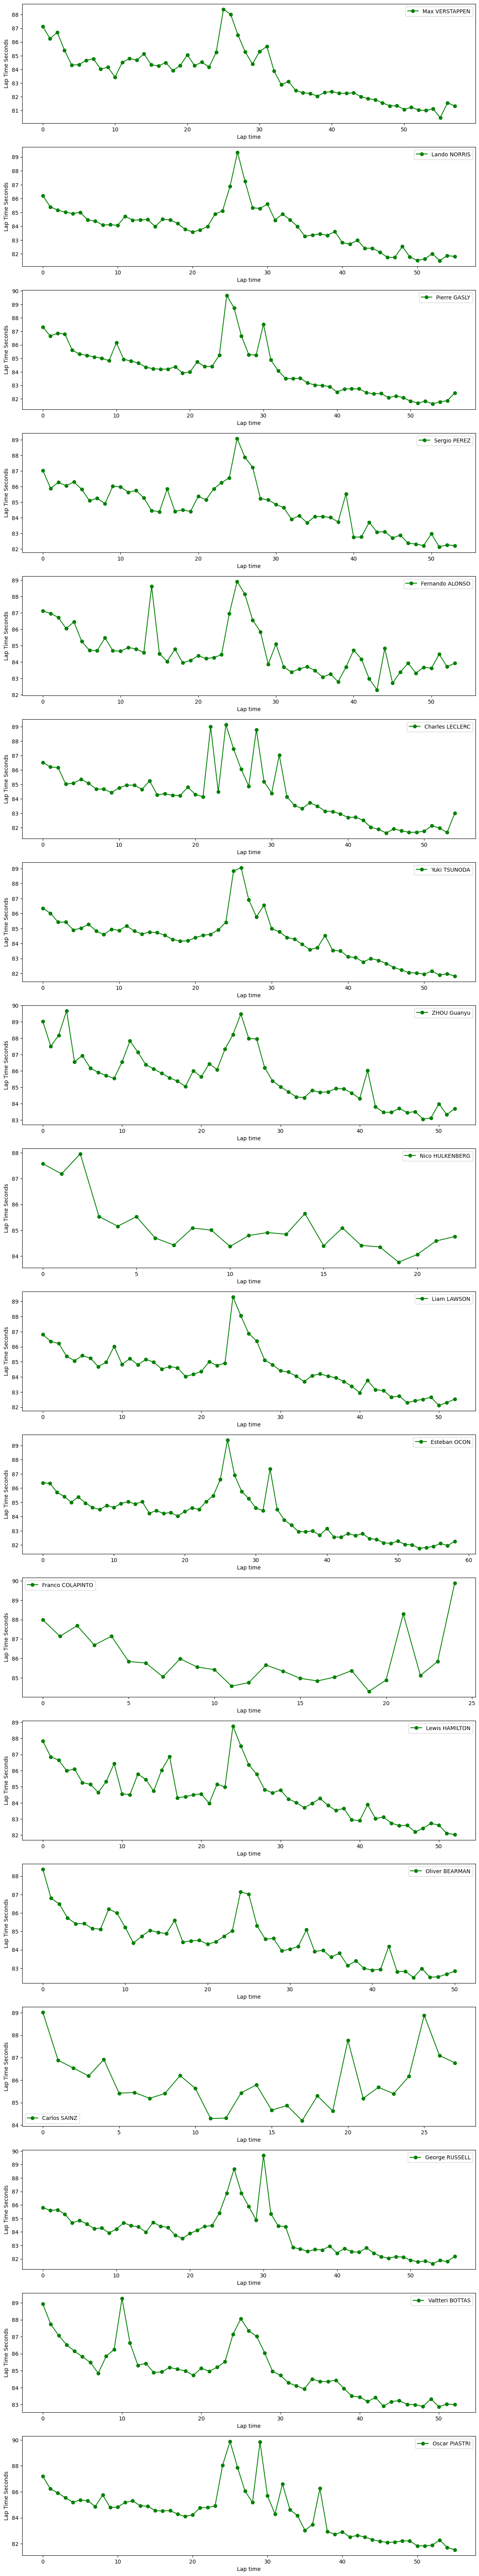

In [242]:
libraryDataF1.obtain_data_tyres(jointables,'INTERMEDIATE',90)

### Wet tyres


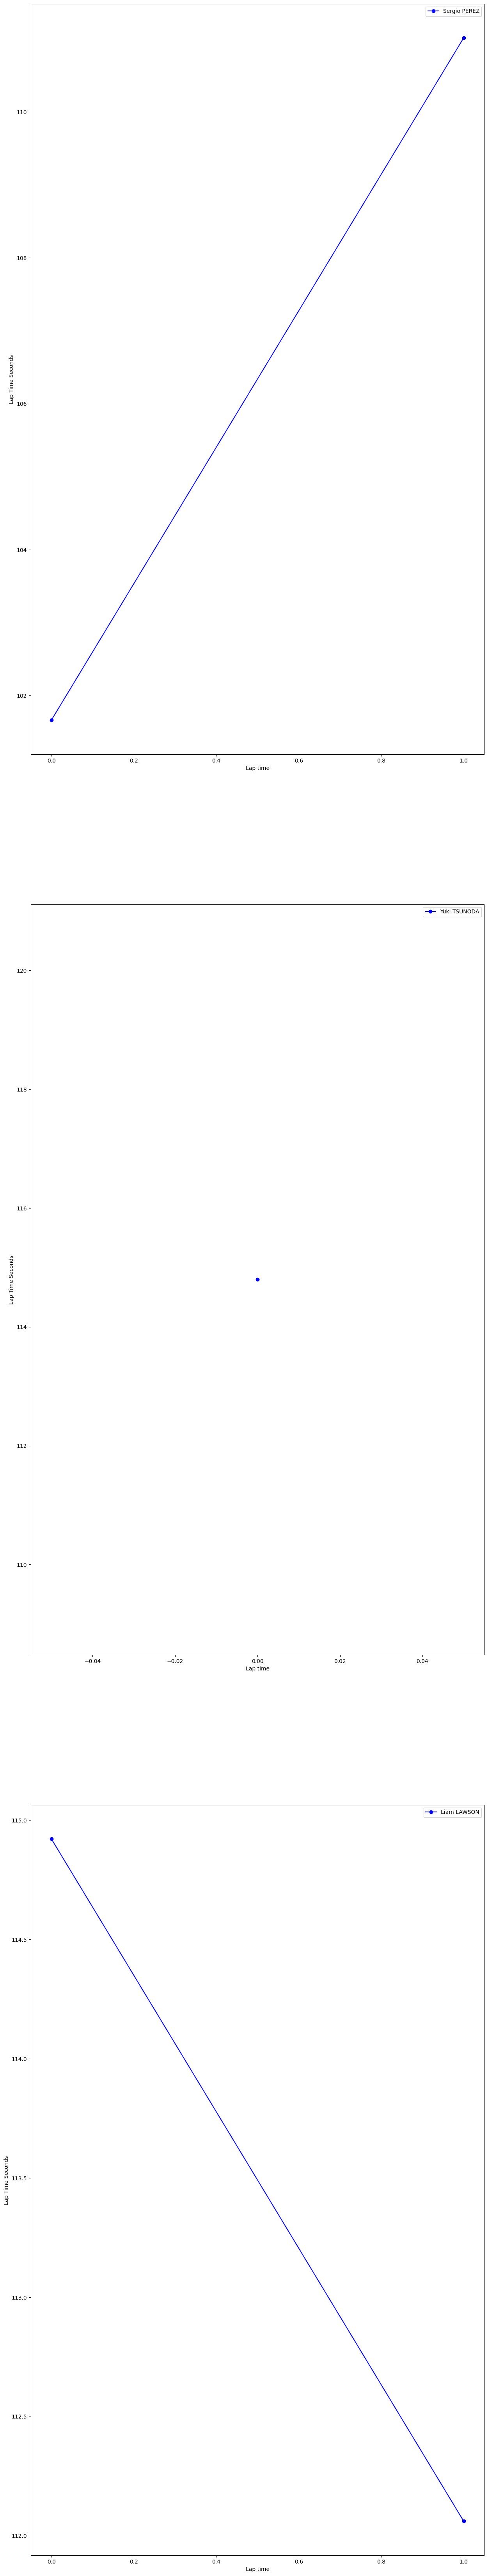

In [243]:
libraryDataF1.obtain_data_tyres(jointables,'WET',120)

### Speed trap

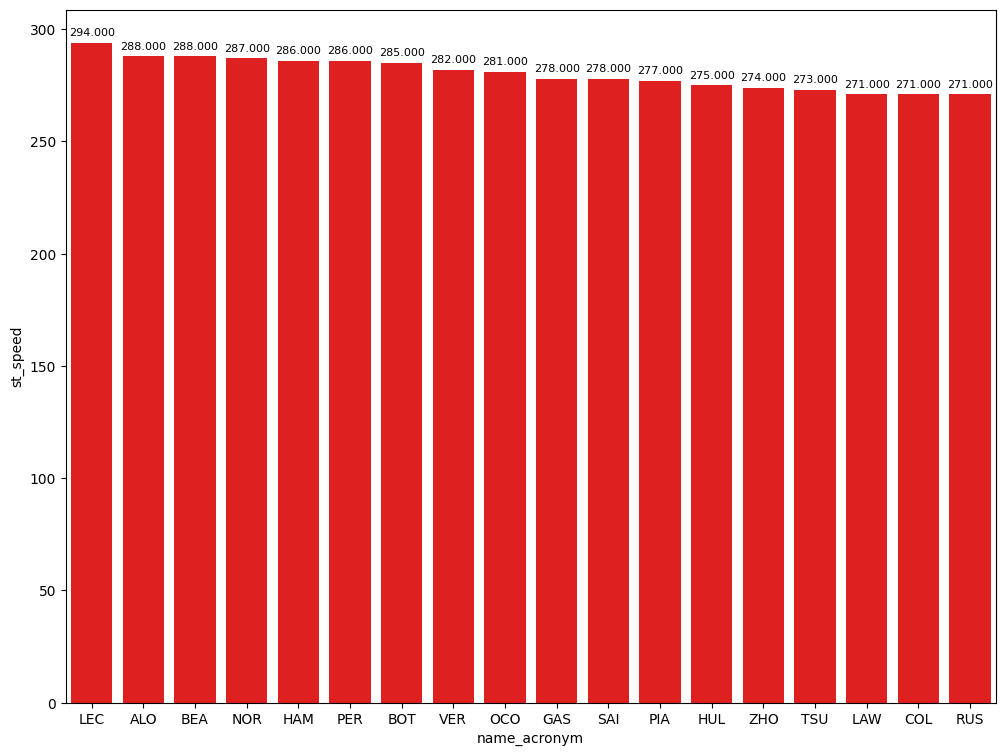

In [244]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

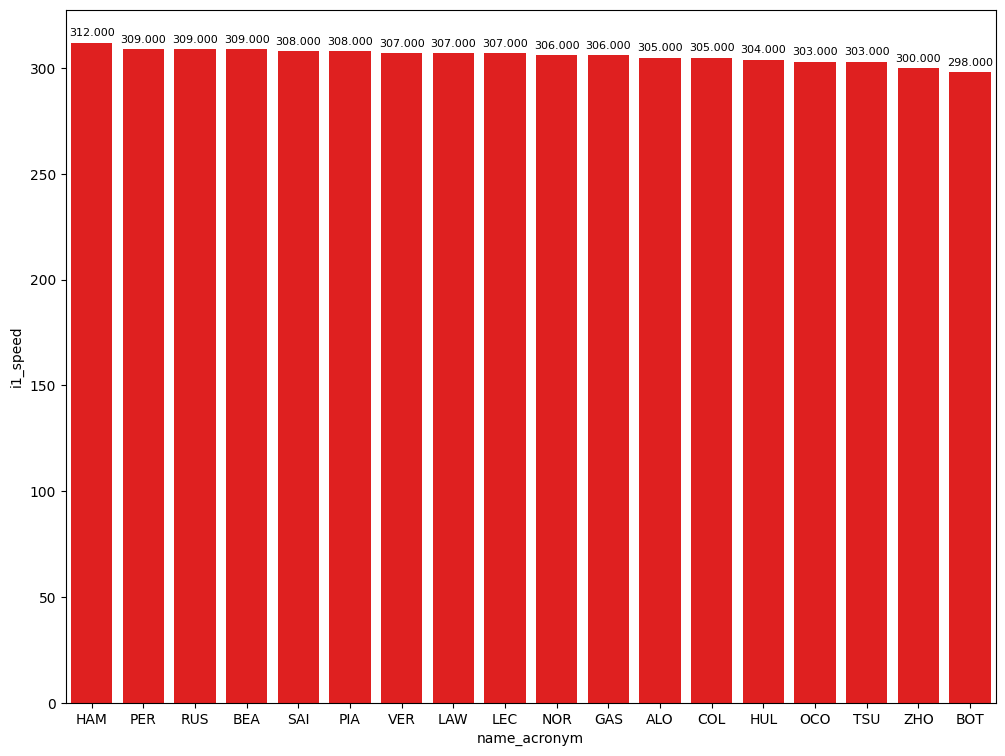

In [245]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

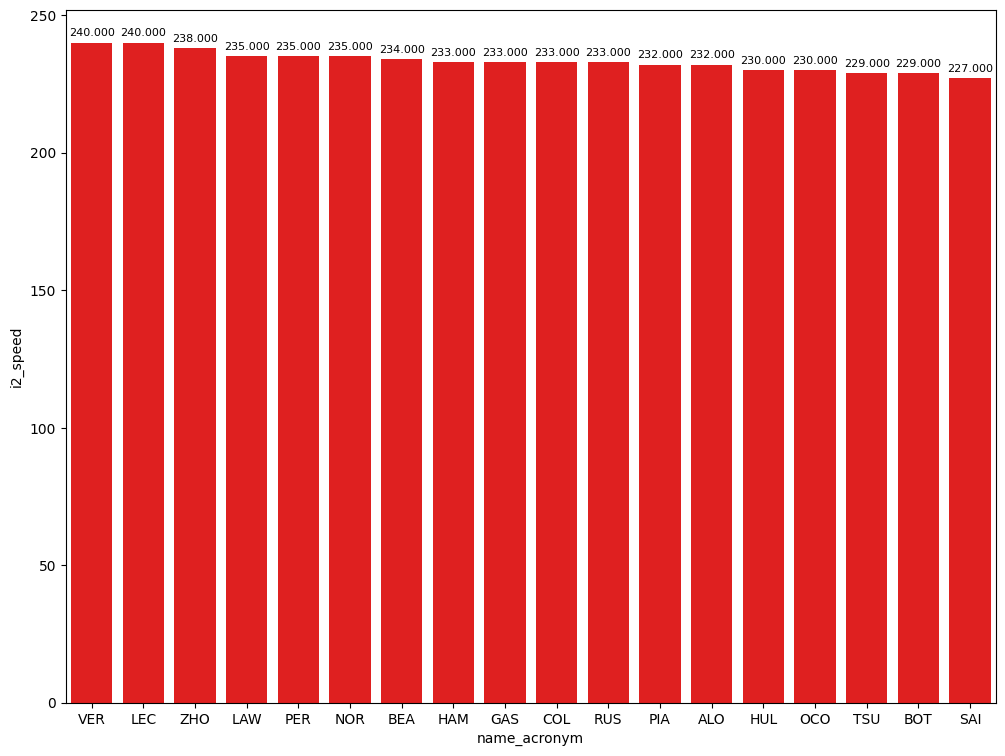

In [246]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Mean pace with the different compound used on the session

In [247]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >81 and lap_duration <=90").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound                  
INTERMEDIATE     84.528458

### Race pace

In [248]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >81 and lap_duration <=90").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
team_name                    
Mercedes            84.334733
McLaren             84.338534
Red Bull Racing     84.374928
RB                  84.473051
Alpine              84.592691
Haas F1 Team        84.766455
Aston Martin        84.836244
Ferrari             85.142172
Kick Sauber         85.520269
Williams            85.991500

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1

In [249]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >81 and lap_duration <=90").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

duration_sector_1
team_name                         
Red Bull Racing          21.451144
Alpine                   21.535173
Mercedes                 21.540942
RB                       21.555810
McLaren                  21.613114
Haas F1 Team             21.666945
Ferrari                  21.742362
Aston Martin             21.858822
Kick Sauber              21.871256
Williams                 21.896500

#### Sector 2

In [250]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >81 and lap_duration <=90").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

duration_sector_2
team_name                         
McLaren                  44.556920
Mercedes                 44.615326
Red Bull Racing          44.645680
Alpine                   44.697025
Aston Martin             44.701867
RB                       44.724456
Haas F1 Team             44.797345
Ferrari                  45.040190
Kick Sauber              45.088500
Williams                 45.549750

#### Sector 3

In [251]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False and lap_duration >81 and lap_duration <=90").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

duration_sector_3
team_name                         
McLaren                  18.168500
Mercedes                 18.178465
RB                       18.192785
Aston Martin             18.275556
Red Bull Racing          18.278103
Haas F1 Team             18.302164
Ferrari                  18.359621
Alpine                   18.360494
Williams                 18.545250
Kick Sauber              18.560513

### Comparaison beetween drivers


#### Red Bull Racing

In [252]:
race.query("driver_number== 1 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

83.74791071428571

In [253]:
race.query("driver_number== 11 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

84.69583333333333

#### Ferrari

In [254]:
race.query("driver_number== 16 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

84.23694545454546

In [255]:
race.query("driver_number== 55 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

85.90435714285715

#### McLaren

In [256]:
race.query("driver_number== 4 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

83.95353571428572

In [257]:
race.query("driver_number== 81 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

84.421875

#### Mercedes

In [258]:
race.query("driver_number== 44 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

84.56462264150942

In [259]:
race.query("driver_number== 63 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

83.93459649122806

#### Aston Martin

In [260]:
race.query("driver_number== 14 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

84.66879629629629

In [261]:
race.query("driver_number== 18 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

nan

#### Haas F1 Team

In [262]:
race.query("driver_number== 20 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

nan

In [263]:
race.query("driver_number== 27 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

85.13639130434782

#### RB

In [264]:
race.query("driver_number== 30 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

84.48545283018868

In [265]:
race.query("driver_number== 22 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

84.31514545454546

#### Williams

In [266]:
race.query("driver_number== 43 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

85.96120000000002

In [267]:
race.query("driver_number== 23 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

nan

#### Alpine

In [268]:
race.query("driver_number== 10 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

84.20512280701755

In [269]:
race.query("driver_number== 31 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

84.07394915254238

#### Kick Sauber

In [270]:
race.query("driver_number== 24 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

85.66128301886793

In [271]:
race.query("driver_number== 77 and lap_duration >81 and lap_duration <=90").lap_duration.mean()

85.00449056603775

### Race pace

In [272]:
MINIMUN_SECONDS = 81
MAXIMUM_SECONDS = 90

#### Red Bull Racing

In [273]:
stintInformation.query('driver_number == 1 or driver_number == 11')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
5          1249         9636             1             11          1       27   
16         1249         9636             1              1          1       32   
25         1249         9636             2             11         28       32   
40         1249         9636             2              1         33       70   
43         1249         9636             3             11         33       70   

        compound  tyre_age_at_start  
5   INTERMEDIATE                0.0  
16  INTERMEDIATE                0.0  
25           WET                5.0  
40  INTERMEDIATE                0.0  
43  INTERMEDIATE                0.0

In [274]:
libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name      compound                        date_start  \
18    Max VERSTAPPEN  INTERMEDIATE  2024-11-03T15:51:37.168000+00:00   
36    Max VERSTAPPEN  INTERMEDIATE  2024-11-03T15:53:04.168000+00:00   
54    Max VERSTAPPEN  INTERMEDIATE  2024-11-03T15:54:30.469000+00:00   
72    Max VERSTAPPEN  INTERMEDIATE  2024-11-03T15:55:57.190000+00:00   
90    Max VERSTAPPEN  INTERMEDIATE  2024-11-03T15:57:22.629000+00:00   
108   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T15:58:46.898000+00:00   
126   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:00:11.292000+00:00   
144   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:01:35.957000+00:00   
162   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:03:00.718000+00:00   
180   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:04:24.685000+00:00   
198   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:05:48.776000+00:00   
216   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:07:12.153000+00:00   
234   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:08:36.841000+00:00   
252   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:10:01.608000+00:00   
270   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:11:26.307000+00:00   
288   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:12:51.313000+00:00   
306   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:14:15.779000+00:00   
324   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:15:39.999000+00:00   
342   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:17:04.453000+00:00   
360   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:18:28.345000+00:00   
378   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:19:52.753000+00:00   
396   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:21:17.709000+00:00   
414   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:22:41.937000+00:00   
432   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:24:06.401000+00:00   
449   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:25:30.731000+00:00   
466   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T16:26:55.952000+00:00   
570   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:06:10.719000+00:00   
586   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:07:38.684000+00:00   
602   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:09:05.275000+00:00   
618   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:10:30.543000+00:00   
634   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:11:54.850000+00:00   
695   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:19:57.739000+00:00   
710   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:21:23.336000+00:00   
725   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:22:47.189000+00:00   
740   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:24:10.212000+00:00   
755   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:25:33.215000+00:00   
770   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:26:55.722000+00:00   
785   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:28:18.043000+00:00   
800   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:29:40.330000+00:00   
815   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:31:02.329000+00:00   
830   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:32:24.596000+00:00   
845   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:33:46.914000+00:00   
860   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:35:09.153000+00:00   
875   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:36:31.491000+00:00   
890   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:37:53.745000+00:00   
905   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:39:15.745000+00:00   
920   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:40:37.632000+00:00   
935   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:41:59.370000+00:00   
950   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:43:21.016000+00:00   
965   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:44:42.309000+00:00   
980   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:46:03.610000+00:00   
995   Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:47:24.672000+00:00   
1010  Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:48:46.019000+00:00   
1040  Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:51:27.873000+00:00   
1070  Max VERSTAPPEN  INTERMEDIATE  2024-11-03T17:5

In [275]:
libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name      compound                        date_start  \
21    Sergio PEREZ  INTERMEDIATE  2024-11-03T15:51:47.311000+00:00   
39    Sergio PEREZ  INTERMEDIATE  2024-11-03T15:53:14.431000+00:00   
57    Sergio PEREZ  INTERMEDIATE  2024-11-03T15:54:40.228000+00:00   
75    Sergio PEREZ  INTERMEDIATE  2024-11-03T15:56:06.508000+00:00   
93    Sergio PEREZ  INTERMEDIATE  2024-11-03T15:57:32.629000+00:00   
111   Sergio PEREZ  INTERMEDIATE  2024-11-03T15:58:58.967000+00:00   
129   Sergio PEREZ  INTERMEDIATE  2024-11-03T16:00:24.723000+00:00   
147   Sergio PEREZ  INTERMEDIATE  2024-11-03T16:01:49.849000+00:00   
165   Sergio PEREZ  INTERMEDIATE  2024-11-03T16:03:15.095000+00:00   
183   Sergio PEREZ  INTERMEDIATE  2024-11-03T16:04:40.113000+00:00   
201   Sergio PEREZ  INTERMEDIATE  2024-11-03T16:06:06.005000+00:00   
219   Sergio PEREZ  INTERMEDIATE  2024-11-03T16:07:31.936000+00:00   
237   Sergio PEREZ  INTERMEDIATE  2024-11-03T16:08:57.728000+00:00   
255   Sergio PEREZ  INTERMEDIATE  2024-11-03T16:10:23.418000+00:00   
273   Sergio PEREZ  INTERMEDIATE  2024-11-03T16:11:48.766000+00:00   
291   Sergio PEREZ  INTERMEDIATE  2024-11-03T16:13:13.143000+00:00   
309   Sergio PEREZ  INTERMEDIATE  2024-11-03T16:14:37.557000+00:00   
327   Sergio PEREZ  INTERMEDIATE  2024-11-03T16:16:03.444000+00:00   
345   Sergio PEREZ  INTERMEDIATE  2024-11-03T16:17:27.778000+00:00   
363   Sergio PEREZ  INTERMEDIATE  2024-11-03T16:18:52.373000+00:00   
381   Sergio PEREZ  INTERMEDIATE  2024-11-03T16:20:16.781000+00:00   
399   Sergio PEREZ  INTERMEDIATE  2024-11-03T16:21:42.181000+00:00   
417   Sergio PEREZ  INTERMEDIATE  2024-11-03T16:23:07.309000+00:00   
435   Sergio PEREZ  INTERMEDIATE  2024-11-03T16:24:33.139000+00:00   
452   Sergio PEREZ  INTERMEDIATE  2024-11-03T16:25:59.415000+00:00   
589   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:07:57.667000+00:00   
605   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:09:26.702000+00:00   
621   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:10:54.654000+00:00   
713   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:21:33.205000+00:00   
728   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:22:58.469000+00:00   
743   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:24:23.583000+00:00   
758   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:25:48.490000+00:00   
773   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:27:13.191000+00:00   
788   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:28:37.098000+00:00   
803   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:30:01.380000+00:00   
818   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:31:24.797000+00:00   
833   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:32:48.952000+00:00   
848   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:34:13.005000+00:00   
863   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:35:37.134000+00:00   
878   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:37:00.834000+00:00   
893   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:38:26.389000+00:00   
908   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:39:49.091000+00:00   
923   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:41:11.935000+00:00   
938   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:42:35.547000+00:00   
953   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:43:58.672000+00:00   
968   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:45:21.725000+00:00   
983   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:46:44.490000+00:00   
998   Sergio PEREZ  INTERMEDIATE  2024-11-03T17:48:07.411000+00:00   
1013  Sergio PEREZ  INTERMEDIATE  2024-11-03T17:49:29.765000+00:00   
1028  Sergio PEREZ  INTERMEDIATE  2024-11-03T17:50:52.133000+00:00   
1043  Sergio PEREZ  INTERMEDIATE  2024-11-03T17:52:14.281000+00:00   
1058  Sergio PEREZ  INTERMEDIATE  2024-11-03T17:53:37.274000+00:00   
1073  Sergio PEREZ  INTERMEDIATE  2024-11-03T17:54:59.393000+00:00   
1088  Sergio PEREZ  INTERMEDIATE  2024-11-03T17:56:21.748000+00:00   

      lap_number  duration_sector_1  duration_sector_2  duration_sector_3  \
21             2             22.553             45.803             18.691   
39  

#### Ferrari

In [276]:
stintInformation.query('driver_number == 16 or driver_number == 55')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
2          1249         9636             1             16          1       25   
10         1249         9636             1             55          1       27   
20         1249         9636             2             16         25       32   
29         1249         9636             2             55         28       32   
39         1249         9636             3             55         33       39   
45         1249         9636             3             16         33       70   

        compound  tyre_age_at_start  
2   INTERMEDIATE                2.0  
10  INTERMEDIATE                0.0  
20  INTERMEDIATE                3.0  
29  INTERMEDIATE                0.0  
39  INTERMEDIATE                0.0  
45  INTERMEDIATE                3.0

In [277]:
libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name      compound                        date_start  \
23    Charles LECLERC  INTERMEDIATE  2024-11-03T15:51:32.846000+00:00   
41    Charles LECLERC  INTERMEDIATE  2024-11-03T15:52:59.365000+00:00   
59    Charles LECLERC  INTERMEDIATE  2024-11-03T15:54:25.595000+00:00   
77    Charles LECLERC  INTERMEDIATE  2024-11-03T15:55:51.787000+00:00   
95    Charles LECLERC  INTERMEDIATE  2024-11-03T15:57:16.905000+00:00   
113   Charles LECLERC  INTERMEDIATE  2024-11-03T15:58:41.862000+00:00   
131   Charles LECLERC  INTERMEDIATE  2024-11-03T16:00:07.368000+00:00   
149   Charles LECLERC  INTERMEDIATE  2024-11-03T16:01:32.430000+00:00   
167   Charles LECLERC  INTERMEDIATE  2024-11-03T16:02:57.028000+00:00   
185   Charles LECLERC  INTERMEDIATE  2024-11-03T16:04:21.711000+00:00   
203   Charles LECLERC  INTERMEDIATE  2024-11-03T16:05:46.125000+00:00   
221   Charles LECLERC  INTERMEDIATE  2024-11-03T16:07:10.950000+00:00   
239   Charles LECLERC  INTERMEDIATE  2024-11-03T16:08:35.859000+00:00   
257   Charles LECLERC  INTERMEDIATE  2024-11-03T16:10:00.800000+00:00   
275   Charles LECLERC  INTERMEDIATE  2024-11-03T16:11:25.471000+00:00   
293   Charles LECLERC  INTERMEDIATE  2024-11-03T16:12:50.726000+00:00   
311   Charles LECLERC  INTERMEDIATE  2024-11-03T16:14:14.919000+00:00   
329   Charles LECLERC  INTERMEDIATE  2024-11-03T16:15:39.352000+00:00   
347   Charles LECLERC  INTERMEDIATE  2024-11-03T16:17:03.507000+00:00   
365   Charles LECLERC  INTERMEDIATE  2024-11-03T16:18:27.778000+00:00   
383   Charles LECLERC  INTERMEDIATE  2024-11-03T16:19:52.711000+00:00   
401   Charles LECLERC  INTERMEDIATE  2024-11-03T16:21:16.857000+00:00   
419   Charles LECLERC  INTERMEDIATE  2024-11-03T16:22:41.053000+00:00   
454   Charles LECLERC  INTERMEDIATE  2024-11-03T16:25:55.068000+00:00   
575   Charles LECLERC  INTERMEDIATE  2024-11-03T17:06:19.682000+00:00   
591   Charles LECLERC  INTERMEDIATE  2024-11-03T17:07:48.801000+00:00   
607   Charles LECLERC  INTERMEDIATE  2024-11-03T17:09:16.333000+00:00   
623   Charles LECLERC  INTERMEDIATE  2024-11-03T17:10:42.510000+00:00   
700   Charles LECLERC  INTERMEDIATE  2024-11-03T17:19:59.160000+00:00   
715   Charles LECLERC  INTERMEDIATE  2024-11-03T17:21:27.489000+00:00   
730   Charles LECLERC  INTERMEDIATE  2024-11-03T17:22:52.644000+00:00   
745   Charles LECLERC  INTERMEDIATE  2024-11-03T17:24:17.046000+00:00   
760   Charles LECLERC  INTERMEDIATE  2024-11-03T17:25:44.041000+00:00   
775   Charles LECLERC  INTERMEDIATE  2024-11-03T17:27:08.195000+00:00   
790   Charles LECLERC  INTERMEDIATE  2024-11-03T17:28:31.742000+00:00   
805   Charles LECLERC  INTERMEDIATE  2024-11-03T17:29:55.122000+00:00   
820   Charles LECLERC  INTERMEDIATE  2024-11-03T17:31:18.768000+00:00   
835   Charles LECLERC  INTERMEDIATE  2024-11-03T17:32:42.333000+00:00   
850   Charles LECLERC  INTERMEDIATE  2024-11-03T17:34:05.469000+00:00   
865   Charles LECLERC  INTERMEDIATE  2024-11-03T17:35:28.586000+00:00   
880   Charles LECLERC  INTERMEDIATE  2024-11-03T17:36:51.427000+00:00   
895   Charles LECLERC  INTERMEDIATE  2024-11-03T17:38:14.289000+00:00   
910   Charles LECLERC  INTERMEDIATE  2024-11-03T17:39:37.013000+00:00   
925   Charles LECLERC  INTERMEDIATE  2024-11-03T17:40:59.509000+00:00   
940   Charles LECLERC  INTERMEDIATE  2024-11-03T17:42:21.432000+00:00   
955   Charles LECLERC  INTERMEDIATE  2024-11-03T17:43:43.319000+00:00   
970   Charles LECLERC  INTERMEDIATE  2024-11-03T17:45:04.950000+00:00   
985   Charles LECLERC  INTERMEDIATE  2024-11-03T17:46:26.934000+00:00   
1000  Charles LECLERC  INTERMEDIATE  2024-11-03T17:47:48.746000+00:00   
1015  Charles LECLERC  INTERMEDIATE  2024-11-03T17:49:10.394000+00:00   
1030  Charles LECLERC  INTERMEDIATE  2024-11-03T17:50:32.020000+00:00   
1045  Charles LECLERC  INTERMEDIATE  2024-11-03T17:51:53.875000+00:00   
1060  Charles LECLERC  INTERMEDIATE  2024-11-03T17:53:16.016000+00:00   
1075  Charles LECLERC  INTERMEDIATE  2024-11-03T17:54:37.944000+00:00 

In [278]:
libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name      compound                        date_start  lap_number  \
32   Carlos SAINZ  INTERMEDIATE  2024-11-03T15:51:41.246000+00:00           2   
50   Carlos SAINZ  INTERMEDIATE  2024-11-03T15:53:10.480000+00:00           3   
68   Carlos SAINZ  INTERMEDIATE  2024-11-03T15:54:37.301000+00:00           4   
86   Carlos SAINZ  INTERMEDIATE  2024-11-03T15:56:03.772000+00:00           5   
104  Carlos SAINZ  INTERMEDIATE  2024-11-03T15:57:30.140000+00:00           6   
122  Carlos SAINZ  INTERMEDIATE  2024-11-03T15:58:56.904000+00:00           7   
140  Carlos SAINZ  INTERMEDIATE  2024-11-03T16:00:22.310000+00:00           8   
158  Carlos SAINZ  INTERMEDIATE  2024-11-03T16:01:47.898000+00:00           9   
176  Carlos SAINZ  INTERMEDIATE  2024-11-03T16:03:13.054000+00:00          10   
194  Carlos SAINZ  INTERMEDIATE  2024-11-03T16:04:38.316000+00:00          11   
212  Carlos SAINZ  INTERMEDIATE  2024-11-03T16:06:04.595000+00:00          12   
230  Carlos SAINZ  INTERMEDIATE  2024-11-03T16:07:30.150000+00:00          13   
248  Carlos SAINZ  INTERMEDIATE  2024-11-03T16:08:54.513000+00:00          14   
266  Carlos SAINZ  INTERMEDIATE  2024-11-03T16:10:18.796000+00:00          15   
284  Carlos SAINZ  INTERMEDIATE  2024-11-03T16:11:44.251000+00:00          16   
302  Carlos SAINZ  INTERMEDIATE  2024-11-03T16:13:10.197000+00:00          17   
320  Carlos SAINZ  INTERMEDIATE  2024-11-03T16:14:34.726000+00:00          18   
338  Carlos SAINZ  INTERMEDIATE  2024-11-03T16:15:59.572000+00:00          19   
356  Carlos SAINZ  INTERMEDIATE  2024-11-03T16:17:23.823000+00:00          20   
374  Carlos SAINZ  INTERMEDIATE  2024-11-03T16:18:49.206000+00:00          21   
392  Carlos SAINZ  INTERMEDIATE  2024-11-03T16:20:13.691000+00:00          22   
410  Carlos SAINZ  INTERMEDIATE  2024-11-03T16:21:41.573000+00:00          23   
428  Carlos SAINZ  INTERMEDIATE  2024-11-03T16:23:06.728000+00:00          24   
445  Carlos SAINZ  INTERMEDIATE  2024-11-03T16:24:32.455000+00:00          25   
462  Carlos SAINZ  INTERMEDIATE  2024-11-03T16:25:57.832000+00:00          26   
598  Carlos SAINZ  INTERMEDIATE  2024-11-03T17:07:59.377000+00:00          36   
614  Carlos SAINZ  INTERMEDIATE  2024-11-03T17:09:28.307000+00:00          37   
630  Carlos SAINZ  INTERMEDIATE  2024-11-03T17:10:55.465000+00:00          38   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
32              22.675             47.652             18.694        89.021  
50              22.328             46.065             18.491        86.884  
68              22.224             45.736             18.580        86.540  
86              22.010             45.612             18.563        86.185  
104             22.391             45.761             18.763        86.915  
122             21.501             45.601             18.317        85.419  
140             21.533             45.615             18.306        85.454  
158             21.698             45.111             18.382        85.191  
176             21.744             45.196             18.466        85.406  
194             22.180             45.314             18.709        86.203  
212             22.307             44.969             18.357        85.633  
230             21.234             44.775             18.284        84.293  
248             21.365             44.635             18.312        84.312  
266             21.777             45.185             18.472        85.434  
284             22.082             45.165             18.545        85.792  
302             21.604             44.641             18.422        84.667  
320             21.653             44.795             18.426        84.874  
338             21.465             44.358             18.378        84.201  
356             22.101             44.965             18.235        85.301  
374             21.807             44.435             18.389        84.631  
392             21.397             48.174

#### Mercedes

In [279]:
stintInformation.query('driver_number == 44 or driver_number == 63')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
8          1249         9636             1             44          1       27   
15         1249         9636             1             63          1       28   
27         1249         9636             2             44         28       32   
35         1249         9636             2             63         29       32   
50         1249         9636             3             44         33       70   
52         1249         9636             3             63         33       70   

        compound  tyre_age_at_start  
8   INTERMEDIATE                0.0  
15  INTERMEDIATE                3.0  
27  INTERMEDIATE                0.0  
35  INTERMEDIATE                3.0  
50  INTERMEDIATE                0.0  
52  INTERMEDIATE                3.0

In [280]:
libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name      compound                        date_start  \
30    Lewis HAMILTON  INTERMEDIATE  2024-11-03T15:51:36.828000+00:00   
48    Lewis HAMILTON  INTERMEDIATE  2024-11-03T15:53:04.623000+00:00   
66    Lewis HAMILTON  INTERMEDIATE  2024-11-03T15:54:31.590000+00:00   
84    Lewis HAMILTON  INTERMEDIATE  2024-11-03T15:55:58.179000+00:00   
102   Lewis HAMILTON  INTERMEDIATE  2024-11-03T15:57:24.094000+00:00   
120   Lewis HAMILTON  INTERMEDIATE  2024-11-03T15:58:50.310000+00:00   
138   Lewis HAMILTON  INTERMEDIATE  2024-11-03T16:00:15.497000+00:00   
156   Lewis HAMILTON  INTERMEDIATE  2024-11-03T16:01:40.624000+00:00   
174   Lewis HAMILTON  INTERMEDIATE  2024-11-03T16:03:05.251000+00:00   
210   Lewis HAMILTON  INTERMEDIATE  2024-11-03T16:06:02.597000+00:00   
228   Lewis HAMILTON  INTERMEDIATE  2024-11-03T16:07:28.890000+00:00   
246   Lewis HAMILTON  INTERMEDIATE  2024-11-03T16:08:53.515000+00:00   
264   Lewis HAMILTON  INTERMEDIATE  2024-11-03T16:10:18.072000+00:00   
282   Lewis HAMILTON  INTERMEDIATE  2024-11-03T16:11:43.740000+00:00   
300   Lewis HAMILTON  INTERMEDIATE  2024-11-03T16:13:09.329000+00:00   
318   Lewis HAMILTON  INTERMEDIATE  2024-11-03T16:14:33.972000+00:00   
336   Lewis HAMILTON  INTERMEDIATE  2024-11-03T16:16:00.014000+00:00   
354   Lewis HAMILTON  INTERMEDIATE  2024-11-03T16:17:26.830000+00:00   
372   Lewis HAMILTON  INTERMEDIATE  2024-11-03T16:18:51.196000+00:00   
390   Lewis HAMILTON  INTERMEDIATE  2024-11-03T16:20:15.575000+00:00   
408   Lewis HAMILTON  INTERMEDIATE  2024-11-03T16:21:39.931000+00:00   
426   Lewis HAMILTON  INTERMEDIATE  2024-11-03T16:23:04.674000+00:00   
443   Lewis HAMILTON  INTERMEDIATE  2024-11-03T16:24:28.655000+00:00   
460   Lewis HAMILTON  INTERMEDIATE  2024-11-03T16:25:53.800000+00:00   
596   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:07:54.610000+00:00   
612   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:09:23.465000+00:00   
628   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:10:50.989000+00:00   
720   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:21:34.006000+00:00   
735   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:22:59.714000+00:00   
750   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:24:24.610000+00:00   
765   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:25:49.133000+00:00   
780   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:27:14.050000+00:00   
795   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:28:38.168000+00:00   
810   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:30:02.189000+00:00   
825   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:31:25.988000+00:00   
840   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:32:49.929000+00:00   
855   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:34:14.106000+00:00   
870   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:35:38.047000+00:00   
885   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:37:01.569000+00:00   
900   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:38:25.189000+00:00   
915   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:39:48.133000+00:00   
930   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:41:10.997000+00:00   
945   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:42:34.939000+00:00   
960   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:43:57.906000+00:00   
975   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:45:21.101000+00:00   
990   Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:46:43.933000+00:00   
1005  Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:48:06.380000+00:00   
1020  Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:49:29.060000+00:00   
1035  Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:50:51.228000+00:00   
1050  Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:52:13.675000+00:00   
1065  Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:53:36.393000+00:00   
1080  Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:54:59.074000+00:00   
1095  Lewis HAMILTON  INTERMEDIATE  2024-11-03T17:56:21.177000+00:00   

      lap_number  duration_sector_1  duration_sector_2  duration_sector_3  \
30             2             22.928          

In [281]:
libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name      compound                        date_start  \
33    George RUSSELL  INTERMEDIATE  2024-11-03T15:51:28.489000+00:00   
51    George RUSSELL  INTERMEDIATE  2024-11-03T15:52:54.148000+00:00   
69    George RUSSELL  INTERMEDIATE  2024-11-03T15:54:19.936000+00:00   
87    George RUSSELL  INTERMEDIATE  2024-11-03T15:55:45.478000+00:00   
105   George RUSSELL  INTERMEDIATE  2024-11-03T15:57:10.842000+00:00   
123   George RUSSELL  INTERMEDIATE  2024-11-03T15:58:35.448000+00:00   
141   George RUSSELL  INTERMEDIATE  2024-11-03T16:00:00.349000+00:00   
159   George RUSSELL  INTERMEDIATE  2024-11-03T16:01:24.972000+00:00   
177   George RUSSELL  INTERMEDIATE  2024-11-03T16:02:49.211000+00:00   
195   George RUSSELL  INTERMEDIATE  2024-11-03T16:04:13.502000+00:00   
213   George RUSSELL  INTERMEDIATE  2024-11-03T16:05:37.528000+00:00   
231   George RUSSELL  INTERMEDIATE  2024-11-03T16:07:01.581000+00:00   
249   George RUSSELL  INTERMEDIATE  2024-11-03T16:08:26.362000+00:00   
267   George RUSSELL  INTERMEDIATE  2024-11-03T16:09:50.712000+00:00   
285   George RUSSELL  INTERMEDIATE  2024-11-03T16:11:15.040000+00:00   
303   George RUSSELL  INTERMEDIATE  2024-11-03T16:12:39.100000+00:00   
321   George RUSSELL  INTERMEDIATE  2024-11-03T16:14:03.913000+00:00   
339   George RUSSELL  INTERMEDIATE  2024-11-03T16:15:28.272000+00:00   
357   George RUSSELL  INTERMEDIATE  2024-11-03T16:16:52.653000+00:00   
375   George RUSSELL  INTERMEDIATE  2024-11-03T16:18:16.408000+00:00   
393   George RUSSELL  INTERMEDIATE  2024-11-03T16:19:39.852000+00:00   
411   George RUSSELL  INTERMEDIATE  2024-11-03T16:21:03.832000+00:00   
429   George RUSSELL  INTERMEDIATE  2024-11-03T16:22:27.914000+00:00   
446   George RUSSELL  INTERMEDIATE  2024-11-03T16:23:52.332000+00:00   
463   George RUSSELL  INTERMEDIATE  2024-11-03T16:25:16.720000+00:00   
480   George RUSSELL  INTERMEDIATE  2024-11-03T16:26:42.161000+00:00   
583   George RUSSELL  INTERMEDIATE  2024-11-03T17:06:16.739000+00:00   
599   George RUSSELL  INTERMEDIATE  2024-11-03T17:07:45.411000+00:00   
615   George RUSSELL  INTERMEDIATE  2024-11-03T17:09:12.349000+00:00   
631   George RUSSELL  INTERMEDIATE  2024-11-03T17:10:38.200000+00:00   
707   George RUSSELL  INTERMEDIATE  2024-11-03T17:19:58.426000+00:00   
722   George RUSSELL  INTERMEDIATE  2024-11-03T17:21:28.014000+00:00   
737   George RUSSELL  INTERMEDIATE  2024-11-03T17:22:53.354000+00:00   
752   George RUSSELL  INTERMEDIATE  2024-11-03T17:24:17.816000+00:00   
767   George RUSSELL  INTERMEDIATE  2024-11-03T17:25:42.091000+00:00   
782   George RUSSELL  INTERMEDIATE  2024-11-03T17:27:04.951000+00:00   
797   George RUSSELL  INTERMEDIATE  2024-11-03T17:28:27.810000+00:00   
812   George RUSSELL  INTERMEDIATE  2024-11-03T17:29:50.217000+00:00   
827   George RUSSELL  INTERMEDIATE  2024-11-03T17:31:12.987000+00:00   
842   George RUSSELL  INTERMEDIATE  2024-11-03T17:32:35.648000+00:00   
857   George RUSSELL  INTERMEDIATE  2024-11-03T17:33:58.629000+00:00   
872   George RUSSELL  INTERMEDIATE  2024-11-03T17:35:20.973000+00:00   
887   George RUSSELL  INTERMEDIATE  2024-11-03T17:36:43.827000+00:00   
902   George RUSSELL  INTERMEDIATE  2024-11-03T17:38:06.330000+00:00   
917   George RUSSELL  INTERMEDIATE  2024-11-03T17:39:28.805000+00:00   
932   George RUSSELL  INTERMEDIATE  2024-11-03T17:40:51.600000+00:00   
947   George RUSSELL  INTERMEDIATE  2024-11-03T17:42:14.101000+00:00   
962   George RUSSELL  INTERMEDIATE  2024-11-03T17:43:36.292000+00:00   
977   George RUSSELL  INTERMEDIATE  2024-11-03T17:44:58.332000+00:00   
992   George RUSSELL  INTERMEDIATE  2024-11-03T17:46:20.464000+00:00   
1007  George RUSSELL  INTERMEDIATE  2024-11-03T17:47:42.672000+00:00   
1022  George RUSSELL  INTERMEDIATE  2024-11-03T17:49:04.509000+00:00   
1037  George RUSSELL  INTERMEDIATE  2024-11-03T17:50:26.392000+00:00   
1052  George RUSSELL  INTERMEDIATE  2024-11-03T17:51:48.152000+00:00   
1067  George RUSSELL  INTERMEDIATE  2024-11-03T17:5

#### Aston Martin

In [282]:
stintInformation.query('driver_number == 14 or driver_number == 18')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1249         9636             1             18          1        1   
6          1249         9636             1             14          1       27   
26         1249         9636             2             14         28       32   
44         1249         9636             3             14         33       70   

        compound  tyre_age_at_start  
0   INTERMEDIATE                0.0  
6   INTERMEDIATE                0.0  
26  INTERMEDIATE                3.0  
44  INTERMEDIATE                0.0

In [283]:
libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name      compound                        date_start  \
22    Fernando ALONSO  INTERMEDIATE  2024-11-03T15:51:35.301000+00:00   
40    Fernando ALONSO  INTERMEDIATE  2024-11-03T15:53:02.367000+00:00   
58    Fernando ALONSO  INTERMEDIATE  2024-11-03T15:54:29.426000+00:00   
76    Fernando ALONSO  INTERMEDIATE  2024-11-03T15:55:56.148000+00:00   
94    Fernando ALONSO  INTERMEDIATE  2024-11-03T15:57:22.209000+00:00   
112   Fernando ALONSO  INTERMEDIATE  2024-11-03T15:58:48.604000+00:00   
130   Fernando ALONSO  INTERMEDIATE  2024-11-03T16:00:13.810000+00:00   
148   Fernando ALONSO  INTERMEDIATE  2024-11-03T16:01:38.549000+00:00   
166   Fernando ALONSO  INTERMEDIATE  2024-11-03T16:03:03.314000+00:00   
184   Fernando ALONSO  INTERMEDIATE  2024-11-03T16:04:28.716000+00:00   
202   Fernando ALONSO  INTERMEDIATE  2024-11-03T16:05:53.416000+00:00   
220   Fernando ALONSO  INTERMEDIATE  2024-11-03T16:07:18.013000+00:00   
238   Fernando ALONSO  INTERMEDIATE  2024-11-03T16:08:42.976000+00:00   
256   Fernando ALONSO  INTERMEDIATE  2024-11-03T16:10:07.674000+00:00   
274   Fernando ALONSO  INTERMEDIATE  2024-11-03T16:11:32.367000+00:00   
292   Fernando ALONSO  INTERMEDIATE  2024-11-03T16:13:01.036000+00:00   
310   Fernando ALONSO  INTERMEDIATE  2024-11-03T16:14:25.425000+00:00   
328   Fernando ALONSO  INTERMEDIATE  2024-11-03T16:15:49.453000+00:00   
346   Fernando ALONSO  INTERMEDIATE  2024-11-03T16:17:14.206000+00:00   
364   Fernando ALONSO  INTERMEDIATE  2024-11-03T16:18:38.235000+00:00   
382   Fernando ALONSO  INTERMEDIATE  2024-11-03T16:20:02.314000+00:00   
400   Fernando ALONSO  INTERMEDIATE  2024-11-03T16:21:26.666000+00:00   
418   Fernando ALONSO  INTERMEDIATE  2024-11-03T16:22:50.909000+00:00   
436   Fernando ALONSO  INTERMEDIATE  2024-11-03T16:24:15.137000+00:00   
453   Fernando ALONSO  INTERMEDIATE  2024-11-03T16:25:39.555000+00:00   
590   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:07:56.001000+00:00   
606   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:09:24.965000+00:00   
622   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:10:53.046000+00:00   
714   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:21:53.272000+00:00   
729   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:23:19.110000+00:00   
744   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:24:42.891000+00:00   
759   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:26:08.087000+00:00   
774   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:27:31.670000+00:00   
789   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:28:55.133000+00:00   
804   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:30:18.707000+00:00   
819   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:31:42.384000+00:00   
834   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:33:06.513000+00:00   
849   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:34:28.938000+00:00   
864   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:35:52.170000+00:00   
879   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:37:15.047000+00:00   
894   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:38:38.622000+00:00   
909   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:40:03.492000+00:00   
924   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:41:27.590000+00:00   
939   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:42:50.455000+00:00   
954   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:44:12.855000+00:00   
969   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:45:37.672000+00:00   
984   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:47:00.674000+00:00   
999   Fernando ALONSO  INTERMEDIATE  2024-11-03T17:48:23.737000+00:00   
1014  Fernando ALONSO  INTERMEDIATE  2024-11-03T17:49:47.798000+00:00   
1029  Fernando ALONSO  INTERMEDIATE  2024-11-03T17:51:11.091000+00:00   
1044  Fernando ALONSO  INTERMEDIATE  2024-11-03T17:52:34.649000+00:00   
1059  Fernando ALONSO  INTERMEDIATE  2024-11-03T17:53:58.358000+00:00   
1074  Fernando ALONSO  INTERMEDIATE  2024-11-03T17:55:22.812000+00:00   
1089  Fernando ALONSO  INTERMEDIATE  2024-11-03T17:56:46.594000+00:00 

In [284]:
libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

#### McLaren

In [285]:
stintInformation.query('driver_number == 4 or driver_number == 81')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
11         1249         9636             1             81          1       27   
12         1249         9636             1              4          1       28   
30         1249         9636             2             81         28       32   
32         1249         9636             2              4         29       32   
41         1249         9636             3              4         33       70   
54         1249         9636             3             81         33       70   

        compound  tyre_age_at_start  
11  INTERMEDIATE                2.0  
12  INTERMEDIATE                4.0  
30  INTERMEDIATE                4.0  
32  INTERMEDIATE                4.0  
41  INTERMEDIATE                4.0  
54  INTERMEDIATE                0.0

In [286]:
libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name      compound                        date_start  \
19    Lando NORRIS  INTERMEDIATE  2024-11-03T15:51:29.732000+00:00   
37    Lando NORRIS  INTERMEDIATE  2024-11-03T15:52:56.089000+00:00   
55    Lando NORRIS  INTERMEDIATE  2024-11-03T15:54:21.452000+00:00   
73    Lando NORRIS  INTERMEDIATE  2024-11-03T15:55:46.582000+00:00   
91    Lando NORRIS  INTERMEDIATE  2024-11-03T15:57:11.528000+00:00   
109   Lando NORRIS  INTERMEDIATE  2024-11-03T15:58:36.526000+00:00   
127   Lando NORRIS  INTERMEDIATE  2024-11-03T16:00:01.427000+00:00   
145   Lando NORRIS  INTERMEDIATE  2024-11-03T16:01:25.996000+00:00   
163   Lando NORRIS  INTERMEDIATE  2024-11-03T16:02:50.213000+00:00   
181   Lando NORRIS  INTERMEDIATE  2024-11-03T16:04:14.493000+00:00   
199   Lando NORRIS  INTERMEDIATE  2024-11-03T16:05:38.569000+00:00   
217   Lando NORRIS  INTERMEDIATE  2024-11-03T16:07:02.629000+00:00   
235   Lando NORRIS  INTERMEDIATE  2024-11-03T16:08:27.298000+00:00   
253   Lando NORRIS  INTERMEDIATE  2024-11-03T16:09:51.670000+00:00   
271   Lando NORRIS  INTERMEDIATE  2024-11-03T16:11:16.271000+00:00   
289   Lando NORRIS  INTERMEDIATE  2024-11-03T16:12:40.698000+00:00   
307   Lando NORRIS  INTERMEDIATE  2024-11-03T16:14:04.652000+00:00   
325   Lando NORRIS  INTERMEDIATE  2024-11-03T16:15:29.130000+00:00   
343   Lando NORRIS  INTERMEDIATE  2024-11-03T16:16:53.636000+00:00   
361   Lando NORRIS  INTERMEDIATE  2024-11-03T16:18:17.802000+00:00   
379   Lando NORRIS  INTERMEDIATE  2024-11-03T16:19:41.669000+00:00   
397   Lando NORRIS  INTERMEDIATE  2024-11-03T16:21:05.254000+00:00   
415   Lando NORRIS  INTERMEDIATE  2024-11-03T16:22:28.922000+00:00   
433   Lando NORRIS  INTERMEDIATE  2024-11-03T16:23:52.997000+00:00   
450   Lando NORRIS  INTERMEDIATE  2024-11-03T16:25:17.815000+00:00   
467   Lando NORRIS  INTERMEDIATE  2024-11-03T16:26:42.916000+00:00   
571   Lando NORRIS  INTERMEDIATE  2024-11-03T17:06:18.219000+00:00   
587   Lando NORRIS  INTERMEDIATE  2024-11-03T17:07:47.565000+00:00   
603   Lando NORRIS  INTERMEDIATE  2024-11-03T17:09:14.790000+00:00   
619   Lando NORRIS  INTERMEDIATE  2024-11-03T17:10:40.041000+00:00   
711   Lando NORRIS  INTERMEDIATE  2024-11-03T17:21:29.586000+00:00   
726   Lando NORRIS  INTERMEDIATE  2024-11-03T17:22:55.204000+00:00   
741   Lando NORRIS  INTERMEDIATE  2024-11-03T17:24:19.643000+00:00   
756   Lando NORRIS  INTERMEDIATE  2024-11-03T17:25:44.471000+00:00   
771   Lando NORRIS  INTERMEDIATE  2024-11-03T17:27:08.945000+00:00   
786   Lando NORRIS  INTERMEDIATE  2024-11-03T17:28:32.992000+00:00   
801   Lando NORRIS  INTERMEDIATE  2024-11-03T17:29:56.228000+00:00   
816   Lando NORRIS  INTERMEDIATE  2024-11-03T17:31:19.539000+00:00   
831   Lando NORRIS  INTERMEDIATE  2024-11-03T17:32:43.106000+00:00   
846   Lando NORRIS  INTERMEDIATE  2024-11-03T17:34:06.442000+00:00   
861   Lando NORRIS  INTERMEDIATE  2024-11-03T17:35:30.007000+00:00   
876   Lando NORRIS  INTERMEDIATE  2024-11-03T17:36:52.890000+00:00   
891   Lando NORRIS  INTERMEDIATE  2024-11-03T17:38:15.481000+00:00   
906   Lando NORRIS  INTERMEDIATE  2024-11-03T17:39:38.457000+00:00   
921   Lando NORRIS  INTERMEDIATE  2024-11-03T17:41:00.908000+00:00   
936   Lando NORRIS  INTERMEDIATE  2024-11-03T17:42:23.360000+00:00   
951   Lando NORRIS  INTERMEDIATE  2024-11-03T17:43:45.519000+00:00   
966   Lando NORRIS  INTERMEDIATE  2024-11-03T17:45:07.338000+00:00   
981   Lando NORRIS  INTERMEDIATE  2024-11-03T17:46:28.953000+00:00   
996   Lando NORRIS  INTERMEDIATE  2024-11-03T17:47:51.547000+00:00   
1011  Lando NORRIS  INTERMEDIATE  2024-11-03T17:49:13.273000+00:00   
1026  Lando NORRIS  INTERMEDIATE  2024-11-03T17:50:34.833000+00:00   
1041  Lando NORRIS  INTERMEDIATE  2024-11-03T17:51:56.500000+00:00   
1056  Lando NORRIS  INTERMEDIATE  2024-11-03T17:53:18.593000+00:00   
1071  Lando NORRIS  INTERMEDIATE  2024-11-03T17:54:40.093000+00:00   
1086  Lando NORRIS  INTERMEDIATE  2024-11-03T17:56:02.222000+00:00   

      lap_number  

In [287]:
libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name      compound                        date_start  \
35    Oscar PIASTRI  INTERMEDIATE  2024-11-03T15:51:34.607000+00:00   
53    Oscar PIASTRI  INTERMEDIATE  2024-11-03T15:53:01.751000+00:00   
71    Oscar PIASTRI  INTERMEDIATE  2024-11-03T15:54:28.084000+00:00   
89    Oscar PIASTRI  INTERMEDIATE  2024-11-03T15:55:53.967000+00:00   
107   Oscar PIASTRI  INTERMEDIATE  2024-11-03T15:57:19.409000+00:00   
125   Oscar PIASTRI  INTERMEDIATE  2024-11-03T15:58:44.723000+00:00   
143   Oscar PIASTRI  INTERMEDIATE  2024-11-03T16:00:10.035000+00:00   
161   Oscar PIASTRI  INTERMEDIATE  2024-11-03T16:01:35.468000+00:00   
179   Oscar PIASTRI  INTERMEDIATE  2024-11-03T16:03:00.265000+00:00   
197   Oscar PIASTRI  INTERMEDIATE  2024-11-03T16:04:25.938000+00:00   
215   Oscar PIASTRI  INTERMEDIATE  2024-11-03T16:05:50.870000+00:00   
233   Oscar PIASTRI  INTERMEDIATE  2024-11-03T16:07:15.672000+00:00   
251   Oscar PIASTRI  INTERMEDIATE  2024-11-03T16:08:40.852000+00:00   
269   Oscar PIASTRI  INTERMEDIATE  2024-11-03T16:10:06.070000+00:00   
287   Oscar PIASTRI  INTERMEDIATE  2024-11-03T16:11:31.024000+00:00   
305   Oscar PIASTRI  INTERMEDIATE  2024-11-03T16:12:55.974000+00:00   
323   Oscar PIASTRI  INTERMEDIATE  2024-11-03T16:14:20.510000+00:00   
341   Oscar PIASTRI  INTERMEDIATE  2024-11-03T16:15:45.073000+00:00   
359   Oscar PIASTRI  INTERMEDIATE  2024-11-03T16:17:09.593000+00:00   
377   Oscar PIASTRI  INTERMEDIATE  2024-11-03T16:18:33.816000+00:00   
395   Oscar PIASTRI  INTERMEDIATE         2024-11-03T16:19:58+00:00   
413   Oscar PIASTRI  INTERMEDIATE  2024-11-03T16:21:22.151000+00:00   
431   Oscar PIASTRI  INTERMEDIATE  2024-11-03T16:22:46.954000+00:00   
448   Oscar PIASTRI  INTERMEDIATE  2024-11-03T16:24:11.774000+00:00   
465   Oscar PIASTRI  INTERMEDIATE  2024-11-03T16:25:36.694000+00:00   
585   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:06:21.031000+00:00   
601   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:07:51.125000+00:00   
617   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:09:18.942000+00:00   
633   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:10:44.912000+00:00   
709   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:19:59.270000+00:00   
724   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:21:28.654000+00:00   
739   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:22:54.406000+00:00   
754   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:24:18.616000+00:00   
769   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:25:45.242000+00:00   
784   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:27:09.924000+00:00   
799   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:28:34.029000+00:00   
814   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:29:57.100000+00:00   
829   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:31:20.570000+00:00   
844   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:32:46.887000+00:00   
859   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:34:09.715000+00:00   
874   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:35:32.490000+00:00   
889   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:36:55.449000+00:00   
904   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:38:17.834000+00:00   
919   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:39:40.631000+00:00   
934   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:41:03.031000+00:00   
949   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:42:25.392000+00:00   
964   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:43:47.574000+00:00   
979   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:45:09.614000+00:00   
994   Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:46:31.809000+00:00   
1009  Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:47:54.058000+00:00   
1024  Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:49:16.202000+00:00   
1039  Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:50:38.172000+00:00   
1054  Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:51:59.949000+00:00   
1069  Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:53:21.879000+00:00   
1084  Oscar PIASTRI  INTERMEDIATE  2024-11-03T17:54:44.134000+00:00   
1099  Oscar PIASTRI  INTERMEDIATE 

#### RB

In [288]:
stintInformation.query('driver_number == 3 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
13         1249         9636             1             22          1       28   
33         1249         9636             2             22         29       32   
46         1249         9636             3             22         33       70   

        compound  tyre_age_at_start  
13  INTERMEDIATE                3.0  
33           WET                0.0  
46  INTERMEDIATE                3.0

In [289]:
libraryDataF1.getinfolongruns(jointables,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name      compound                        date_start  lap_number  \
27    Liam LAWSON  INTERMEDIATE  2024-11-03T15:51:33.871000+00:00           2   
45    Liam LAWSON  INTERMEDIATE  2024-11-03T15:53:00.723000+00:00           3   
63    Liam LAWSON  INTERMEDIATE  2024-11-03T15:54:27.094000+00:00           4   
81    Liam LAWSON  INTERMEDIATE  2024-11-03T15:55:53.247000+00:00           5   
99    Liam LAWSON  INTERMEDIATE  2024-11-03T15:57:18.711000+00:00           6   
117   Liam LAWSON  INTERMEDIATE  2024-11-03T15:58:43.711000+00:00           7   
135   Liam LAWSON  INTERMEDIATE  2024-11-03T16:00:09.234000+00:00           8   
153   Liam LAWSON  INTERMEDIATE  2024-11-03T16:01:34.328000+00:00           9   
171   Liam LAWSON  INTERMEDIATE  2024-11-03T16:02:59.017000+00:00          10   
189   Liam LAWSON  INTERMEDIATE  2024-11-03T16:04:24.026000+00:00          11   
207   Liam LAWSON  INTERMEDIATE  2024-11-03T16:05:50.004000+00:00          12   
225   Liam LAWSON  INTERMEDIATE  2024-11-03T16:07:14.971000+00:00          13   
243   Liam LAWSON  INTERMEDIATE  2024-11-03T16:08:40.212000+00:00          14   
261   Liam LAWSON  INTERMEDIATE  2024-11-03T16:10:04.999000+00:00          15   
279   Liam LAWSON  INTERMEDIATE  2024-11-03T16:11:30.114000+00:00          16   
297   Liam LAWSON  INTERMEDIATE  2024-11-03T16:12:55.030000+00:00          17   
315   Liam LAWSON  INTERMEDIATE  2024-11-03T16:14:19.553000+00:00          18   
333   Liam LAWSON  INTERMEDIATE  2024-11-03T16:15:44.215000+00:00          19   
351   Liam LAWSON  INTERMEDIATE  2024-11-03T16:17:08.932000+00:00          20   
369   Liam LAWSON  INTERMEDIATE  2024-11-03T16:18:32.935000+00:00          21   
387   Liam LAWSON  INTERMEDIATE  2024-11-03T16:19:57.057000+00:00          22   
405   Liam LAWSON  INTERMEDIATE  2024-11-03T16:21:21.554000+00:00          23   
423   Liam LAWSON  INTERMEDIATE  2024-11-03T16:22:46.476000+00:00          24   
440   Liam LAWSON  INTERMEDIATE  2024-11-03T16:24:11.249000+00:00          25   
594   Liam LAWSON  INTERMEDIATE  2024-11-03T17:07:56.686000+00:00          36   
610   Liam LAWSON  INTERMEDIATE  2024-11-03T17:09:25.829000+00:00          37   
626   Liam LAWSON  INTERMEDIATE  2024-11-03T17:10:53.896000+00:00          38   
718   Liam LAWSON  INTERMEDIATE  2024-11-03T17:21:31.464000+00:00          44   
733   Liam LAWSON  INTERMEDIATE  2024-11-03T17:22:57.887000+00:00          45   
748   Liam LAWSON  INTERMEDIATE  2024-11-03T17:24:23.005000+00:00          46   
763   Liam LAWSON  INTERMEDIATE  2024-11-03T17:25:47.811000+00:00          47   
778   Liam LAWSON  INTERMEDIATE  2024-11-03T17:27:12.316000+00:00          48   
793   Liam LAWSON  INTERMEDIATE  2024-11-03T17:28:36.668000+00:00          49   
808   Liam LAWSON  INTERMEDIATE  2024-11-03T17:30:00.708000+00:00          50   
823   Liam LAWSON  INTERMEDIATE  2024-11-03T17:31:24.235000+00:00          51   
838   Liam LAWSON  INTERMEDIATE  2024-11-03T17:32:48.325000+00:00          52   
853   Liam LAWSON  INTERMEDIATE  2024-11-03T17:34:12.530000+00:00          53   
868   Liam LAWSON  INTERMEDIATE  2024-11-03T17:35:36.657000+00:00          54   
883   Liam LAWSON  INTERMEDIATE  2024-11-03T17:37:00.647000+00:00          55   
898   Liam LAWSON  INTERMEDIATE  2024-11-03T17:38:24.269000+00:00          56   
913   Liam LAWSON  INTERMEDIATE  2024-11-03T17:39:47.663000+00:00          57   
928   Liam LAWSON  INTERMEDIATE  2024-11-03T17:41:10.570000+00:00          58   
943   Liam LAWSON  INTERMEDIATE  2024-11-03T17:42:34.408000+00:00          59   
958   Liam LAWSON  INTERMEDIATE  2024-11-03T17:43:57.477000+00:00          60   
973   Liam LAWSON  INTERMEDIATE  2024-11-03T17:45:20.632000+00:00          61   
988   Liam LAWSON  INTERMEDIATE  2024-11-03T17:46:43.292000+00:00          62   
1003  Liam LAWSON  INTERMEDIATE  2024-11-03T17:48:06.052000+00:00          63   
1018  Liam LAWSON  INTERMEDIATE  2024-11-03T17:49:28.306000+00:00          64   
1033  Liam LAWSON  INTERMEDIATE  2024-1

In [290]:
libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name      compound                        date_start  \
24    Yuki TSUNODA  INTERMEDIATE  2024-11-03T15:51:31.705000+00:00   
42    Yuki TSUNODA  INTERMEDIATE  2024-11-03T15:52:58.109000+00:00   
60    Yuki TSUNODA  INTERMEDIATE  2024-11-03T15:54:24.093000+00:00   
78    Yuki TSUNODA  INTERMEDIATE  2024-11-03T15:55:49.508000+00:00   
96    Yuki TSUNODA  INTERMEDIATE  2024-11-03T15:57:14.932000+00:00   
114   Yuki TSUNODA  INTERMEDIATE  2024-11-03T15:58:39.835000+00:00   
132   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:00:04.870000+00:00   
150   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:01:30.111000+00:00   
168   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:02:54.969000+00:00   
186   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:04:19.605000+00:00   
204   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:05:44.512000+00:00   
222   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:07:09.328000+00:00   
240   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:08:34.612000+00:00   
258   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:09:59.333000+00:00   
276   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:11:24.086000+00:00   
294   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:12:48.826000+00:00   
312   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:14:13.497000+00:00   
330   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:15:38.146000+00:00   
348   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:17:02.336000+00:00   
366   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:18:26.454000+00:00   
384   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:19:50.658000+00:00   
402   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:21:15.091000+00:00   
420   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:22:39.545000+00:00   
437   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:24:04.235000+00:00   
455   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:25:29.174000+00:00   
472   Yuki TSUNODA  INTERMEDIATE  2024-11-03T16:26:54.555000+00:00   
592   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:07:53.985000+00:00   
608   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:09:23.025000+00:00   
624   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:10:49.922000+00:00   
716   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:21:30.514000+00:00   
731   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:22:57.028000+00:00   
746   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:24:22.097000+00:00   
761   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:25:46.844000+00:00   
776   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:27:11.389000+00:00   
791   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:28:35.588000+00:00   
806   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:29:59.563000+00:00   
821   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:31:23.140000+00:00   
836   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:32:47.017000+00:00   
851   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:34:11.335000+00:00   
866   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:35:34.954000+00:00   
881   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:36:58.427000+00:00   
896   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:38:21.501000+00:00   
911   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:39:44.770000+00:00   
926   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:41:07.393000+00:00   
941   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:42:30.375000+00:00   
956   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:43:53.232000+00:00   
971   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:45:15.891000+00:00   
986   Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:46:38.339000+00:00   
1001  Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:48:00.474000+00:00   
1016  Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:49:22.660000+00:00   
1031  Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:50:44.674000+00:00   
1046  Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:52:06.695000+00:00   
1061  Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:53:28.821000+00:00   
1076  Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:54:50.674000+00:00   
1091  Yuki TSUNODA  INTERMEDIATE  2024-11-03T17:56:12.574000+00:00   

      lap_number  duration_sector_1  duration_sector_2  duration_sector_3  \
24         

#### Haas F1 Team

In [291]:
stintInformation.query('driver_number == 50 or driver_number == 27')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
3          1249         9636             1             27          1       25   
9          1249         9636             1             50          1       27   
21         1249         9636             2             27         26       27   
24         1249         9636             3             27         28       29   
28         1249         9636             2             50         28       32   
36         1249         9636             4             27         30       31   
51         1249         9636             3             50         33       70   

        compound  tyre_age_at_start  
3   INTERMEDIATE                0.0  
9   INTERMEDIATE                0.0  
21  INTERMEDIATE                0.0  
24           WET                0.0  
28  INTERMEDIATE                0.0  
36  INTERMEDIATE                0.0  
51  INTERMEDIATE                0.0

In [292]:
libraryDataF1.getinfolongruns(jointables,50,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name      compound                        date_start  \
31    Oliver BEARMAN  INTERMEDIATE  2024-11-03T15:51:38.418000+00:00   
49    Oliver BEARMAN  INTERMEDIATE  2024-11-03T15:53:06.751000+00:00   
85    Oliver BEARMAN  INTERMEDIATE  2024-11-03T15:56:05.847000+00:00   
103   Oliver BEARMAN  INTERMEDIATE  2024-11-03T15:57:32.209000+00:00   
121   Oliver BEARMAN  INTERMEDIATE  2024-11-03T15:58:58.015000+00:00   
139   Oliver BEARMAN  INTERMEDIATE  2024-11-03T16:00:23.410000+00:00   
157   Oliver BEARMAN  INTERMEDIATE  2024-11-03T16:01:48.775000+00:00   
175   Oliver BEARMAN  INTERMEDIATE  2024-11-03T16:03:13.923000+00:00   
193   Oliver BEARMAN  INTERMEDIATE  2024-11-03T16:04:39.101000+00:00   
211   Oliver BEARMAN  INTERMEDIATE  2024-11-03T16:06:05.351000+00:00   
229   Oliver BEARMAN  INTERMEDIATE  2024-11-03T16:07:31.260000+00:00   
247   Oliver BEARMAN  INTERMEDIATE  2024-11-03T16:08:56.626000+00:00   
265   Oliver BEARMAN  INTERMEDIATE  2024-11-03T16:10:20.956000+00:00   
283   Oliver BEARMAN  INTERMEDIATE  2024-11-03T16:11:45.763000+00:00   
301   Oliver BEARMAN  INTERMEDIATE  2024-11-03T16:13:10.725000+00:00   
319   Oliver BEARMAN  INTERMEDIATE  2024-11-03T16:14:35.646000+00:00   
337   Oliver BEARMAN  INTERMEDIATE  2024-11-03T16:16:00.607000+00:00   
355   Oliver BEARMAN  INTERMEDIATE  2024-11-03T16:17:26.109000+00:00   
373   Oliver BEARMAN  INTERMEDIATE  2024-11-03T16:18:50.554000+00:00   
391   Oliver BEARMAN  INTERMEDIATE  2024-11-03T16:20:15.006000+00:00   
409   Oliver BEARMAN  INTERMEDIATE  2024-11-03T16:21:39.475000+00:00   
427   Oliver BEARMAN  INTERMEDIATE  2024-11-03T16:23:03.746000+00:00   
444   Oliver BEARMAN  INTERMEDIATE  2024-11-03T16:24:28.234000+00:00   
461   Oliver BEARMAN  INTERMEDIATE  2024-11-03T16:25:52.875000+00:00   
629   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:11:19.687000+00:00   
721   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:21:34.148000+00:00   
736   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:23:01.214000+00:00   
751   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:24:26.506000+00:00   
766   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:25:51.064000+00:00   
781   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:27:15.743000+00:00   
796   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:28:39.715000+00:00   
811   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:30:03.771000+00:00   
826   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:31:27.824000+00:00   
841   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:32:53.007000+00:00   
856   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:34:16.769000+00:00   
871   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:35:40.796000+00:00   
886   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:37:04.489000+00:00   
901   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:38:28.277000+00:00   
916   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:39:51.391000+00:00   
931   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:41:14.872000+00:00   
946   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:42:37.820000+00:00   
961   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:44:00.626000+00:00   
976   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:45:23.614000+00:00   
991   Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:46:47.791000+00:00   
1006  Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:48:10.672000+00:00   
1021  Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:49:33.451000+00:00   
1036  Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:50:55.979000+00:00   
1051  Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:52:18.954000+00:00   
1066  Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:53:41.394000+00:00   
1081  Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:55:03.894000+00:00   
1096  Oliver BEARMAN  INTERMEDIATE  2024-11-03T17:56:26.730000+00:00   

      lap_number  duration_sector_1  duration_sector_2  duration_sector_3  \
31             2             22.660             46.976             18.740   
49             3             22.342             46.000             18.456   
85             5             22.183

In [293]:
libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name      compound                        date_start  \
26   Nico HULKENBERG  INTERMEDIATE  2024-11-03T15:51:39.377000+00:00   
44   Nico HULKENBERG  INTERMEDIATE  2024-11-03T15:53:07.167000+00:00   
62   Nico HULKENBERG  INTERMEDIATE  2024-11-03T15:54:34.303000+00:00   
80   Nico HULKENBERG  INTERMEDIATE  2024-11-03T15:56:02.272000+00:00   
98   Nico HULKENBERG  INTERMEDIATE  2024-11-03T15:57:27.797000+00:00   
116  Nico HULKENBERG  INTERMEDIATE  2024-11-03T15:58:53.296000+00:00   
134  Nico HULKENBERG  INTERMEDIATE  2024-11-03T16:00:18.474000+00:00   
152  Nico HULKENBERG  INTERMEDIATE  2024-11-03T16:01:43.296000+00:00   
170  Nico HULKENBERG  INTERMEDIATE  2024-11-03T16:03:07.626000+00:00   
188  Nico HULKENBERG  INTERMEDIATE  2024-11-03T16:04:32.626000+00:00   
206  Nico HULKENBERG  INTERMEDIATE  2024-11-03T16:05:57.711000+00:00   
224  Nico HULKENBERG  INTERMEDIATE  2024-11-03T16:07:22.033000+00:00   
242  Nico HULKENBERG  INTERMEDIATE  2024-11-03T16:08:46.898000+00:00   
260  Nico HULKENBERG  INTERMEDIATE  2024-11-03T16:10:11.796000+00:00   
278  Nico HULKENBERG  INTERMEDIATE  2024-11-03T16:11:36.663000+00:00   
296  Nico HULKENBERG  INTERMEDIATE  2024-11-03T16:13:02.219000+00:00   
314  Nico HULKENBERG  INTERMEDIATE  2024-11-03T16:14:26.671000+00:00   
332  Nico HULKENBERG  INTERMEDIATE  2024-11-03T16:15:51.861000+00:00   
350  Nico HULKENBERG  INTERMEDIATE  2024-11-03T16:17:16.195000+00:00   
368  Nico HULKENBERG  INTERMEDIATE  2024-11-03T16:18:40.441000+00:00   
386  Nico HULKENBERG  INTERMEDIATE  2024-11-03T16:20:04.373000+00:00   
404  Nico HULKENBERG  INTERMEDIATE  2024-11-03T16:21:28.327000+00:00   
422  Nico HULKENBERG  INTERMEDIATE  2024-11-03T16:22:52.991000+00:00   

     lap_number  duration_sector_1  duration_sector_2  duration_sector_3  \
26            2             22.175             46.821             18.580   
44            3             22.348             46.381             18.451   
62            4             21.990             47.504             18.465   
80            5             21.842             45.294             18.396   
98            6             21.864             44.788             18.503   
116           7             22.140             44.807             18.579   
134           8             21.569             44.674             18.458   
152           9             21.535             44.527             18.363   
170          10             21.699             44.727             18.658   
188          11             21.624             44.894             18.487   
206          12             21.449             44.502             18.421   
224          13             21.540             44.876             18.380   
242          14             21.449             45.038             18.423   
260          15             21.509             45.020             18.316   
278          16             21.688             45.641             18.317   
296          17             21.733             44.571             18.093   
314          18             21.537             45.256             18.301   
332          19             21.647             44.522             18.246   
350          20             21.602             44.282             18.470   
368          21             21.467             44.079             18.218   
386          22             21.419             44.424             18.219   
404          23             21.763             44.669             18.151   
422          24             21.760             44.653             18.343   

     lap_duration  
26         87.576  
44         87.180  
62         87.959  
80         85.532  
98         85.155  
116        85.526  
134        84.701  
152        84.425  
170        85.084  
188        85.005  
206        84.372  
224        84.796  
242        84.910  
260        84.845  
278        85.646  
296        84.397  
314        85.094  
332        84.415  
350        84.354  
368        83.764  
386        84.062  
404        84.583

#### Kick Sauber

In [294]:
stintInformation.query('driver_number == 24 or driver_number == 77')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
7          1249         9636             1             24          1       27   
19         1249         9636             1             77          1       32   
23         1249         9636             2             24         28       28   
31         1249         9636             3             24         29       31   
38         1249         9636             4             24         32       32   
47         1249         9636             5             24         33       70   
53         1249         9636             2             77         33       70   

        compound  tyre_age_at_start  
7   INTERMEDIATE                0.0  
19  INTERMEDIATE                0.0  
23  INTERMEDIATE                0.0  
31           WET                5.0  
38  INTERMEDIATE                0.0  
47  INTERMEDIATE                0.0  
53  INTERMEDIATE                0.0

In [295]:
libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name      compound                        date_start  lap_number  \
25    ZHOU Guanyu  INTERMEDIATE  2024-11-03T15:51:40.594000+00:00           2   
43    ZHOU Guanyu  INTERMEDIATE  2024-11-03T15:53:09.666000+00:00           3   
61    ZHOU Guanyu  INTERMEDIATE  2024-11-03T15:54:37.253000+00:00           4   
79    ZHOU Guanyu  INTERMEDIATE  2024-11-03T15:56:05.371000+00:00           5   
97    ZHOU Guanyu  INTERMEDIATE  2024-11-03T15:57:35.148000+00:00           6   
115   ZHOU Guanyu  INTERMEDIATE  2024-11-03T15:59:01.604000+00:00           7   
133   ZHOU Guanyu  INTERMEDIATE  2024-11-03T16:00:28.628000+00:00           8   
151   ZHOU Guanyu  INTERMEDIATE  2024-11-03T16:01:54.787000+00:00           9   
169   ZHOU Guanyu  INTERMEDIATE  2024-11-03T16:03:20.618000+00:00          10   
187   ZHOU Guanyu  INTERMEDIATE  2024-11-03T16:04:46.303000+00:00          11   
205   ZHOU Guanyu  INTERMEDIATE  2024-11-03T16:06:11.852000+00:00          12   
223   ZHOU Guanyu  INTERMEDIATE  2024-11-03T16:07:38.432000+00:00          13   
241   ZHOU Guanyu  INTERMEDIATE  2024-11-03T16:09:06.228000+00:00          14   
259   ZHOU Guanyu  INTERMEDIATE  2024-11-03T16:10:33.430000+00:00          15   
277   ZHOU Guanyu  INTERMEDIATE  2024-11-03T16:11:59.868000+00:00          16   
295   ZHOU Guanyu  INTERMEDIATE  2024-11-03T16:13:25.906000+00:00          17   
313   ZHOU Guanyu  INTERMEDIATE  2024-11-03T16:14:51.774000+00:00          18   
331   ZHOU Guanyu  INTERMEDIATE  2024-11-03T16:16:17.420000+00:00          19   
349   ZHOU Guanyu  INTERMEDIATE  2024-11-03T16:17:42.814000+00:00          20   
367   ZHOU Guanyu  INTERMEDIATE  2024-11-03T16:19:07.802000+00:00          21   
385   ZHOU Guanyu  INTERMEDIATE  2024-11-03T16:20:33.792000+00:00          22   
403   ZHOU Guanyu  INTERMEDIATE  2024-11-03T16:21:59.499000+00:00          23   
421   ZHOU Guanyu  INTERMEDIATE  2024-11-03T16:23:25.974000+00:00          24   
438   ZHOU Guanyu  INTERMEDIATE  2024-11-03T16:24:51.957000+00:00          25   
456   ZHOU Guanyu  INTERMEDIATE  2024-11-03T16:26:19.302000+00:00          26   
609   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:09:39.765000+00:00          37   
625   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:11:09.322000+00:00          38   
717   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:21:36.254000+00:00          44   
732   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:23:04.247000+00:00          45   
747   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:24:30.470000+00:00          46   
762   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:25:55.767000+00:00          47   
777   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:27:20.914000+00:00          48   
792   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:28:45.542000+00:00          49   
807   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:30:10.097000+00:00          50   
822   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:31:34.315000+00:00          51   
837   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:32:59.211000+00:00          52   
852   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:34:23.818000+00:00          53   
867   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:35:48.707000+00:00          54   
882   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:37:13.456000+00:00          55   
897   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:38:38.371000+00:00          56   
912   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:40:03.126000+00:00          57   
927   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:41:27.347000+00:00          58   
942   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:42:53.366000+00:00          59   
957   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:44:17.218000+00:00          60   
972   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:45:40.732000+00:00          61   
987   ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:47:04.102000+00:00          62   
1002  ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:48:27.796000+00:00          63   
1017  ZHOU Guanyu  INTERMEDIATE  2024-11-03T17:49:51.319000+00:00          64   
1032  ZHOU Guanyu  INTERMEDIATE  2024-1

In [296]:
libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name      compound                        date_start  \
34    Valtteri BOTTAS  INTERMEDIATE  2024-11-03T15:51:39.587000+00:00   
52    Valtteri BOTTAS  INTERMEDIATE  2024-11-03T15:53:08.469000+00:00   
70    Valtteri BOTTAS  INTERMEDIATE  2024-11-03T15:54:36.241000+00:00   
88    Valtteri BOTTAS  INTERMEDIATE  2024-11-03T15:56:03.284000+00:00   
106   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T15:57:29.929000+00:00   
124   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T15:58:55.987000+00:00   
142   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T16:00:21.888000+00:00   
160   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T16:01:47.311000+00:00   
178   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T16:03:12.118000+00:00   
196   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T16:04:37.941000+00:00   
214   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T16:06:04.312000+00:00   
232   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T16:07:33.511000+00:00   
250   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T16:09:00.198000+00:00   
268   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T16:10:25.489000+00:00   
286   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T16:11:50.951000+00:00   
304   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T16:13:15.873000+00:00   
322   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T16:14:40.675000+00:00   
340   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T16:16:05.907000+00:00   
358   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T16:17:31.004000+00:00   
376   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T16:18:55.907000+00:00   
394   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T16:20:20.653000+00:00   
412   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T16:21:45.892000+00:00   
430   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T16:23:10.846000+00:00   
447   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T16:24:36.019000+00:00   
464   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T16:26:01.621000+00:00   
616   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:09:34.817000+00:00   
632   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:11:02.909000+00:00   
723   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:21:35.191000+00:00   
738   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:23:02.329000+00:00   
753   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:24:28.344000+00:00   
768   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:25:53.158000+00:00   
783   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:27:17.969000+00:00   
798   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:28:42.330000+00:00   
813   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:30:06.322000+00:00   
828   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:31:30.319000+00:00   
843   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:32:54.809000+00:00   
858   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:34:19.182000+00:00   
873   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:35:43.471000+00:00   
888   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:37:08.022000+00:00   
903   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:38:31.890000+00:00   
918   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:39:55.434000+00:00   
933   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:41:18.909000+00:00   
948   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:42:42.077000+00:00   
963   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:44:05.535000+00:00   
978   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:45:28.371000+00:00   
993   Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:46:51.543000+00:00   
1008  Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:48:14.849000+00:00   
1023  Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:49:37.793000+00:00   
1038  Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:51:00.891000+00:00   
1053  Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:52:23.693000+00:00   
1068  Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:53:47.028000+00:00   
1083  Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:55:09.934000+00:00   
1098  Valtteri BOTTAS  INTERMEDIATE  2024-11-03T17:56:32.919000+00:00   

      lap_number  duration_sector_1  duration_sector_2  duration_sect

#### Williams

In [297]:
stintInformation.query('driver_number == 23 or driver_number == 43')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
1          1249         9636             1             23          1        1   
4          1249         9636             1             43          1       26   
22         1249         9636             2             43         27       31   
37         1249         9636             3             43         31       31   

        compound  tyre_age_at_start  
1           None                NaN  
4   INTERMEDIATE                0.0  
22  INTERMEDIATE                0.0  
37  INTERMEDIATE                0.0

In [298]:
libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [299]:
libraryDataF1.getinfolongruns(jointables,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name      compound                        date_start  \
29   Franco COLAPINTO  INTERMEDIATE  2024-11-03T15:51:37.826000+00:00   
47   Franco COLAPINTO  INTERMEDIATE  2024-11-03T15:53:05.947000+00:00   
65   Franco COLAPINTO  INTERMEDIATE  2024-11-03T15:54:32.998000+00:00   
83   Franco COLAPINTO  INTERMEDIATE  2024-11-03T15:56:00.797000+00:00   
101  Franco COLAPINTO  INTERMEDIATE  2024-11-03T15:57:27.449000+00:00   
119  Franco COLAPINTO  INTERMEDIATE  2024-11-03T15:58:54.556000+00:00   
137  Franco COLAPINTO  INTERMEDIATE  2024-11-03T16:00:20.369000+00:00   
155  Franco COLAPINTO  INTERMEDIATE  2024-11-03T16:01:46.251000+00:00   
173  Franco COLAPINTO  INTERMEDIATE  2024-11-03T16:03:11.103000+00:00   
191  Franco COLAPINTO  INTERMEDIATE  2024-11-03T16:04:37.144000+00:00   
209  Franco COLAPINTO  INTERMEDIATE  2024-11-03T16:06:02.645000+00:00   
227  Franco COLAPINTO  INTERMEDIATE  2024-11-03T16:07:28.180000+00:00   
245  Franco COLAPINTO  INTERMEDIATE  2024-11-03T16:08:52.709000+00:00   
263  Franco COLAPINTO  INTERMEDIATE  2024-11-03T16:10:17.357000+00:00   
281  Franco COLAPINTO  INTERMEDIATE  2024-11-03T16:11:43.155000+00:00   
299  Franco COLAPINTO  INTERMEDIATE  2024-11-03T16:13:08.373000+00:00   
317  Franco COLAPINTO  INTERMEDIATE  2024-11-03T16:14:33.331000+00:00   
335  Franco COLAPINTO  INTERMEDIATE  2024-11-03T16:15:58.217000+00:00   
353  Franco COLAPINTO  INTERMEDIATE  2024-11-03T16:17:23.264000+00:00   
371  Franco COLAPINTO  INTERMEDIATE  2024-11-03T16:18:48.555000+00:00   
389  Franco COLAPINTO  INTERMEDIATE  2024-11-03T16:20:12.955000+00:00   
407  Franco COLAPINTO  INTERMEDIATE  2024-11-03T16:21:37.809000+00:00   
425  Franco COLAPINTO  INTERMEDIATE  2024-11-03T16:23:06.101000+00:00   
442  Franco COLAPINTO  INTERMEDIATE  2024-11-03T16:24:31.270000+00:00   
459  Franco COLAPINTO  INTERMEDIATE  2024-11-03T16:25:57.016000+00:00   

     lap_number  duration_sector_1  duration_sector_2  duration_sector_3  \
29            2             22.518             46.934             18.531   
47            3             22.269             46.426             18.445   
65            4             22.364             46.711             18.610   
83            5             22.145             46.064             18.475   
101           6             22.974             45.796             18.373   
119           7             21.786             45.722             18.329   
137           8             21.581             45.823             18.358   
155           9             21.716             45.029             18.303   
173          10             21.601             46.102             18.272   
191          11             21.434             45.553             18.562   
209          12             22.217             44.848             18.353   
227          13             21.319             44.949             18.297   
245          14             21.571             44.841             18.338   
263          15             22.093             45.160             18.402   
281          16             21.890             45.195             18.253   
299          17             21.657             45.072             18.238   
317          18             21.733             44.850             18.253   
335          19             21.588             45.110             18.330   
353          20             22.361             44.837             18.168   
371          21             21.626             44.554             18.116   
389          22             21.724             44.841             18.313   
407          23             21.707             48.457             18.127   
425          24             21.938             44.924             18.254   
442          25             21.927             45.536             18.372   
459          26             22.045             45.118             22.722   

     lap_duration  
29         87.983  
47         87.140  
65         87.685  
83         86.684  
101        87.143  
119        85.83

#### Alpine

In [300]:
stintInformation.query('driver_number == 10 or driver_number == 31')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
17         1249         9636             1             10          1       32   
18         1249         9636             1             31          1       32   
42         1249         9636             2             10         33       70   
49         1249         9636             2             31         33       70   

        compound  tyre_age_at_start  
17  INTERMEDIATE                0.0  
18  INTERMEDIATE                2.0  
42  INTERMEDIATE                0.0  
49  INTERMEDIATE                2.0

In [301]:
libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name      compound                        date_start  \
28    Esteban OCON  INTERMEDIATE  2024-11-03T15:51:32.411000+00:00   
46    Esteban OCON  INTERMEDIATE  2024-11-03T15:52:58.748000+00:00   
64    Esteban OCON  INTERMEDIATE  2024-11-03T15:54:25.077000+00:00   
82    Esteban OCON  INTERMEDIATE  2024-11-03T15:55:50.893000+00:00   
100   Esteban OCON  INTERMEDIATE  2024-11-03T15:57:16.222000+00:00   
118   Esteban OCON  INTERMEDIATE  2024-11-03T15:58:41.226000+00:00   
136   Esteban OCON  INTERMEDIATE  2024-11-03T16:00:06.749000+00:00   
154   Esteban OCON  INTERMEDIATE  2024-11-03T16:01:31.587000+00:00   
172   Esteban OCON  INTERMEDIATE  2024-11-03T16:02:56.251000+00:00   
190   Esteban OCON  INTERMEDIATE  2024-11-03T16:04:20.832000+00:00   
208   Esteban OCON  INTERMEDIATE  2024-11-03T16:05:45.472000+00:00   
226   Esteban OCON  INTERMEDIATE  2024-11-03T16:07:10.120000+00:00   
244   Esteban OCON  INTERMEDIATE  2024-11-03T16:08:35.070000+00:00   
262   Esteban OCON  INTERMEDIATE  2024-11-03T16:10:00.178000+00:00   
280   Esteban OCON  INTERMEDIATE  2024-11-03T16:11:25.018000+00:00   
298   Esteban OCON  INTERMEDIATE  2024-11-03T16:12:50.050000+00:00   
316   Esteban OCON  INTERMEDIATE  2024-11-03T16:14:14.397000+00:00   
334   Esteban OCON  INTERMEDIATE  2024-11-03T16:15:38.814000+00:00   
352   Esteban OCON  INTERMEDIATE  2024-11-03T16:17:02.901000+00:00   
370   Esteban OCON  INTERMEDIATE  2024-11-03T16:18:27.292000+00:00   
388   Esteban OCON  INTERMEDIATE  2024-11-03T16:19:51.400000+00:00   
406   Esteban OCON  INTERMEDIATE  2024-11-03T16:21:15.631000+00:00   
424   Esteban OCON  INTERMEDIATE  2024-11-03T16:22:40.201000+00:00   
441   Esteban OCON  INTERMEDIATE  2024-11-03T16:24:04.819000+00:00   
458   Esteban OCON  INTERMEDIATE  2024-11-03T16:25:29.780000+00:00   
476   Esteban OCON  INTERMEDIATE  2024-11-03T16:26:55.372000+00:00   
563   Esteban OCON  INTERMEDIATE  2024-11-03T17:04:39.883000+00:00   
579   Esteban OCON  INTERMEDIATE  2024-11-03T17:06:09.225000+00:00   
595   Esteban OCON  INTERMEDIATE  2024-11-03T17:07:36.075000+00:00   
611   Esteban OCON  INTERMEDIATE  2024-11-03T17:09:01.827000+00:00   
627   Esteban OCON  INTERMEDIATE  2024-11-03T17:10:27.103000+00:00   
643   Esteban OCON  INTERMEDIATE  2024-11-03T17:11:51.739000+00:00   
704   Esteban OCON  INTERMEDIATE  2024-11-03T17:19:57.414000+00:00   
719   Esteban OCON  INTERMEDIATE  2024-11-03T17:21:24.721000+00:00   
734   Esteban OCON  INTERMEDIATE  2024-11-03T17:22:49.227000+00:00   
749   Esteban OCON  INTERMEDIATE  2024-11-03T17:24:12.987000+00:00   
764   Esteban OCON  INTERMEDIATE  2024-11-03T17:25:36.414000+00:00   
779   Esteban OCON  INTERMEDIATE  2024-11-03T17:26:59.453000+00:00   
794   Esteban OCON  INTERMEDIATE  2024-11-03T17:28:22.288000+00:00   
809   Esteban OCON  INTERMEDIATE  2024-11-03T17:29:45.343000+00:00   
824   Esteban OCON  INTERMEDIATE  2024-11-03T17:31:07.991000+00:00   
839   Esteban OCON  INTERMEDIATE  2024-11-03T17:32:31.199000+00:00   
854   Esteban OCON  INTERMEDIATE  2024-11-03T17:33:53.758000+00:00   
869   Esteban OCON  INTERMEDIATE  2024-11-03T17:35:16.289000+00:00   
884   Esteban OCON  INTERMEDIATE  2024-11-03T17:36:39.159000+00:00   
899   Esteban OCON  INTERMEDIATE  2024-11-03T17:38:01.725000+00:00   
914   Esteban OCON  INTERMEDIATE  2024-11-03T17:39:24.624000+00:00   
929   Esteban OCON  INTERMEDIATE  2024-11-03T17:40:47.031000+00:00   
944   Esteban OCON  INTERMEDIATE  2024-11-03T17:42:09.390000+00:00   
959   Esteban OCON  INTERMEDIATE  2024-11-03T17:43:31.637000+00:00   
974   Esteban OCON  INTERMEDIATE  2024-11-03T17:44:53.701000+00:00   
989   Esteban OCON  INTERMEDIATE  2024-11-03T17:46:15.943000+00:00   
1004  Esteban OCON  INTERMEDIATE  2024-11-03T17:47:38.017000+00:00   
1019  Esteban OCON  INTERMEDIATE  2024-11-03T17:49:00.033000+00:00   
1034  Esteban OCON  INTERMEDIATE  2024-11-03T17:50:21.810000+00:00   
1049  Esteban OCON  INTERMEDIATE  2024-11-03T17:51:43.810000+00:00   
1064  Esteban OCON 

In [302]:
libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

full_name      compound                        date_start  \
20    Pierre GASLY  INTERMEDIATE  2024-11-03T15:51:36.052000+00:00   
38    Pierre GASLY  INTERMEDIATE  2024-11-03T15:53:03.408000+00:00   
56    Pierre GASLY  INTERMEDIATE  2024-11-03T15:54:30.004000+00:00   
74    Pierre GASLY  INTERMEDIATE  2024-11-03T15:55:56.904000+00:00   
92    Pierre GASLY  INTERMEDIATE  2024-11-03T15:57:23.648000+00:00   
110   Pierre GASLY  INTERMEDIATE  2024-11-03T15:58:49.468000+00:00   
128   Pierre GASLY  INTERMEDIATE  2024-11-03T16:00:14.560000+00:00   
146   Pierre GASLY  INTERMEDIATE  2024-11-03T16:01:39.790000+00:00   
164   Pierre GASLY  INTERMEDIATE  2024-11-03T16:03:04.996000+00:00   
182   Pierre GASLY  INTERMEDIATE  2024-11-03T16:04:29.977000+00:00   
200   Pierre GASLY  INTERMEDIATE  2024-11-03T16:05:54.847000+00:00   
218   Pierre GASLY  INTERMEDIATE  2024-11-03T16:07:20.926000+00:00   
236   Pierre GASLY  INTERMEDIATE  2024-11-03T16:08:45.870000+00:00   
254   Pierre GASLY  INTERMEDIATE  2024-11-03T16:10:10.725000+00:00   
272   Pierre GASLY  INTERMEDIATE  2024-11-03T16:11:35.371000+00:00   
290   Pierre GASLY  INTERMEDIATE  2024-11-03T16:12:59.690000+00:00   
308   Pierre GASLY  INTERMEDIATE  2024-11-03T16:14:23.920000+00:00   
326   Pierre GASLY  INTERMEDIATE  2024-11-03T16:15:48.056000+00:00   
344   Pierre GASLY  INTERMEDIATE  2024-11-03T16:17:12.391000+00:00   
362   Pierre GASLY  INTERMEDIATE  2024-11-03T16:18:36.815000+00:00   
380   Pierre GASLY  INTERMEDIATE  2024-11-03T16:20:00.688000+00:00   
398   Pierre GASLY  INTERMEDIATE  2024-11-03T16:21:24.570000+00:00   
416   Pierre GASLY  INTERMEDIATE  2024-11-03T16:22:49.435000+00:00   
434   Pierre GASLY  INTERMEDIATE  2024-11-03T16:24:13.815000+00:00   
451   Pierre GASLY  INTERMEDIATE  2024-11-03T16:25:38.039000+00:00   
468   Pierre GASLY  INTERMEDIATE  2024-11-03T16:27:03.432000+00:00   
572   Pierre GASLY  INTERMEDIATE  2024-11-03T17:06:14.469000+00:00   
588   Pierre GASLY  INTERMEDIATE  2024-11-03T17:07:43.228000+00:00   
604   Pierre GASLY  INTERMEDIATE  2024-11-03T17:09:09.826000+00:00   
620   Pierre GASLY  INTERMEDIATE  2024-11-03T17:10:35.145000+00:00   
697   Pierre GASLY  INTERMEDIATE  2024-11-03T17:19:58.254000+00:00   
712   Pierre GASLY  INTERMEDIATE  2024-11-03T17:21:25.764000+00:00   
727   Pierre GASLY  INTERMEDIATE  2024-11-03T17:22:50.695000+00:00   
742   Pierre GASLY  INTERMEDIATE  2024-11-03T17:24:14.779000+00:00   
757   Pierre GASLY  INTERMEDIATE  2024-11-03T17:25:38.244000+00:00   
772   Pierre GASLY  INTERMEDIATE  2024-11-03T17:27:01.772000+00:00   
787   Pierre GASLY  INTERMEDIATE  2024-11-03T17:28:25.356000+00:00   
802   Pierre GASLY  INTERMEDIATE  2024-11-03T17:29:48.501000+00:00   
817   Pierre GASLY  INTERMEDIATE  2024-11-03T17:31:11.502000+00:00   
832   Pierre GASLY  INTERMEDIATE  2024-11-03T17:32:34.470000+00:00   
847   Pierre GASLY  INTERMEDIATE  2024-11-03T17:33:57.369000+00:00   
862   Pierre GASLY  INTERMEDIATE  2024-11-03T17:35:19.848000+00:00   
877   Pierre GASLY  INTERMEDIATE  2024-11-03T17:36:42.657000+00:00   
892   Pierre GASLY  INTERMEDIATE  2024-11-03T17:38:05.369000+00:00   
907   Pierre GASLY  INTERMEDIATE  2024-11-03T17:39:28.211000+00:00   
922   Pierre GASLY  INTERMEDIATE  2024-11-03T17:40:50.648000+00:00   
937   Pierre GASLY  INTERMEDIATE  2024-11-03T17:42:12.952000+00:00   
952   Pierre GASLY  INTERMEDIATE  2024-11-03T17:43:35.471000+00:00   
967   Pierre GASLY  INTERMEDIATE  2024-11-03T17:44:57.599000+00:00   
982   Pierre GASLY  INTERMEDIATE  2024-11-03T17:46:19.668000+00:00   
997   Pierre GASLY  INTERMEDIATE  2024-11-03T17:47:41.821000+00:00   
1012  Pierre GASLY  INTERMEDIATE  2024-11-03T17:49:03.733000+00:00   
1027  Pierre GASLY  INTERMEDIATE  2024-11-03T17:50:25.419000+00:00   
1042  Pierre GASLY  INTERMEDIATE  2024-11-03T17:51:47.250000+00:00   
1057  Pierre GASLY  INTERMEDIATE  2024-11-03T17:53:08.875000+00:00   
1072  Pierre GASLY  INTERMEDIATE  2024-11-03T17:54:30.693000+00:00   
1087  Pierre GASLY 

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [310]:
pit = libraryDataF1.obtain_information('pit',session_key=9636)

In [311]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration

pit_duration
team_name                    
Aston Martin        25.100000
Ferrari             25.200000
Williams            25.200000
McLaren             25.350000
Mercedes            25.400000
Red Bull Racing     26.600000
RB                  26.750000
Haas F1 Team        37.100000
Kick Sauber         40.233333